Project name: An Analysis of Nearpeer's Influence on Student Enrollment  
Authors: Emmanual Owusu Asante, Obeng Adjei Paa Kwasi, Chinonso Ozoigbo, and David York  
Assignment title:  
Assignment Objective:  
Data:  


### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import janitor

# Load the sample data from Excel
uni_data = pd.read_excel('data/Nearpeer Data Roux Analytics Class 040524.2 confidential.xlsx', sheet_name='University data').clean_names()
np_data = pd.read_excel('data/Nearpeer Data Roux Analytics Class 040524.2 confidential.xlsx', sheet_name='Nearpeer User data').clean_names()

print(f'The columns in uni_data are: {uni_data.columns}')
print(f'The shape of uni_data is {uni_data.shape}')
print(f'The columns in np_data are: {np_data.columns}')
print(f'The shape of np_data is {np_data.shape}')

# Initial data preprocessing (cleaning column names, setting the data types, merging the dataframes, etc.)

# Rename the primary key in uni_data to match the primary key in np_data
uni_data = uni_data.rename(columns={'nearpeer_user_id': 'user_id'})

# Convert the user_id column to int
uni_data['user_id'] = uni_data['user_id'].astype('Int64')
np_data['user_id'] = np_data['user_id'].astype('Int64')

# Merge the two dataframes
df = uni_data.merge(np_data, on='user_id')

# Convert the date columns to datetime
df['deposit_date'] = pd.to_datetime(df['deposit_date'])
df['last_activity_date'] = pd.to_datetime(df['last_activity_date'])
df['last_group_message'] = pd.to_datetime(df['last_group_message'])
df['first_invitation_date'] = pd.to_datetime(df['first_invitation_date'])
df['last_invitation_date'] = pd.to_datetime(df['last_invitation_date'])

# Remove '_y_n' from all column names
df.columns = df.columns.str.replace('_y_n', '')

# Remove trailing underscores from column names
df.columns = df.columns.str.rstrip('_')

# Replace '__' with '_' in column names
df.columns = df.columns.str.replace('__', '_')

# Rename 'bio_character_count_0_=_blank_optional_bio_field' to 'bio_character_count'
df = df.rename(columns={'bio_character_count_0_=_blank_optional_bio_field': 'bio_character_count'})

# Rename 'enrolled_at_census' to 'enrolled'
df = df.rename(columns={'enrolled_at_census': 'enrolled'})

# Replace 'Ceated before date tracking' with NaN in 'profile_completed_date'
df['profile_completed_date'] = df['profile_completed_date'].replace('Ceated before date tracking', np.nan)

# Convert 'profile_completed_date' to datetime
df['profile_completed_date'] = pd.to_datetime(df['profile_completed_date'])

# Replace all '---' with NaN
df = df.replace('---', np.nan)

# Define columns to convert to Int64
columns_to_convert_to_Int64 = [
    'total_friends', 'i_invited_and_they_accepted',
    'i_invited_but_they_have_not_responded_yet',
    'i_ignored_or_disconnected_from_them', 'they_invited_and_i_accepted',
    'they_invited_but_i_have_not_responded_yet',
    'they_disconnected_from_me', 'chats_sent', 'chats_received',
    'chats_total', 'groups_posted_to', 'sessions'
]
int64_columns = df.select_dtypes(include=['int64']).columns.tolist()
columns_to_convert_to_Int64 = list(set(columns_to_convert_to_Int64 + int64_columns))

# Convert columns to Int64
for column in columns_to_convert_to_Int64:
    df[column] = df[column].astype('Int64')

# Drop 'school_number'
df = df.drop(columns='school_number')

# Convert 'deposit_date' to datetime format
df['deposit_date'] = pd.to_datetime(df['deposit_date'])

# Drop the year from 'deposit_date'
df['deposit_date'] = df['deposit_date'].dt.strftime('%m-%d')

# Get the current year
current_year = pd.Timestamp.now().year

# Create a new column 'days_from_deposit_to_sep_1'
df['days_from_deposit_to_sep_1'] = (pd.to_datetime(f'09-01-2023') - pd.to_datetime(df['deposit_date'].apply(lambda x: f'{x}-{current_year}'), errors='coerce')).dt.days

# Create a new column 'days_from_last_activity_to_sep_1'
df['days_from_last_activity_to_sep_1'] = (pd.to_datetime(f'09-01-2023') - df['last_activity_date']).dt.days


The columns in uni_data are: Index(['roux_class_record_id', 'admitted_y_n', 'committed_y_n',
       'enrolled_at_census_y_n', 'most_recent_status', 'nearpeer_user_',
       'nearpeer_user_id', 'application_student_type', 'deposit_date',
       'orientation_attendance_y_n', 'country', 'hispanic_ethnicity_y_n',
       'race', 'residency', 'college', 'major'],
      dtype='object')
The shape of uni_data is (21687, 16)
The columns in np_data are: Index(['user_id', 'nearpeer_user_', 'school_number', 'badge', 'enabled',
       'verified_email', 'profile_created', 'age', 'major',
       'career_aspiration', 'bio_[deleted_for_privacy]',
       'bio_character_count_0_=_blank_optional_bio_field_', 'interests',
       'interests_count', 'groups', 'groups_count', 'number_of_peers',
       'incoming_class', 'graduating_class', 'lives_on_campus',
       'transfer_student', 'veteran', 'parent', 'online_student',
       'open_to_social_connections', 'full_time_part_time', 'gender',
       'sms_alerts_

C:\Users\dyork\AppData\Local\Temp\ipykernel_46052\1656732010.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['deposit_date'] = pd.to_datetime(df['deposit_date'])


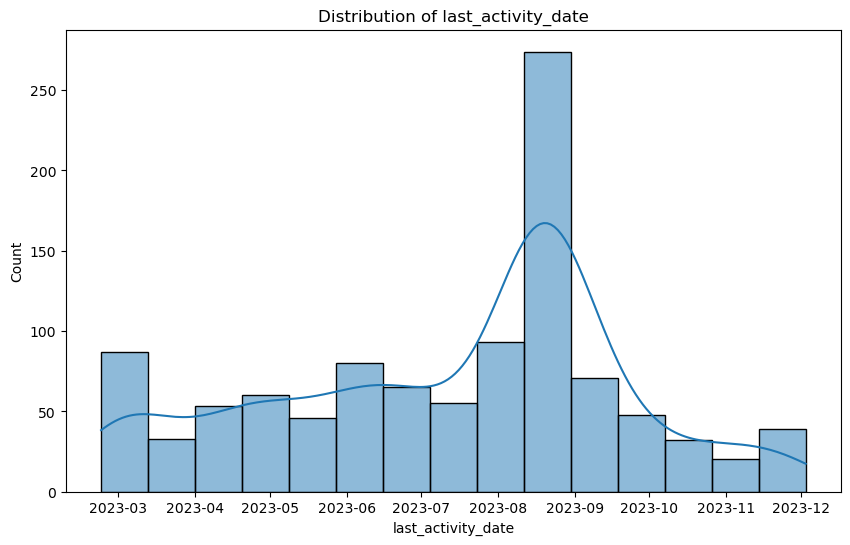

In [2]:
# plot df['last_activity_date']
plt.figure(figsize=(10, 6))
sns.histplot(df['last_activity_date'], kde=True)
plt.title('Distribution of last_activity_date')
plt.show()

In [3]:
# Load the data dictionary
data_dictionary_uni = pd.read_excel('data/Nearpeer Data Roux Analytics Class 040524.2 confidential.xlsx', sheet_name='Data dictionary - university', header=1).clean_names()

print('Data dictionary for the university data:\n')
for column in data_dictionary_uni.columns:
    print(f'{column}: {data_dictionary_uni[column].values[0]}')

data_dictionary_np = pd.read_excel('data/Nearpeer Data Roux Analytics Class 040524.2 confidential.xlsx', sheet_name='Data dictionary - Nearpeer', header=7).clean_names()

print('\n\nData dictionary for the Nearpeer data:\n')
for column in data_dictionary_np.columns:
    print(f'{column}: {data_dictionary_np[column].values[0]}')

data_dictionary_np

Data dictionary for the university data:

unnamed_0: nan
roux_class_record_id: Random ID to match back to student ID
admitted_y_n: Y = Student applied and was offered admission to this university
committed_y_n: Y = Admitted student accepted their offer of admission for Fall 2023
enrolled_at_census_y_n: Y = As of about 3 weeks into Fall 2023 term, student remained enrolled as an active student
most_recent_status: Matriculation = student remains currently enrolled as of this data export
nearpeer_user_: Yes = student did create a Nearpeer profile
nearpeer_user_id: Unique Nearpeer ID associated with that student who created a Nearpeer profile. Use to look up that student's Nearpeer profile info on the Nearpeer User data tab.
application_student_type: Either Freshman or Transfer (from another college/university)
deposit_date: Date/time the university recorded that the student accepted their offer of admission
orientation_attendance_y_n: Y = student attended new student orientation
country: 

user_id  \
0  Unique Nearpeer ID associated with that studen...   

                                      nearpeer_user_ school_number  \
0  All in the list are Nearpeer users so Yes appl...        ignore   

                             badge  \
0  Represents the role of the user   

                                             enabled  \
0  Yes = user remains enabled. No = user account ...   

                                      verified_email  profile_created  \
0  In profile creation process, user verified the...              NaN   

                                        age  \
0  Self-reported approximate age by student   

                                         major  \
0  Self-reported by student from dropdown list   

                             career_aspiration  ...  \
0  Self-reported by student as open text field  ...   

           i_invited_but_they_have_not_responded_yet  \
0  User connection requests made by this user and...   

                 i_ignored_or_disconnected_from_them  \
0  Number of User connection requests made by OTH...   

                         they_invited_and_i_accepted  \
0  Connection requests received by this user that...   

           they_invited_but_i_have_not_responded_yet  \
0  Connection requests received by this user that...   

                           they_disconnected_from_me  \
0  Connections this user had where the other pers...   

                       chats_sent              chats_received  \
0  1:1 chat messages sent by user  1:1 chat messages received   

                 chats_total  \
0  Total chats sent/received   

                                    groups_posted_to  \
0  Number of group chats this user has made a pos...   

                              sessions  
0  Number of user session of this user  

[1 rows x 49 columns]

In [4]:
df.head()

roux_class_record_id admitted committed enrolled most_recent_status  \
0                    30        Y         Y        Y      Matriculation   
1                    39        Y         Y        Y      Matriculation   
2                    95        Y         Y        Y      Matriculation   
3                    99        Y         Y        Y      Matriculation   
4                   127        Y         Y        Y      Matriculation   

  nearpeer_user_x  user_id application_student_type deposit_date  \
0             Yes   208651                 Freshman        03-27   
1             Yes   208643                 Freshman        01-22   
2             Yes   208584                 Freshman        01-19   
3             Yes   208578                 Freshman        04-02   
4             Yes   208554                 Freshman        01-28   

  orientation_attendance  ... they_invited_and_i_accepted  \
0                      Y  ...                           4   
1                      Y  ...                          19   
2                      Y  ...                           0   
3                      Y  ...                           0   
4                      Y  ...                           5   

  they_invited_but_i_have_not_responded_yet they_disconnected_from_me  \
0                                         1                         0   
1                                         2                         0   
2                                         3                         0   
3                                         1                         0   
4                                         1                         0   

  chats_sent chats_received chats_total groups_posted_to sessions  \
0         37             29          66             <NA>       37   
1         10             21          31             <NA>       43   
2       <NA>           <NA>        <NA>             <NA>        1   
3       <NA>           <NA>        <NA>             <NA>        1   
4         11             14          25             <NA>       41   

  days_from_deposit_to_sep_1 days_from_last_activity_to_sep_1  
0                     -208.0                              -86  
1                     -143.0                              -32  
2                     -140.0                              176  
3                     -214.0                              176  
4                     -149.0                               10  

[5 rows x 65 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype              
---  ------                                     --------------  -----              
 0   roux_class_record_id                       1056 non-null   Int64              
 1   admitted                                   1056 non-null   object             
 2   committed                                  1056 non-null   object             
 3   enrolled                                   1056 non-null   object             
 4   most_recent_status                         1056 non-null   object             
 5   nearpeer_user_x                            1056 non-null   object             
 6   user_id                                    1056 non-null   Int64              
 7   application_student_type                   1056 non-null   object             
 8   deposit_date                               1000 

In [6]:
print(f'University data shape: {uni_data.shape}')
print(f'Nearpeer data shape: {np_data.shape}')
print(f'Merged data shape: {df.shape}')

University data shape: (21687, 16)
Nearpeer data shape: (1727, 49)
Merged data shape: (1056, 65)


In [7]:
# Write the cleaned data to a csv
df.to_csv('data/aly_6080_nearpeer_cleaned_data.csv', index=False)

### Notes

In [8]:
###################################################################################

# 4/22/2024 notes
# GROUP PROJECT: teams will actually solve the problem together

# Preprocess the data
# Check for missing values

# Each group should look into the three problems from Slide 11 of the presentation
# Based on what we find, individual team members can create different models 
# Each group has a leader who's taken ALY 6020/6040 who can help guide the predictive modeling process
# Other team members can focus on the EDA, statistical analysis, and data visualization, etc.

# Create null hypothesis and alternative hypothesis for this week's discussion

# Example hypthothesis: 95% of students who use Nearpeer will enroll...

# In-class work with team:
# 1. H1: There is a difference in matriculation rates across majors. H0: There is no difference in matriculation rates across majors.
# 2. H1: Matriculation rate is higher for Nearpeer users than non-users. H0: Matriculation rate is the same for Nearpeer users and non-users.
# 3. H1: Nearpeer users who are open to social connections are more likely to matriculate. H0: Nearpeer users who are open to social connections are not more likely to matriculate.
# 4. TBD

# INDIVIDUAL PROJECT: I won't actually solve the problem, but I will propose one and walk through the process of solving it.
# Pick a separate problem you might have data for or not (hypothetical data),

#################################################################################

# 4/29/2024
# Group presentations on initial hypotheses

# For next week, have one slide about the challenges and questions about the data.

#################################################################################

# 5/13/2024
# Individual project: Write a report on the hypthetical data needed for a hypothetical additional problem, the methodology, and what the results might look like.

# 1. Plan
# 2. Presentation
# 3. Who is presenting?

#################################################################################

# 5/25/2024
# Thoughts about our group assignment due tomorrow

# Tables
# 1. Missingness
# 2. Summary statistics
# 3. Correlation matrix
# 4. Correlations (strong and moderate)
# 5. t-statistics
# 6. Model results
# 7. Model comparison

#################################################################################

# 6/3/2024
# Data governance
# Umesh expects us to publish to GitHub/Discovery?






In [9]:
# Classify majors into more general categories
major_categories = {
    'Biology': 'Life Sciences',
    'Film & Media Arts': 'Arts & Humanities',
    'Biochemistry': 'Life Sciences',
    'Theatre BFA': 'Arts & Humanities',
    'Business Administration': 'Business & Management',
    'Mechanical Engineering': 'Engineering',
    'Information Systems': 'Computer Science & IT',
    'Design': 'Arts & Humanities',
    'Health and Kinesiology': 'Health & Medicine',
    'Art BFA': 'Arts & Humanities',
    'Nursing': 'Health & Medicine',
    'Undecided': 'Other',
    'Computer Science': 'Computer Science & IT',
    'English': 'Arts & Humanities',
    'Psychology': 'Social Sciences',
    'Ballet BFA': 'Arts & Humanities',
    'Medical Laboratory Science': 'Health & Medicine',
    'Chemistry': 'Physical Sciences',
    'Civil & Environmental Engineering': 'Engineering',
    'Economics': 'Social Sciences',
    'Biomedical Engineering': 'Engineering',
    'Data Science': 'Computer Science & IT',
    'Graphic Design': 'Arts & Humanities',
    'International Studies': 'Social Sciences',
    'Chemical Engineering': 'Engineering',
    'Finance': 'Business & Management',
    'Architectural Studies': 'Arts & Humanities',
    'Political Science': 'Social Sciences',
    'Modern Dance BFA': 'Arts & Humanities',
    'Linguistics': 'Arts & Humanities',
    'Writing and Rhetoric Studies': 'Arts & Humanities',
    'History': 'Social Sciences',
    'Environmental & Sustainability Studies': 'Social Sciences',
    'Criminology': 'Social Sciences',
    'Entrepreneurship': 'Business & Management',
    'Management': 'Business & Management',
    'Social Work BSW': 'Social Sciences',
    'Games': 'Computer Science & IT',
    'Elementary Education': 'Education',
    'Music': 'Arts & Humanities',
    'Computer Engineering': 'Engineering',
    'Electrical Engineering': 'Engineering',
    'Sociology': 'Social Sciences',
    'Accounting': 'Business & Management',
    'Speech & Hearing Science': 'Health & Medicine',
    'Physics': 'Physical Sciences',
    'Marketing': 'Business & Management',
    'Quantitative Analysis of Markets & Organizations': 'Business & Management',
    'Secondary Education': 'Education',
    'Anthropology': 'Social Sciences',
    'Music BMus': 'Arts & Humanities',
    'Special Education': 'Education',
    'Theatre': 'Arts & Humanities',
    'Mathematics': 'Mathematics & Statistics',
    'Communication': 'Social Sciences',
    'Art History': 'Arts & Humanities',
    'Parks, Recreation & Tourism': 'Social Sciences',
    'Operations and Supply Chain': 'Business & Management',
    'Family, Community & Human Development': 'Social Sciences',
    'Chinese': 'Language & Linguistics',
    'Atmospheric Sciences': 'Physical Sciences',
    'English Teaching': 'Education',
    'Applied Mathematics': 'Mathematics & Statistics',
    'Spanish': 'Language & Linguistics',
    'Classics': 'Arts & Humanities',
    'Materials Science & Engineering': 'Engineering',
    'Health Society & Policy': 'Health & Medicine',
    'Urban Ecology': 'Environmental Sciences',
    'Theatre Teaching': 'Education',
    'Religious Studies': 'Arts & Humanities',
    'Educational Psychology': 'Education',
    'Geoscience': 'Physical Sciences',
    'Undeclared': 'Other',
    'Pre Film and Media Arts BA': 'Arts & Humanities',
    'Undeclared Pre Dentistry BS': 'Health & Medicine',
    'Pre Theatre BFA': 'Arts & Humanities',
    'Pre Business BA': 'Business & Management',
    'Pre Mechanical Engeering BS': 'Engineering',
    'Pre Business BS': 'Business & Management',
    'Pre Design BS': 'Arts & Humanities',
    'Pre Health and Kinesiology BS': 'Health & Medicine',
    'Pre Art BFA': 'Arts & Humanities',
    'Pre Family Community & Human Development BS': 'Social Sciences',
    'Undeclared Pre Medicine BS': 'Health & Medicine',
    'Pre Construction Engineering BS': 'Engineering',
    'Pre Psychology BS': 'Social Sciences',
    'Pre Medical Lab Science BS': 'Health & Medicine',
    'Pre Computer Science BS': 'Computer Science & IT',
    'Pre Nursing BS': 'Health & Medicine',
    'Pre Ballet BFA': 'Arts & Humanities',
    'Pre Biology BS': 'Life Sciences',
    'Pre Chemistry BA': 'Physical Sciences',
    'Pre Civil Engineering BS': 'Engineering',
    'Pre Economics BS': 'Social Sciences',
    'Pre Biomedical Engineering BS': 'Engineering',
    'Pre Psychology BA': 'Social Sciences',
    'Pre Games BS': 'Computer Science & IT',
    'Pre Communication BA': 'Social Sciences',
    'Pre International Studies BA': 'Social Sciences',
    'Pre Computer Engineering BS': 'Engineering',
    'Pre Chemical Engineering BS': 'Engineering',
    'Pre Mathematics BS': 'Mathematics & Statistics',
    'Pre Environmental & Sustainability Studies BS': 'Social Sciences',
    'Pre Sociology BA': 'Social Sciences',
    'Pre Economics BA': 'Social Sciences',
    'Pre Biochemistry BS': 'Life Sciences',
    'Pre Engineering BS': 'Engineering',
    'Pre Architectural Studies BS': 'Arts & Humanities',
    'Pre Modern Dance BFA': 'Arts & Humanities',
    'Pre Linguistics BA': 'Arts & Humanities',
    'Pre Writing & Rhetoric Studies BA': 'Arts & Humanities',
    'Pre Political Science BA': 'Social Sciences',
    'Pre Chemistry BS': 'Physical Sciences',
    'Undeclared Pre Pharmacy BS': 'Health & Medicine',
    'Pre History BA': 'Social Sciences',
    'Pre Criminology BA': 'Social Sciences',
    'Pre Criminology BS': 'Social Sciences',
    'Pre Political Science BS': 'Social Sciences',
    'Pre Social Work BSW': 'Social Sciences',
    'Undeclared Pre Medicine BA': 'Health & Medicine',
    'Undeclared Pre Law BS': 'Law & Legal Studies',
    'Pre Education BA': 'Education',
    'Pre Special Education BS': 'Education',
    'Pre Music BA': 'Arts & Humanities',
    'Undeclared Pre Law BA': 'Law & Legal Studies',
    'Pre Electrical Engineering BS': 'Engineering',
    'Pre German BA': 'Language & Linguistics',
    'Pre Art History BA': 'Arts & Humanities',
    'Pre Speech & Hearing Science BS': 'Health & Medicine',
    'Pre Physics BS': 'Physical Sciences',
    'Pre Environmental & Sustainability Studies BA': 'Social Sciences',
    'Pre International Studies BS': 'Social Sciences',
    'Pre Metallurgical Engeering BS': 'Engineering',
    'Undeclared Pre Dentistry BA': 'Health & Medicine',
    'Pre Anthropology BS': 'Social Sciences',
    'Pre Biology BA': 'Life Sciences',
    'Pre Music BMU': 'Arts & Humanities',
    'Pre Data Science BS': 'Computer Science & IT',
    'Pre Geoscience BSG': 'Physical Sciences',
    'Pre Education BS': 'Education',
    'Pre Biochemistry BA': 'Life Sciences',
    'Pre Parks Recreation & Tourism BA': 'Social Sciences',
    'Pre Communication BS': 'Social Sciences',
    'Pre Health, Society & Policy BS': 'Health & Medicine',
    'Pre Philosophy BA': 'Arts & Humanities',
    'Pre Speech & Hearing Science BA': 'Health & Medicine',
    'Pre English BA': 'Arts & Humanities',
    'Pre Chinese BA': 'Language & Linguistics',
    'Pre Atmospheric Sciences BS': 'Physical Sciences',
    'Pre Educational Psychology BA': 'Education',
    'Pre Graphic Design': 'Arts & Humanities',
    'Pre Spanish BA': 'Language & Linguistics',
    'Pre Classics BA': 'Arts & Humanities',
    'Pre Material Science & Engineering BS': 'Engineering',
    'Pre Parks Recreation & Tourism BS': 'Social Sciences',
    'Pre Applied Mathematics BS': 'Mathematics & Statistics',
    'Pre Anthropology BA': 'Social Sciences',
    'Pre Geography BS': 'Social Sciences',
    'Pre Family Community & Human Development BA': 'Social Sciences',
    'Pre Theatre BA': 'Arts & Humanities',
    'Pre Sociology BS': 'Social Sciences',
    'Pre Educational Psychology BS': 'Education'
}

# Function to categorize majors
def categorize_major(major):
    return major_categories.get(major, 'Other')

# Apply the function to create a new column with the major categories
df['major_category_x'] = df['major_x'].apply(categorize_major)
df['major_category_y'] = df['major_y'].apply(categorize_major)

# Add column for whether the major categories match
df['major_categories_match'] = df['major_category_x'] == df['major_category_y']

# Drop the 'major_x' and 'major_y' columns
df = df.drop(columns=['major_x', 'major_y'])

In [10]:
# Add a column for 'career_aspiration_character_count'
df['career_aspiration_character_count'] = df['career_aspiration'].str.len()

# Drop the 'career_aspiration' column
df = df.drop(columns='career_aspiration')

In [11]:
# Recategorize gender to fewer categories
df.gender.unique().tolist()

gender_categories = {
    'Female': ['Female', 'She/they', 'She/They', 'She/they/he', 'He/She'],
    'Male': ['Male', 'He/him/they/them', 'He/they', 'He/They'],
    'Decline': ['Decline', '?\\_(?)_/?'],
    'Other': ['Nonbinary', 'USA', 'He/him/They/them', 'Hamburger/Texan']
}

# Function to categorize gender
def categorize_gender(gender):
    for category, values in gender_categories.items():
        if gender in values:
            return category
    return 'Other'

# Iterate over the 'gender' column in df and apply the function
df['gender'] = df['gender'].apply(categorize_gender)


In [12]:
# Recategorize race to fewer categories
df.race.unique().tolist()

race_categories = {
    'White': ['White'],
    'Asian': ['Asian', 'Asian, White', 'Asian, Black or African American, Native Hawaiian or Other Pacific Islander', 
              'Asian, Native Hawaiian or Other Pacific Islander, White', 'American Indian or Alaska Native, Asian, Native Hawaiian or Other Pacific Islander'],
    'Black or African American': ['Black or African American', 'Black or African American, White',
                                  'American Indian or Alaska Native, Black or African American, White'],
    'Native Hawaiian or Other Pacific Islander': ['Native Hawaiian or Other Pacific Islander',
                                                  'Native Hawaiian or Other Pacific Islander, White'],
    'American Indian or Alaska Native': ['American Indian or Alaska Native',
                                         'American Indian or Alaska Native, White']
}

# Function to categorize race
def categorize_race(race):
    for category, values in race_categories.items():
        if race in values:
            return category
    return 'Other'

df['race'] = df['race'].apply(categorize_race)


## EDA



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 66 columns):
 #   Column                                     Non-Null Count  Dtype              
---  ------                                     --------------  -----              
 0   roux_class_record_id                       1056 non-null   Int64              
 1   admitted                                   1056 non-null   object             
 2   committed                                  1056 non-null   object             
 3   enrolled                                   1056 non-null   object             
 4   most_recent_status                         1056 non-null   object             
 5   nearpeer_user_x                            1056 non-null   object             
 6   user_id                                    1056 non-null   Int64              
 7   application_student_type                   1056 non-null   object             
 8   deposit_date                               1000 

In [14]:
# Set the style of the plots
sns.set_style('whitegrid')

# Set the palette for the plots
sns.set_palette('Set2')

# Set the default figure size globally
mpl.rcParams['figure.figsize'] = (10, 6)

# Set global plotting parameters
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.titlelocation'] = 'left'

### Assessing missingness

In [15]:
# Find the percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# Change pandas setting to display all rows
pd.set_option('display.max_rows', None)

# Show this in a dataframe
missing_df = pd.DataFrame(missing_values).reset_index()
missing_df.columns = ['column', 'missing_percentage']
missing_df.sort_values(by='missing_percentage', ascending=False, inplace=True)
missing_df.reset_index(drop=True, inplace=True)
missing_df.head(100)


column  missing_percentage
0                   bio_[deleted_for_privacy]          100.000000
1                       first_invitation_date           99.621212
2                                 invitations           99.621212
3                            groups_posted_to           85.416667
4                                    passions           72.821970
5                                  chats_sent           56.534091
6                              chats_received           56.534091
7                                 chats_total           56.534091
8                          last_group_message           49.621212
9                          hispanic_ethnicity           44.507576
10          career_aspiration_character_count           38.541667
11                                     groups           28.409091
12                     profile_completed_date           27.272727
13                       last_invitation_date           14.962121
14                           graduating_class           14.583333
15                            digest_interval            5.871212
16                                   sessions            5.681818
17                               deposit_date            5.303030
18                 days_from_deposit_to_sep_1            5.303030
19                         last_activity_date            0.000000
20               visibility_in_groups_classes            0.000000
21                         sms_alerts_enabled            0.000000
22        i_ignored_or_disconnected_from_them            0.000000
23                              total_friends            0.000000
24                i_invited_and_they_accepted            0.000000
25  i_invited_but_they_have_not_responded_yet            0.000000
26                        full_time_part_time            0.000000
27                they_invited_and_i_accepted            0.000000
28  they_invited_but_i_have_not_responded_yet            0.000000
29                  they_disconnected_from_me            0.000000
30           days_from_last_activity_to_sep_1            0.000000
31                           major_category_x            0.000000
32                           major_category_y            0.000000
33                     major_categories_match            0.000000
34                                     gender            0.000000
35                       roux_class_record_id            0.000000
36                 open_to_social_connections            0.000000
37                             online_student            0.000000
38                                  committed            0.000000
39                                   enrolled            0.000000
40                         most_recent_status            0.000000
41                            nearpeer_user_x            0.000000
42                                    user_id            0.000000
43                   application_student_type            0.000000
44                     orientation_attendance            0.000000
45                                    country            0.000000
46                                       race            0.000000
47                                  residency            0.000000
48                                    college            0.000000
49                            nearpeer_user_y            0.000000
50                                      badge            0.000000
51                                    enabled            0.000000
52                             verified_email            0.000000
53                            profile_created            0.000000
54                                        age            0.000000
55                        bio_character_count            0.000000
56                                  interests            0.000000
57                            interests_count            0.000000
58                               groups_count            0.000000
59                            number_of_peers            0.000000
60           

### Descriptive statistics

In [16]:
# Create descriptive statistics table
desc_stats = df.describe(include=[float, int]).T
desc_stats = desc_stats.reset_index()
desc_stats = desc_stats.rename(columns={'index': 'column'})
median_stats = df.select_dtypes(include=[float, int]).median().reset_index()
median_stats.columns = ['column', 'median']
desc_stats = pd.merge(desc_stats, median_stats, on='column', how='left')
desc_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']] = desc_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']].round(2)
desc_stats = desc_stats[['column', 'count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
desc_stats

column   count           mean  \
0                        roux_class_record_id  1056.0   11429.595644   
1                                     user_id  1056.0  221270.378788   
2                                         age  1056.0      18.028409   
3                   bio_[deleted_for_privacy]     0.0            NaN   
4                         bio_character_count  1056.0      55.091856   
5                             interests_count  1056.0       20.52178   
6                                groups_count  1056.0       1.136364   
7                             number_of_peers  1056.0       10.71875   
8                            graduating_class   902.0    2026.640798   
9                                 invitations     4.0           2.25   
10                              total_friends  1056.0       10.71875   
11                i_invited_and_they_accepted  1056.0       6.164773   
12  i_invited_but_they_have_not_responded_yet  1056.0       1.920455   
13        i_ignored_or_disconnected_from_them  1056.0       0.274621   
14                they_invited_and_i_accepted  1056.0       4.553977   
15  they_invited_but_i_have_not_responded_yet  1056.0       2.721591   
16                  they_disconnected_from_me  1056.0       0.225379   
17                                 chats_sent   459.0      36.228758   
18                             chats_received   459.0      36.786492   
19                                chats_total   459.0      73.015251   
20                           groups_posted_to   154.0       4.207792   
21                                   sessions   996.0          28.25   
22                 days_from_deposit_to_sep_1  1000.0       -186.671   
23           days_from_last_activity_to_sep_1  1056.0      50.206439   
24          career_aspiration_character_count   649.0      18.862866   

      median           std       min        25%       50%        75%       max  
0    11209.5   6919.922682      30.0    5359.25   11209.5   17282.25   24078.0  
1   217265.5  52057.527234  208310.0  212420.75  217265.5  222436.25  980841.0  
2       18.0      1.491571      15.0       17.0      18.0       18.0      42.0  
3       <NA>           NaN       NaN        NaN       NaN        NaN       NaN  
4       28.5     60.799913       0.0        0.0      28.5      115.0     165.0  
5       11.0     27.474892       1.0        5.0      11.0       24.0     200.0  
6        1.0      1.369389       0.0        0.0       1.0        2.0      32.0  
7        2.0     18.674043       0.0        0.0       2.0       13.0     149.0  
8     2027.0      1.029864    2023.0     2027.0    2027.0     2027.0    2029.0  
9        2.0      1.258306       1.0       1.75       2.0        2.5       4.0  
10       2.0     18.674043       0.0        0.0       2.0       13.0     149.0  
11       1.0     11.889911       0.0        0.0       1.0        7.0      94.0  
12       0.0      5.110469       0.0        0.0       0.0        2.0      79.0  
13       0.0      1.406943       0.0        0.0       0.0        0.0      29.0  
14       1.0      9.423723       0.0        0.0       1.0        5.0      84.0  
15       1.0      5.716539       0.0        0.0       1.0        3.0      93.0  
16       0.0      0.855625       0.0        0.0       0.0        0.0      18.0  
17      10.0     88.416948       0.0        2.0      10.0       33.0    1244.0  
18      11.0     83.729095       0.0        3.0      11.0       35.0    1087.0  
19      21.0    171.553936       1.0        5.5      21.0       67.5    2331.0  
20       2.0      8.838918       1.0        1.0       2.0        4.0      73.0  
21      10.0     56.154102       1.0        4.0      10.0       29.0    1056.0  
22    -187.0     44.509413    -487.0     -213.0    -187.0    -149.75    -123.0  
23      23.0     70.911085     -93.0        8.0      23.0     105.25     191.0  
24      16.0     14.056697       2.0       10.0      16.0       22.0     165.0

In [17]:
# Create two descriptive statistics tables for the two groups, enrolled and not enrolled using the same method as above
desc_stats_enrolled = df[df['enrolled'] == 'Y'].describe(include=[float, int]).T
desc_stats_enrolled = desc_stats_enrolled.reset_index()
desc_stats_enrolled = desc_stats_enrolled.rename(columns={'index': 'column'})
median_stats_enrolled = df[df['enrolled'] == 'Y'].select_dtypes(include=[float, int]).median().reset_index()
median_stats_enrolled.columns = ['column', 'median']
desc_stats_enrolled = pd.merge(desc_stats_enrolled, median_stats_enrolled, on='column', how='left')
desc_stats_enrolled[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']] = desc_stats_enrolled[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']].round(2)
desc_stats_enrolled = desc_stats_enrolled[['column', 'count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
desc_stats_enrolled


column  count           mean    median  \
0                        roux_class_record_id  925.0   11451.367568   11214.0   
1                                     user_id  925.0  221870.792432  217311.0   
2                                         age  925.0      18.036757      18.0   
3                   bio_[deleted_for_privacy]    0.0            NaN      <NA>   
4                         bio_character_count  925.0      57.607568      33.0   
5                             interests_count  925.0      21.298378      12.0   
6                                groups_count  925.0       1.151351       1.0   
7                             number_of_peers  925.0      11.154595       2.0   
8                            graduating_class  792.0    2026.661616    2027.0   
9                                 invitations    4.0           2.25       2.0   
10                              total_friends  925.0      11.154595       2.0   
11                i_invited_and_they_accepted  925.0       6.401081       1.0   
12  i_invited_but_they_have_not_responded_yet  925.0       1.989189       0.0   
13        i_ignored_or_disconnected_from_them  925.0       0.276757       0.0   
14                they_invited_and_i_accepted  925.0       4.753514       1.0   
15  they_invited_but_i_have_not_responded_yet  925.0        2.39027       1.0   
16                  they_disconnected_from_me  925.0            0.2       0.0   
17                                 chats_sent  414.0      37.913043      10.0   
18                             chats_received  414.0      38.487923      11.0   
19                                chats_total  414.0      76.400966      21.0   
20                           groups_posted_to  146.0        4.19863       2.0   
21                                   sessions  884.0      29.783937      11.0   
22                 days_from_deposit_to_sep_1  925.0    -186.418378    -187.0   
23           days_from_last_activity_to_sep_1  925.0      38.798919      20.0   
24          career_aspiration_character_count  561.0      19.208556      16.0   

             std       min       25%       50%       75%       max  
0    6958.381357      30.0    5312.0   11214.0   17374.0   24078.0  
1   55563.486307  208310.0  212473.0  217311.0  222449.0  980841.0  
2       1.534153      15.0      18.0      18.0      18.0      42.0  
3            NaN       NaN       NaN       NaN       NaN       NaN  
4      61.165365       0.0       0.0      33.0     118.0     164.0  
5      27.991063       1.0       5.0      12.0      25.0     200.0  
6       1.394489       0.0       0.0       1.0       2.0      32.0  
7      19.299219       0.0       0.0       2.0      14.0     149.0  
8       1.002723    2023.0    2027.0    2027.0    2027.0    2029.0  
9       1.258306       1.0      1.75       2.0       2.5       4.0  
10     19.299219       0.0       0.0       2.0      14.0     149.0  
11     12.173804       0.0       0.0       1.0       7.0      94.0  
12      5.083916       0.0       0.0       0.0       2.0      79.0  
13      1.434406       0.0       0.0       0.0       0.0      29.0  
14      9.756771       0.0       0.0       1.0       5.0      84.0  
15      5.285989       0.0       0.0       1.0       2.0      93.0  
16      0.632798       0.0       0.0       0.0       0.0       7.0  
17     92.400524       0.0       2.0      10.0      33.0    1244.0  
18     87.576621       0.0       3.0      11.0      37.0    1087.0  
19     179.37278       1.0       6.0      21.0     68.75    2331.0  
20      8.993193       1.0       1.0       2.0       4.0      73.0  
21      58.93392       1.0       4.0      11.0      30.0    1056.0  
22     44.795677    -487.0    -213.0    -187.0    -149.0    -123.0  
23     64.150312     -93.0       5.0      20.0      84.0     191.0  
24     14.501515       2.0      10.0      16.0      22.0     165.0

In [18]:
# Create descriptive statistics table for the group of students who did not enroll
desc_stats_not_enrolled = df[df['enrolled'] == 'N'].describe(include=[float, int]).T
desc_stats_not_enrolled = desc_stats_not_enrolled.reset_index()
desc_stats_not_enrolled = desc_stats_not_enrolled.rename(columns={'index': 'column'})
median_stats_not_enrolled = df[df['enrolled'] == 'N'].select_dtypes(include=[float, int]).median().reset_index()
median_stats_not_enrolled.columns = ['column', 'median']
desc_stats_not_enrolled = pd.merge(desc_stats_not_enrolled, median_stats_not_enrolled, on='column', how='left')
desc_stats_not_enrolled[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']] = desc_stats_not_enrolled[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']].round(2)
desc_stats_not_enrolled = desc_stats_not_enrolled[['column', 'count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
desc_stats_not_enrolled

column  count           mean    median  \
0                        roux_class_record_id  131.0   11275.862595   11093.0   
1                                     user_id  131.0  217030.816794  217016.0   
2                                         age  131.0      17.969466      18.0   
3                   bio_[deleted_for_privacy]    0.0            NaN      <NA>   
4                         bio_character_count  131.0      37.328244       0.0   
5                             interests_count  131.0      15.038168       7.0   
6                                groups_count  131.0       1.030534       1.0   
7                             number_of_peers  131.0       7.641221       1.0   
8                            graduating_class  110.0    2026.490909    2027.0   
9                                 invitations    0.0            NaN      <NA>   
10                              total_friends  131.0       7.641221       1.0   
11                i_invited_and_they_accepted  131.0       4.496183       0.0   
12  i_invited_but_they_have_not_responded_yet  131.0       1.435115       0.0   
13        i_ignored_or_disconnected_from_them  131.0       0.259542       0.0   
14                they_invited_and_i_accepted  131.0       3.145038       0.0   
15  they_invited_but_i_have_not_responded_yet  131.0       5.061069       2.0   
16                  they_disconnected_from_me  131.0        0.40458       0.0   
17                                 chats_sent   45.0      20.733333       7.0   
18                             chats_received   45.0      21.133333      10.0   
19                                chats_total   45.0      41.866667      15.0   
20                           groups_posted_to    8.0          4.375       3.0   
21                                   sessions  112.0      16.142857       6.5   
22                 days_from_deposit_to_sep_1   75.0    -189.786667    -182.0   
23           days_from_last_activity_to_sep_1  131.0     130.755725     146.0   
24          career_aspiration_character_count   88.0      16.659091      15.0   

            std       min       25%       50%       75%       max  
0   6665.794934     254.0    6035.0   11093.0   16873.0   23327.0  
1   5321.370111  208363.0  212060.5  217016.0  221474.0  226632.0  
2      1.149842      17.0      17.0      18.0      18.0      24.0  
3           NaN       NaN       NaN       NaN       NaN       NaN  
4     55.183811       0.0       0.0       0.0      70.0     165.0  
5     22.860246       1.0       4.0       7.0      17.0     199.0  
6      1.176298       0.0       0.0       1.0       2.0       6.0  
7     13.106116       0.0       0.0       1.0       8.5      69.0  
8      1.202028    2023.0    2027.0    2027.0    2027.0    2028.0  
9           NaN       NaN       NaN       NaN       NaN       NaN  
10    13.106116       0.0       0.0       1.0       8.5      69.0  
11     9.523553       0.0       0.0       0.0       4.5      62.0  
12     5.288739       0.0       0.0       0.0       0.5      45.0  
13     1.199922       0.0       0.0       0.0       0.0      12.0  
14     6.465437       0.0       0.0       0.0       3.0      36.0  
15     7.765561       0.0       1.0       2.0       6.0      58.0  
16     1.748752       0.0       0.0       0.0       0.0      18.0  
17    31.015685       0.0       1.0       7.0      26.0     130.0  
18    26.560908       0.0       2.0      10.0      28.0     102.0  
19    56.963146       1.0       2.0      15.0      50.0     229.0  
20      5.68048       1.0       1.0       3.0       4.0      18.0  
21    21.681086       1.0       2.0       6.5     21.25      95.0  
22    40.963495    -307.0    -217.0    -182.0    -160.0    -127.0  
23    63.978132     -86.0     100.5     146.0     183.0     191.0  
24    10.602414       3.0       9.0      15.0     20.25      80.0

### Frequency tables/plots

In [19]:
# Loop through all categorical columns and create frequency tables
categorical_cols = df.select_dtypes(include='object').columns

# Remove 'interests' 'passions' 'groups' from the list of categorical columns
categorical_cols = [col for col in categorical_cols if col not in ['interests', 'passions', 'groups']]

for col in categorical_cols:
    freq_table = df[col].value_counts(normalize=True) * 100
    freq_table = freq_table.reset_index()
    freq_table.columns = [col, 'percentage']
    print(f'Frequency table for {col}')
    print(freq_table)
    print('\n')

Frequency table for admitted
  admitted  percentage
0        Y       100.0


Frequency table for committed
  committed  percentage
0         Y    91.57197
1         N     8.42803


Frequency table for enrolled
  enrolled  percentage
0        Y   87.594697
1        N   12.405303


Frequency table for most_recent_status
  most_recent_status  percentage
0      Matriculation   92.613636
1              Admit    7.386364


Frequency table for nearpeer_user_x
  nearpeer_user_x  percentage
0             Yes       100.0


Frequency table for application_student_type
  application_student_type  percentage
0                 Freshman   90.530303
1                 Transfer    7.575758
2   Freshman International    1.609848
3   Transfer International    0.189394
4              Early Admit    0.094697


Frequency table for deposit_date
    deposit_date  percentage
0          01-12         4.5
1          01-15         3.2
2          01-17         2.5
3          04-02         2.5
4          01-16      

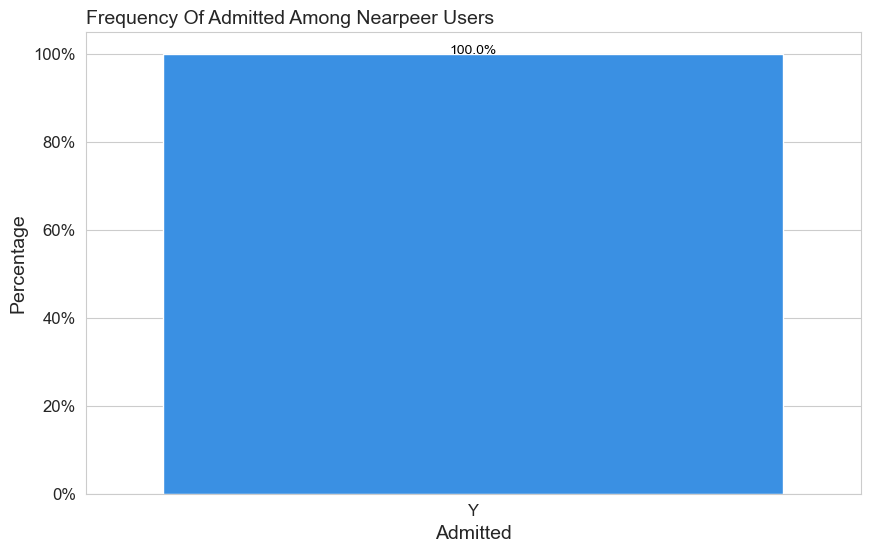

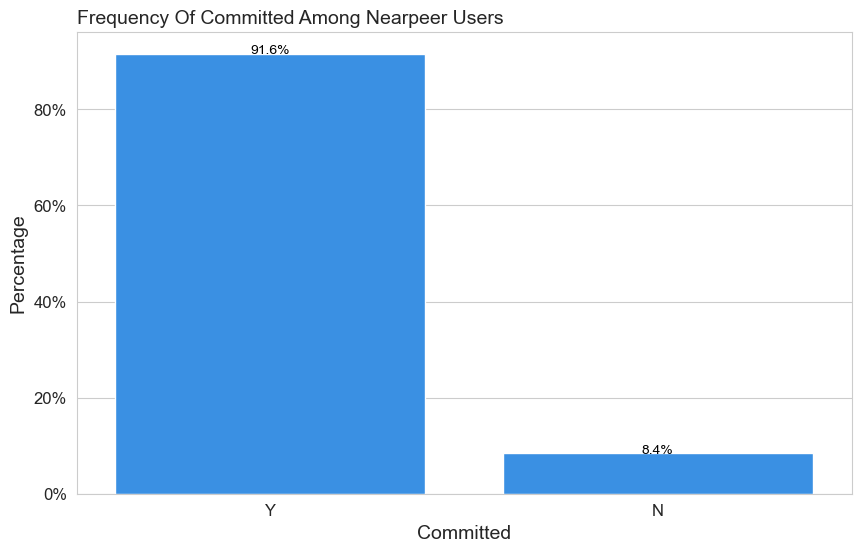

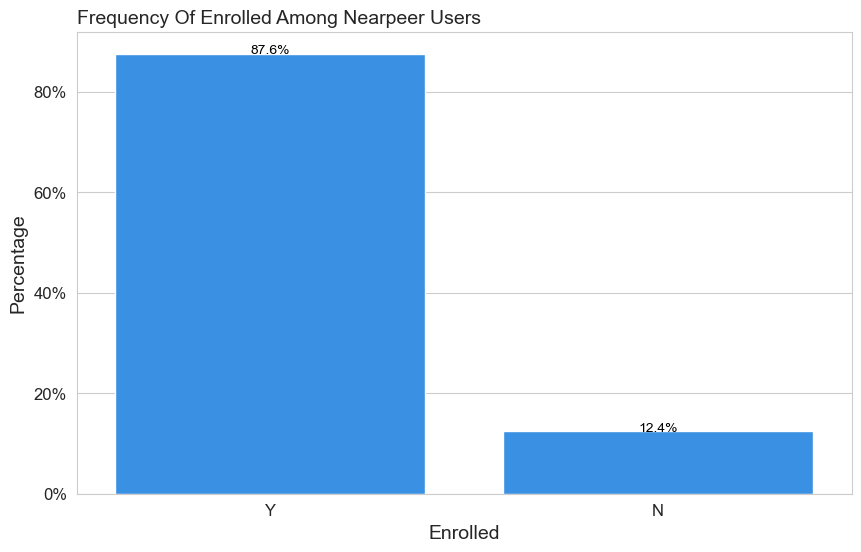

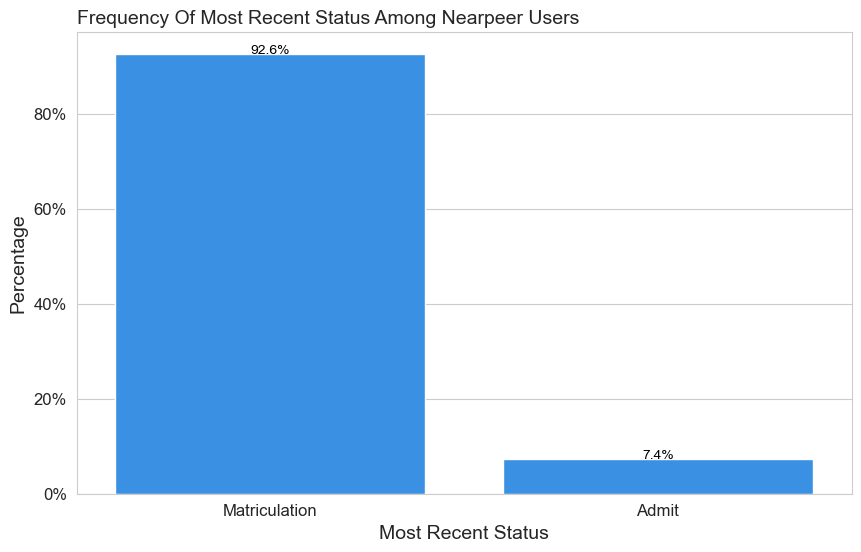

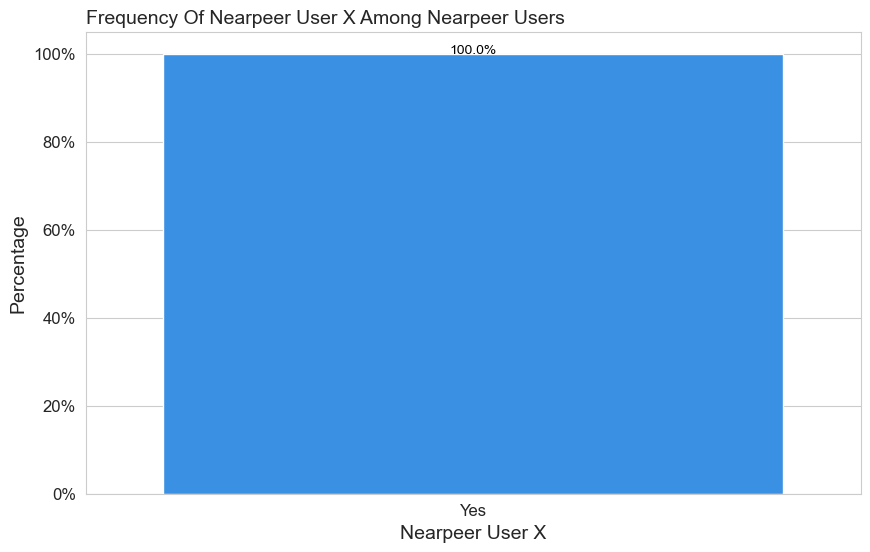

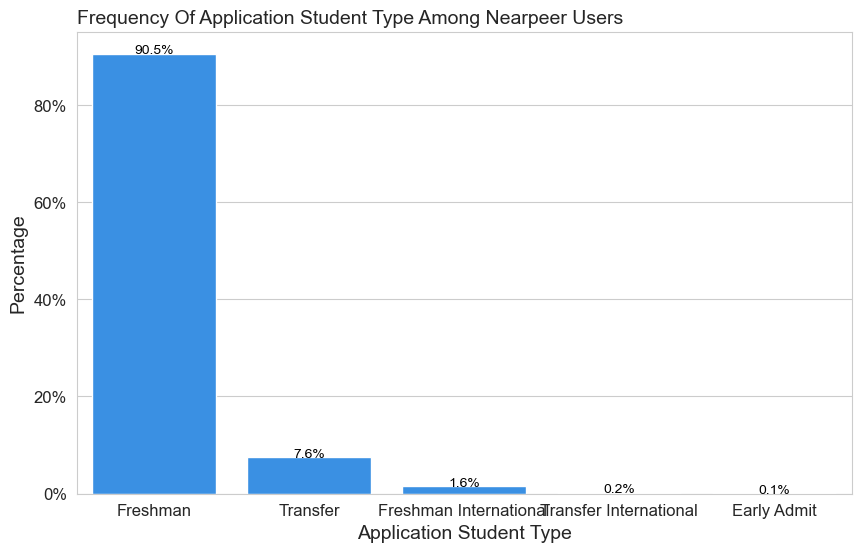

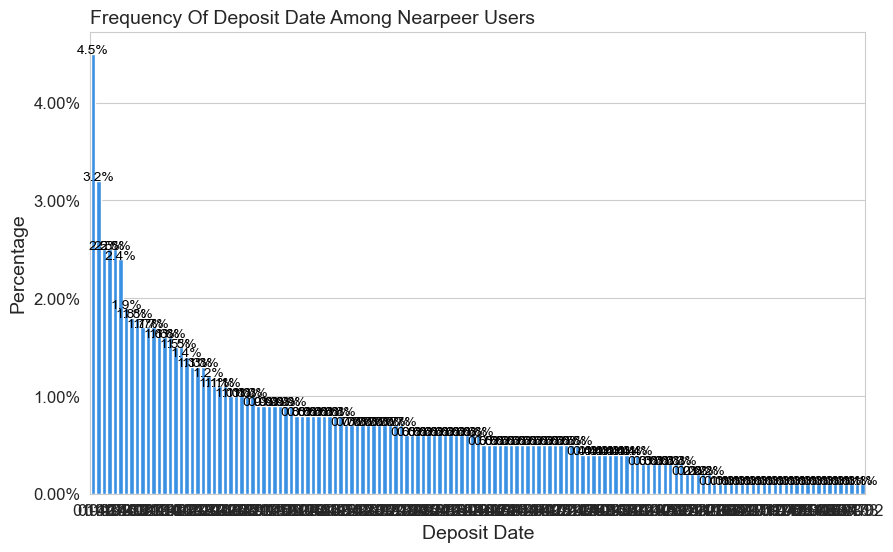

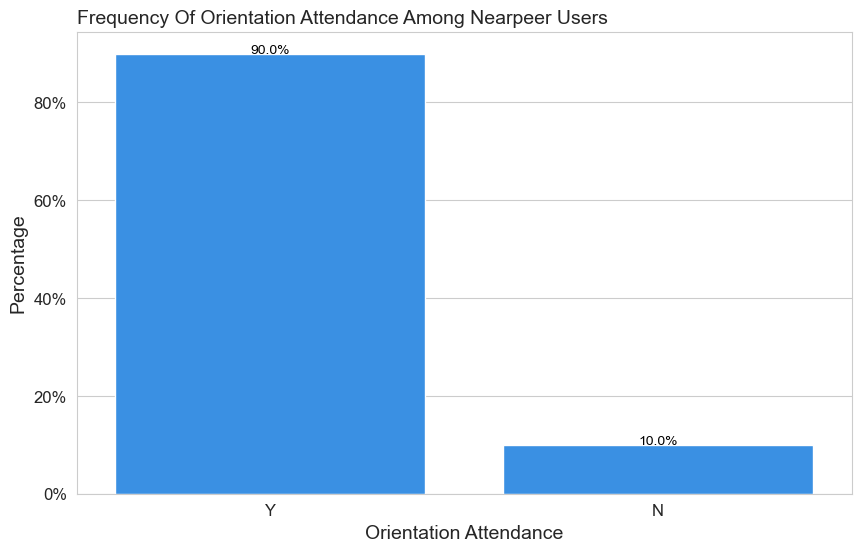

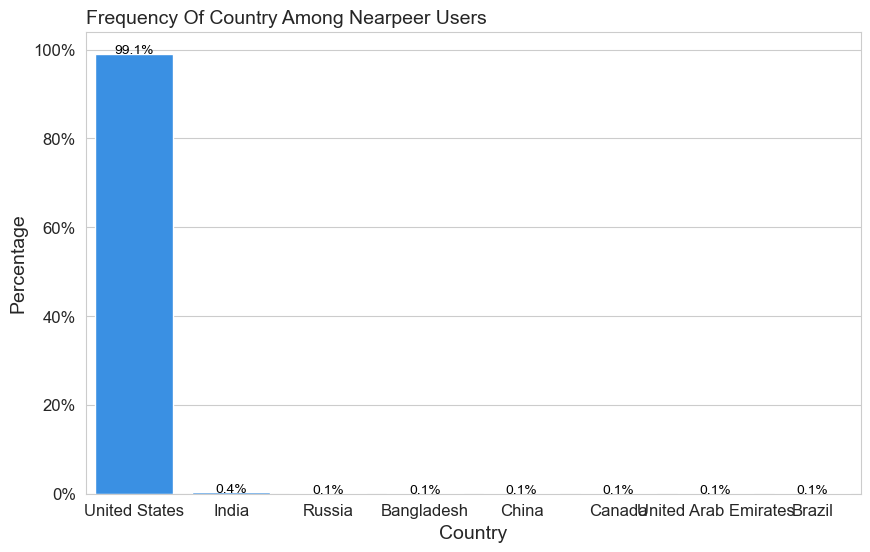

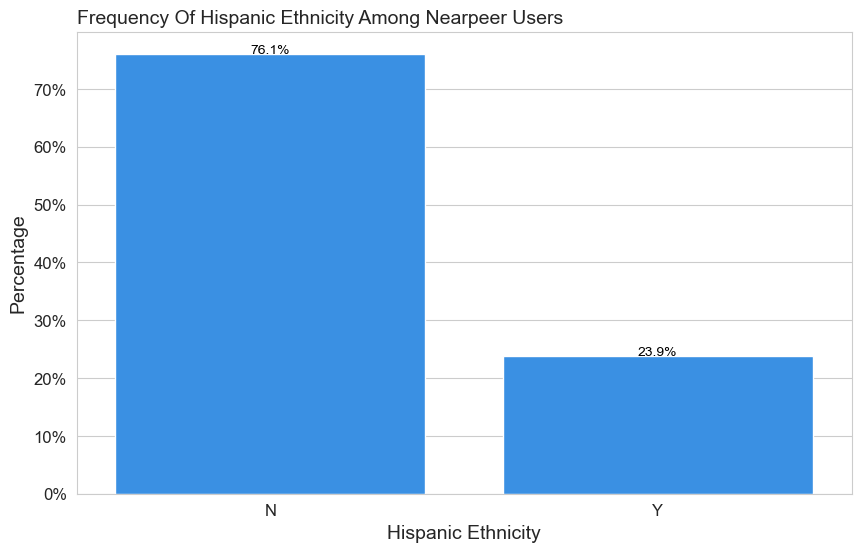

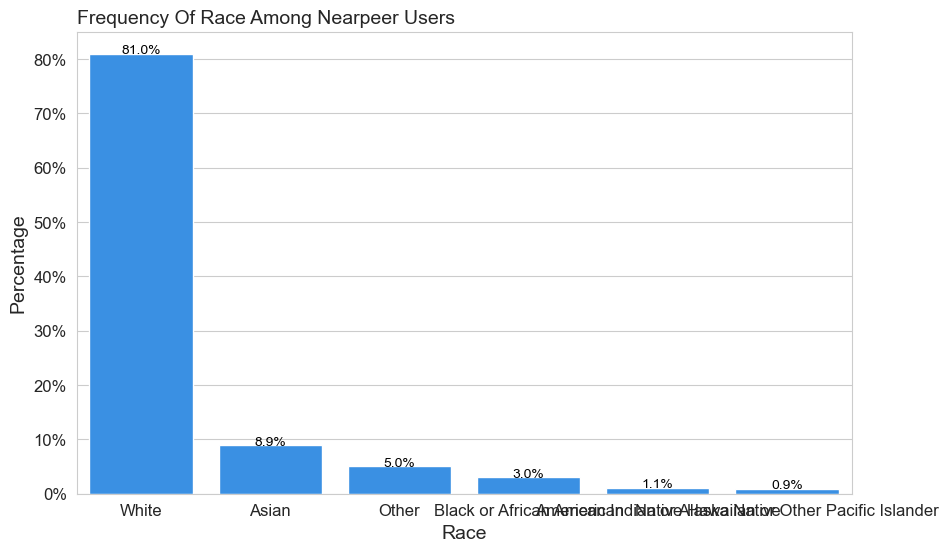

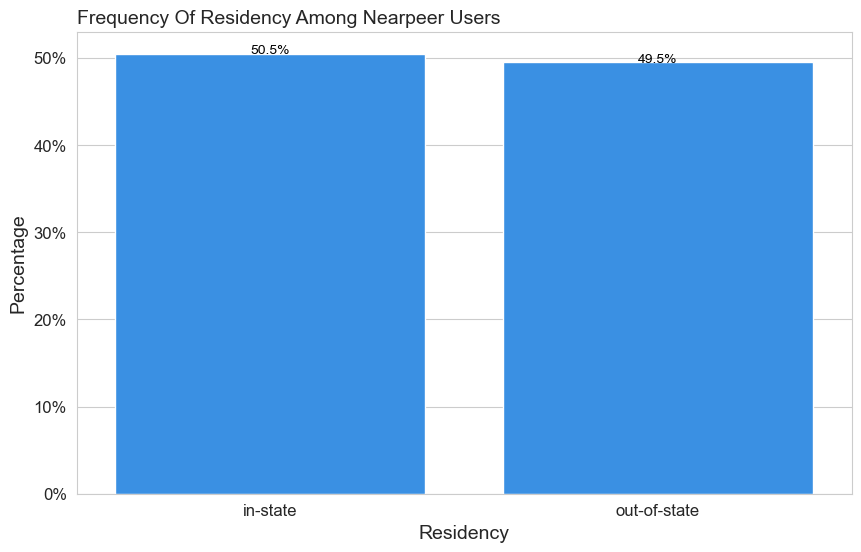

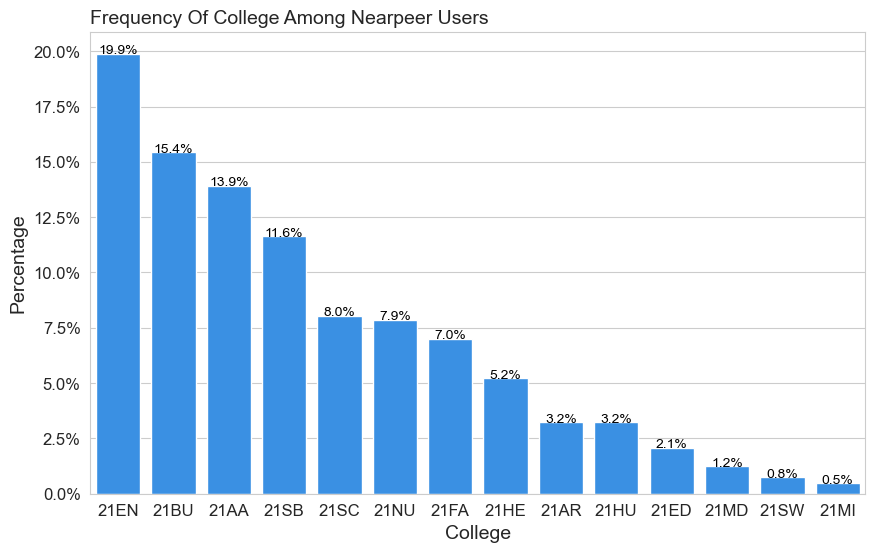

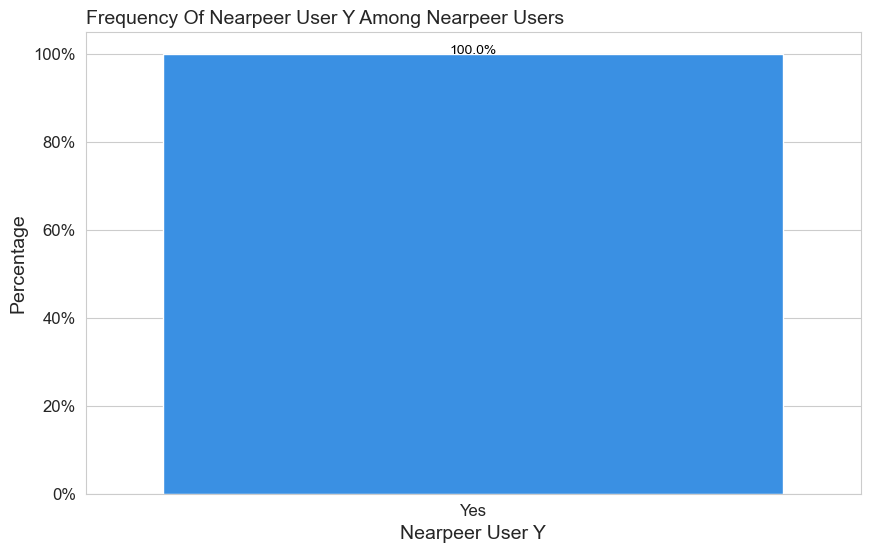

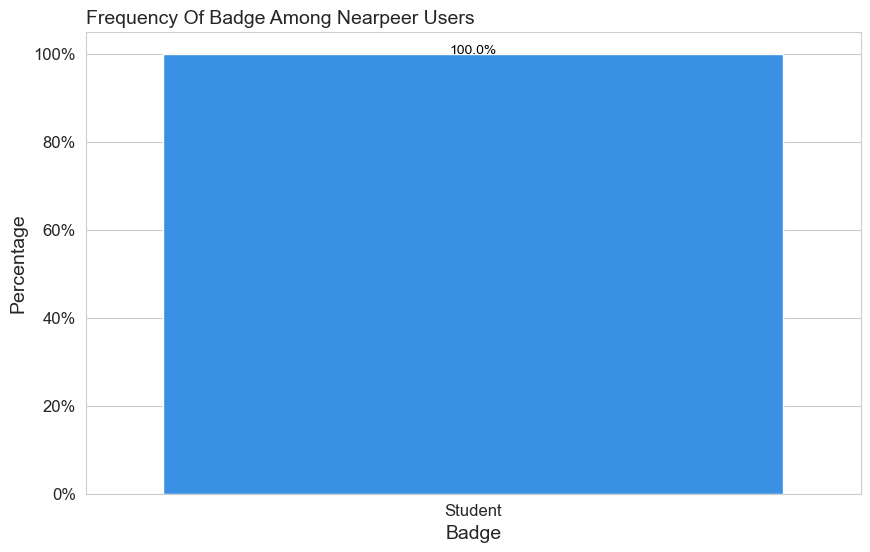

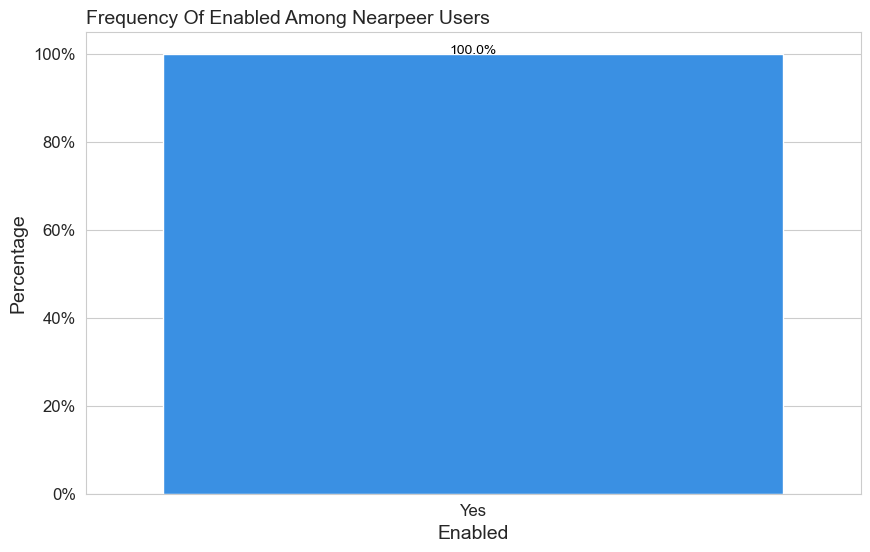

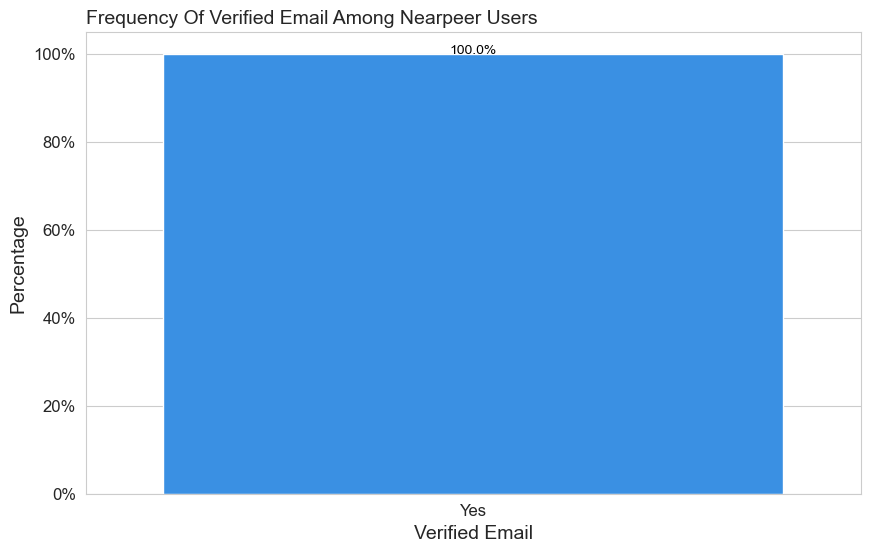

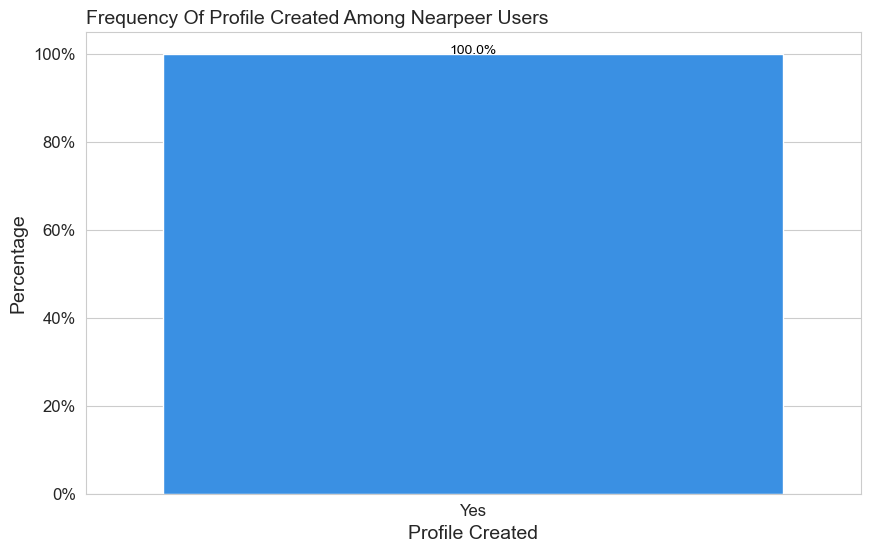

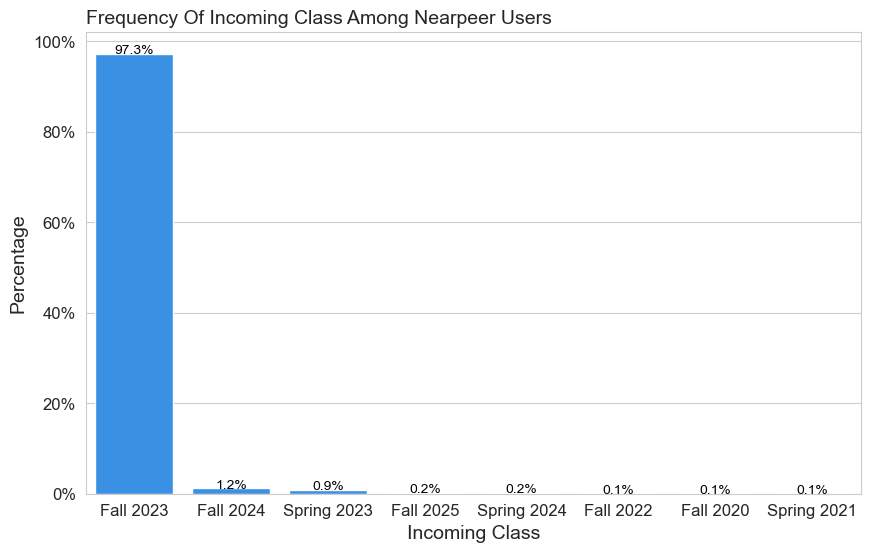

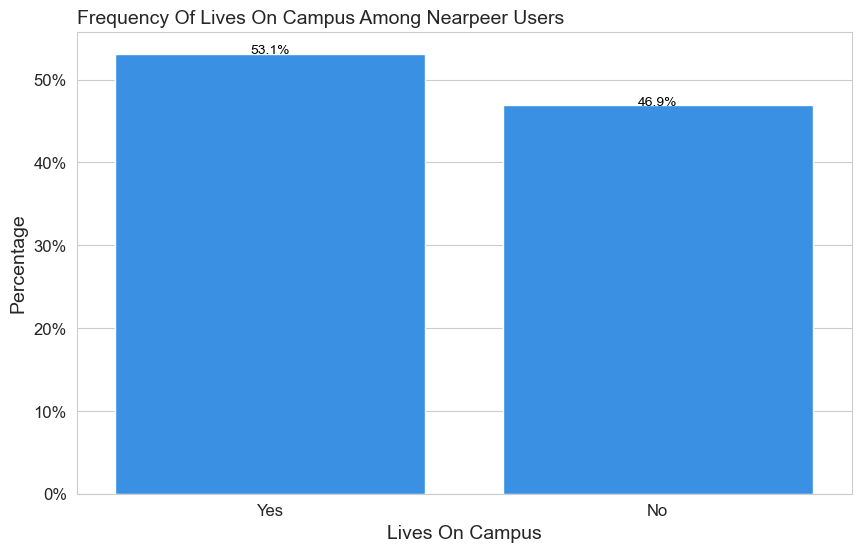

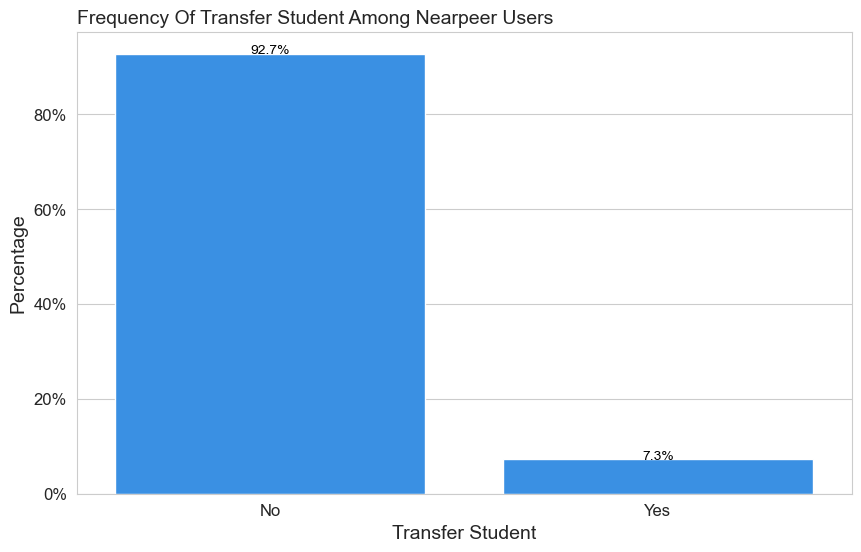

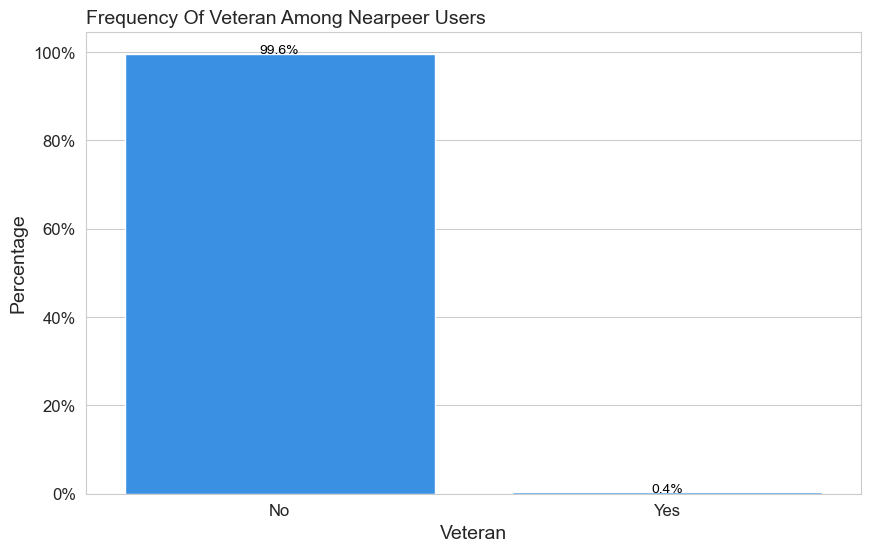

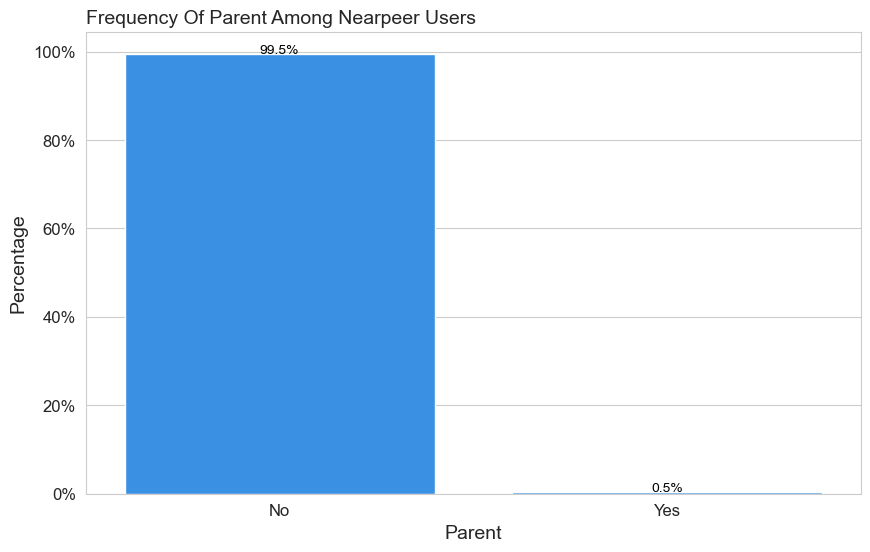

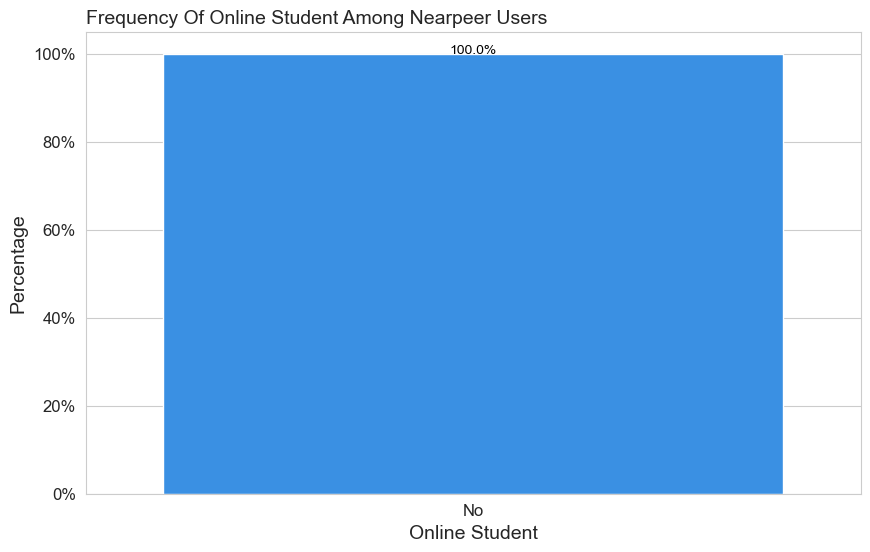

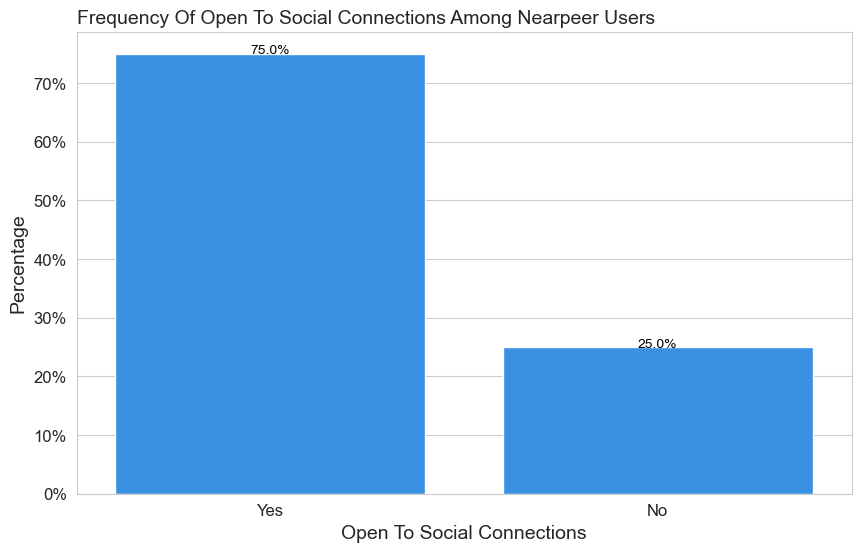

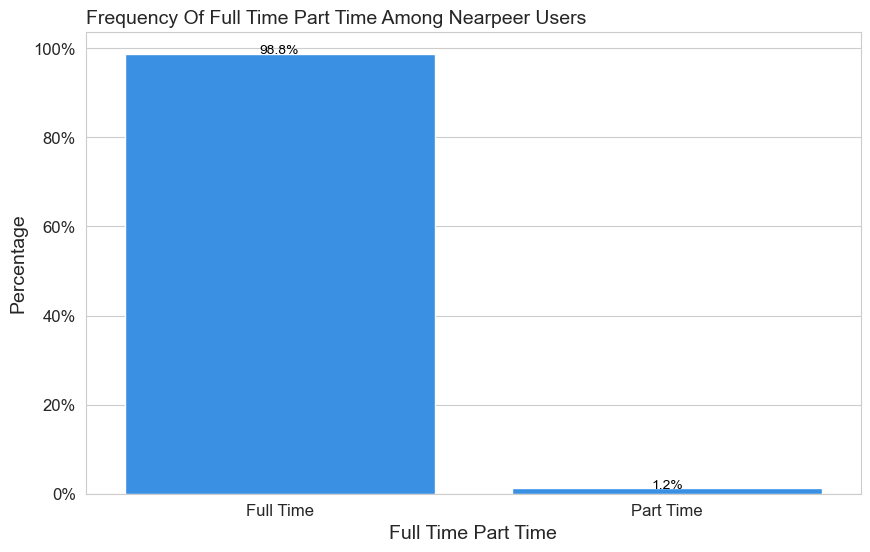

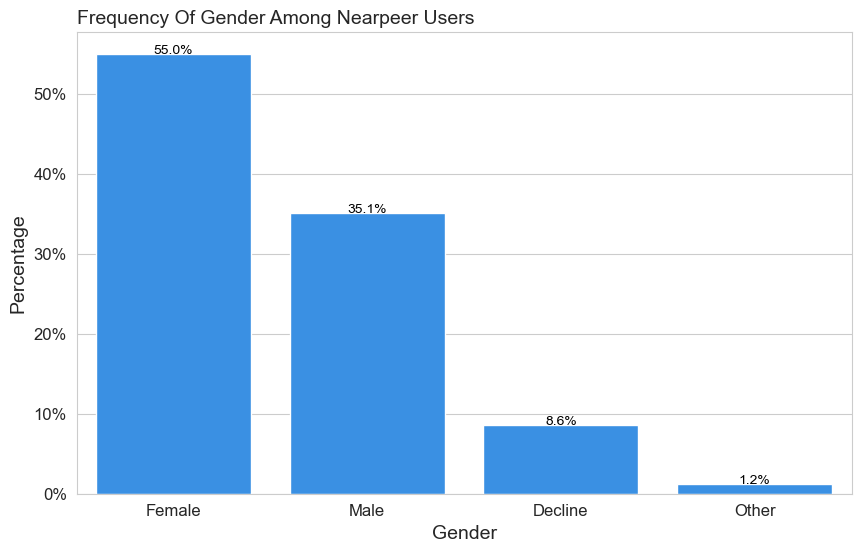

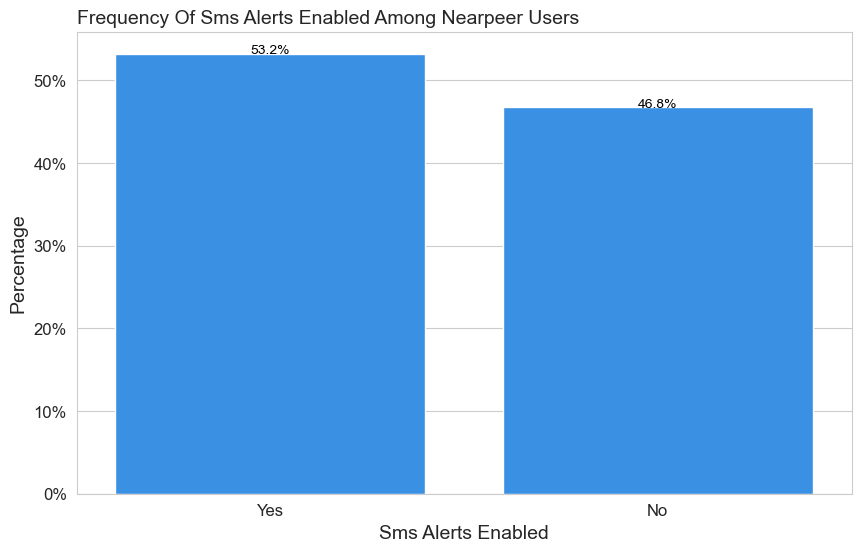

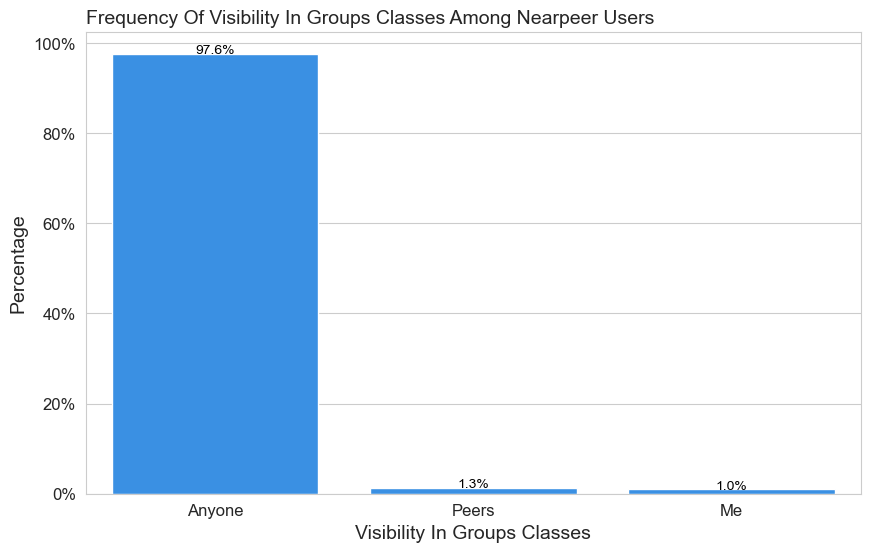

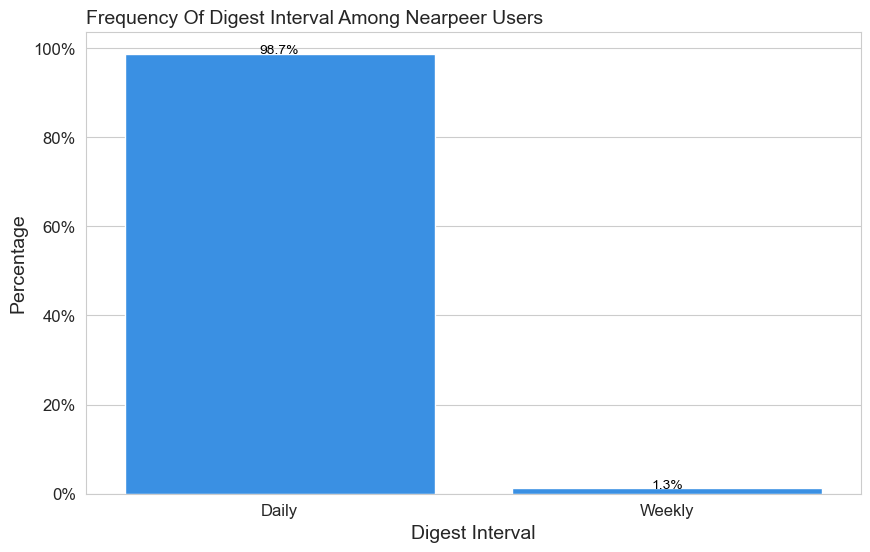

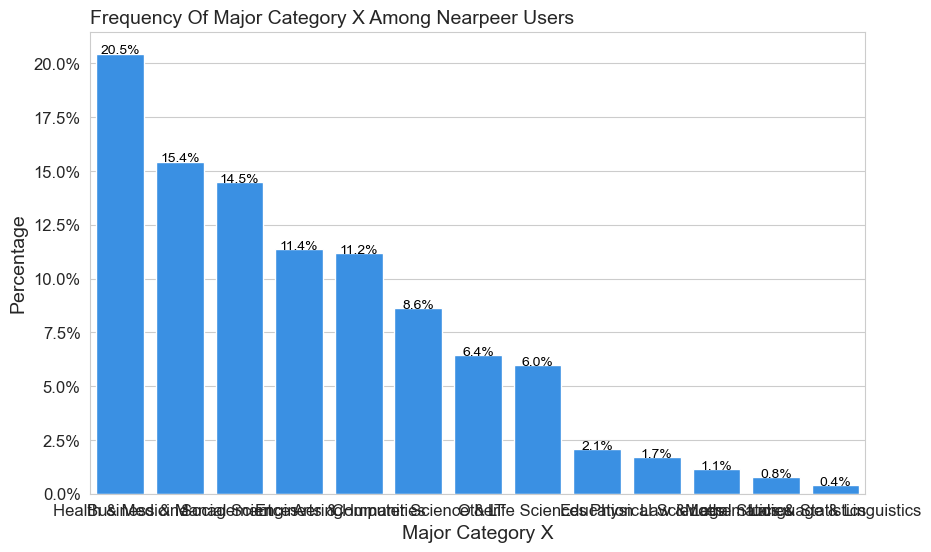

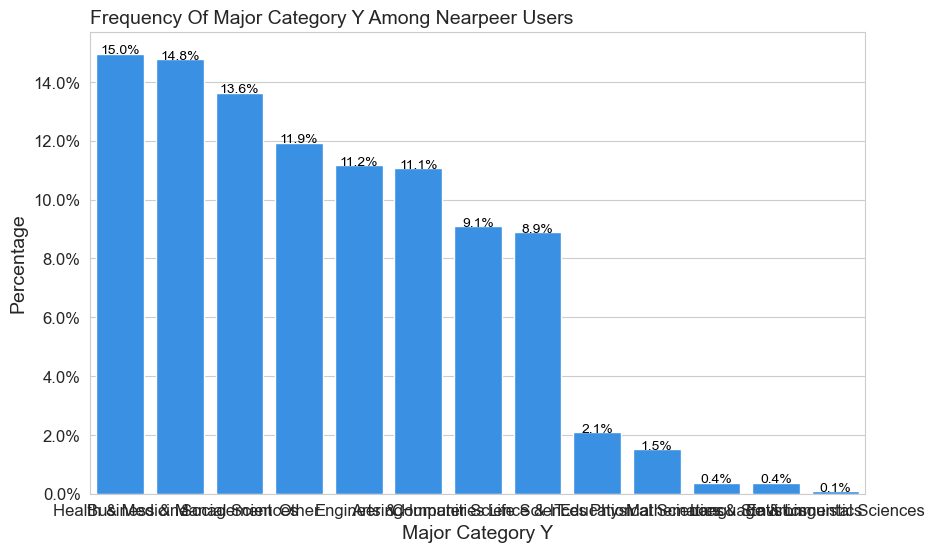

In [73]:
# Plot the frequency of categorical variables as percentages
for col in categorical_cols:
    freq_table = df[col].value_counts(normalize=True) * 100
    freq_table = freq_table.reset_index()
    freq_table.columns = [col, 'percentage']
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='percentage', data=freq_table, color='dodgerblue')
    for index, row in freq_table.iterrows():
        plt.text(row.name, row.percentage, f'{row.percentage:.1f}%', color='black', ha='center')
    plt.title(f'Frequency of {col}')
    plt.ylabel('Percentage')
    plt.gca().yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
    # Replace underscores with spaces in the title and set the title to title case
    plt.title(f'Frequency of {col} Among Nearpeer Users'.replace('_', ' ').title())
    plt.xticks(rotation=0)
    # Replace underscores with spaces in the x-axis label and set the label to title case
    plt.xlabel(col.replace('_', ' ').title())
    plt.show()

### Contingency tables

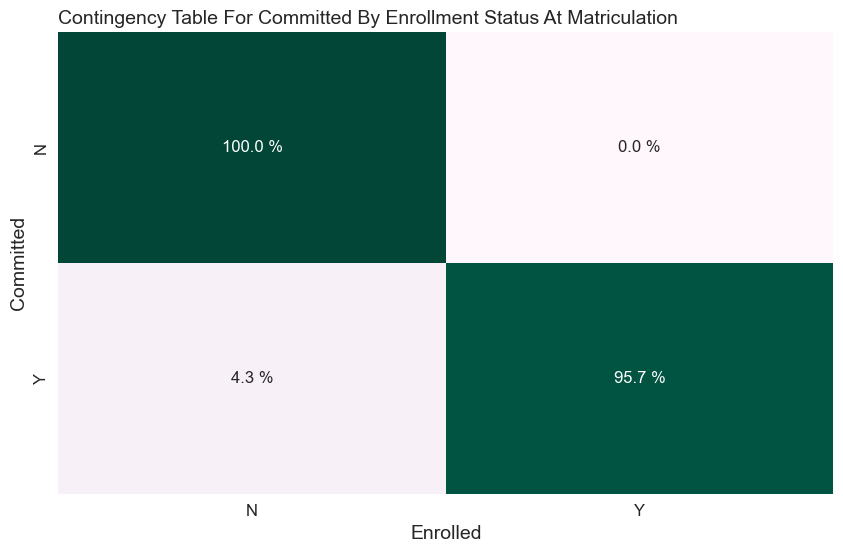

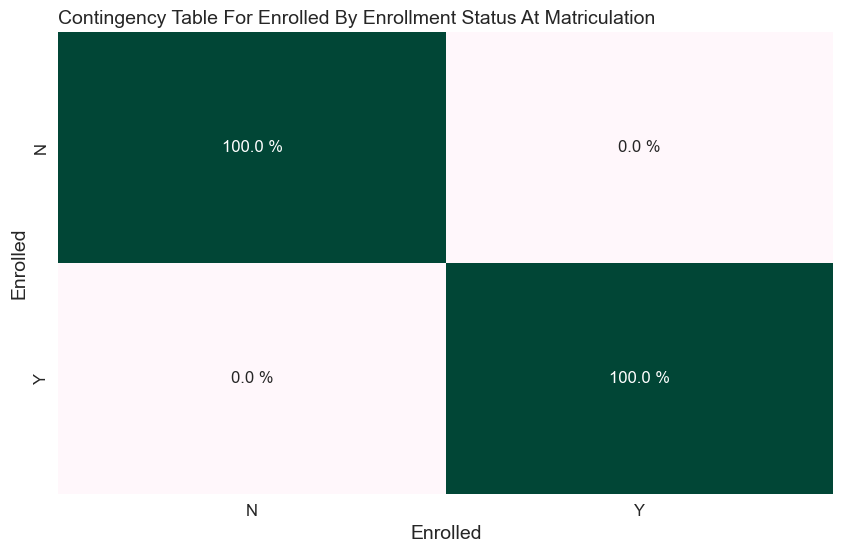

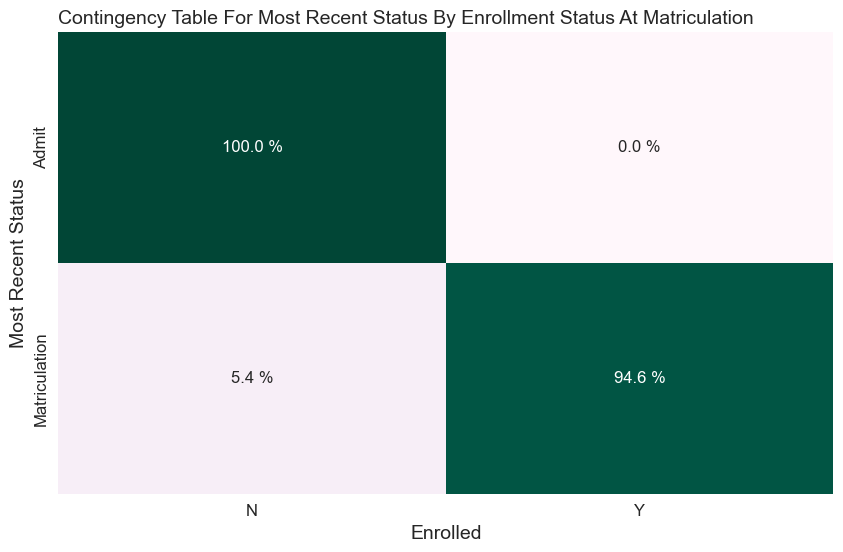

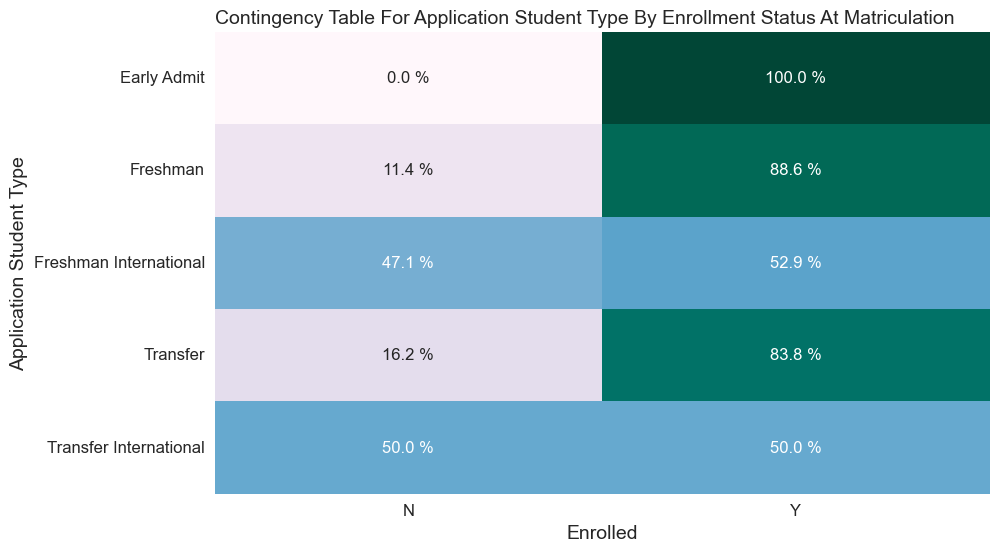

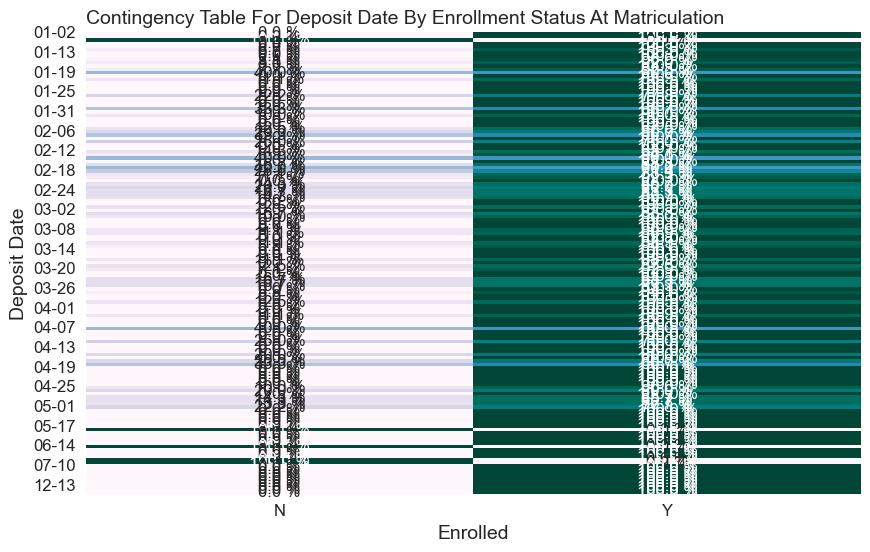

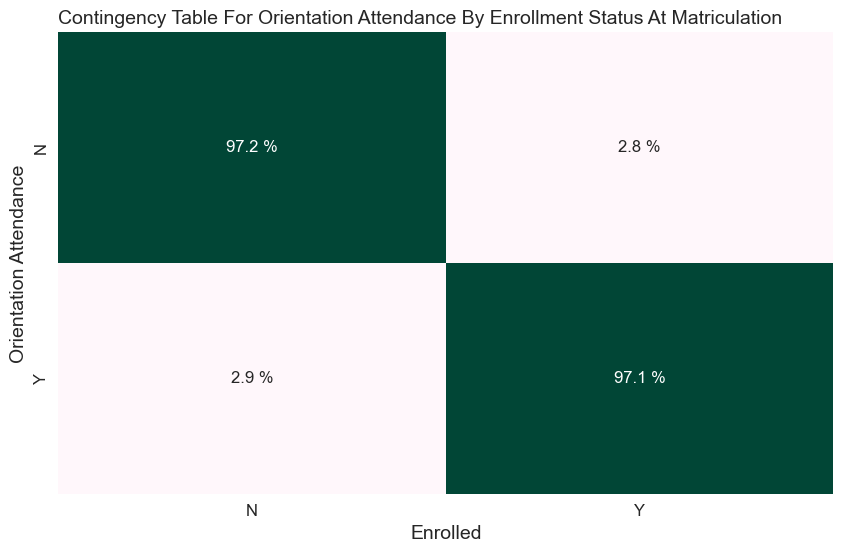

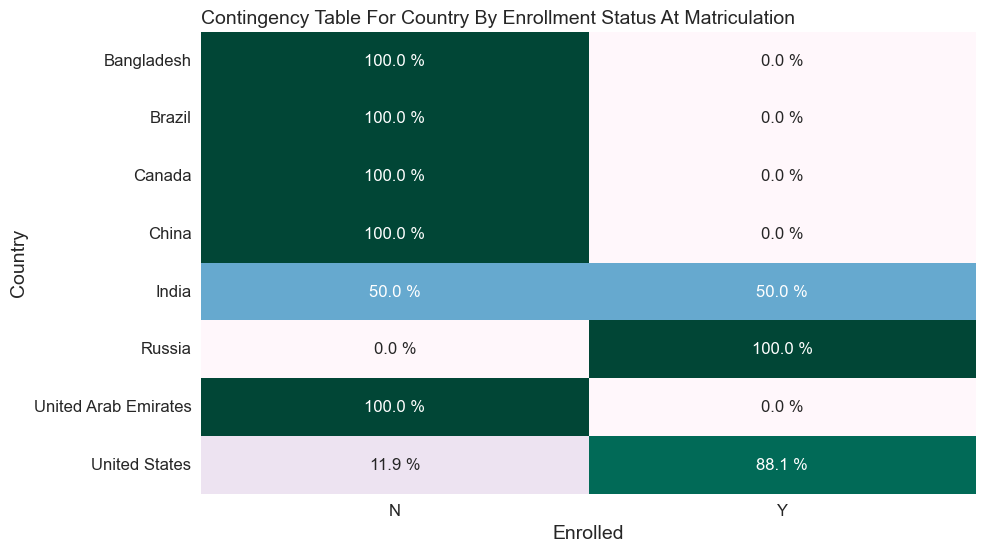

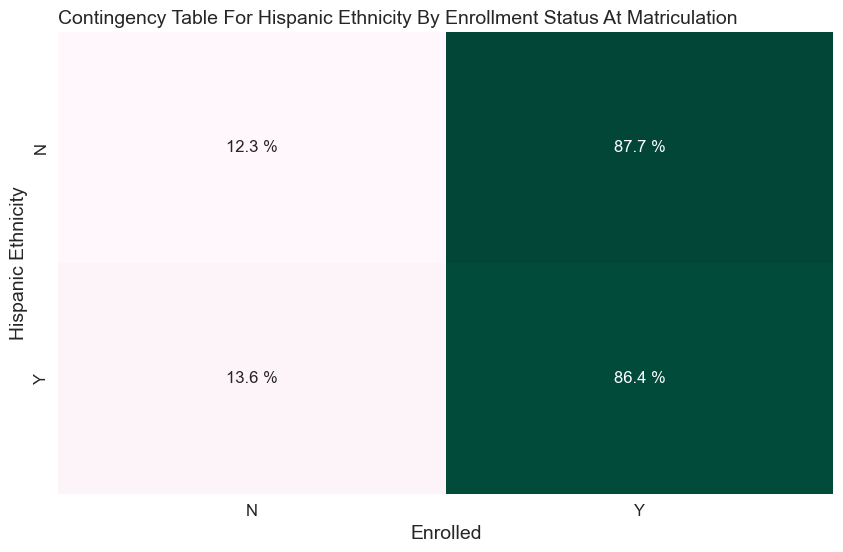

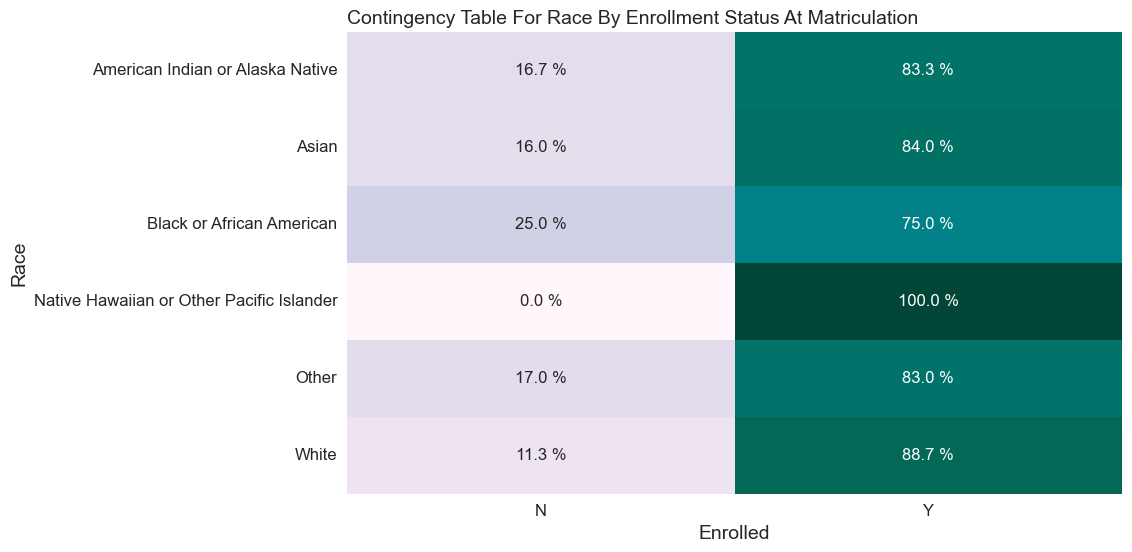

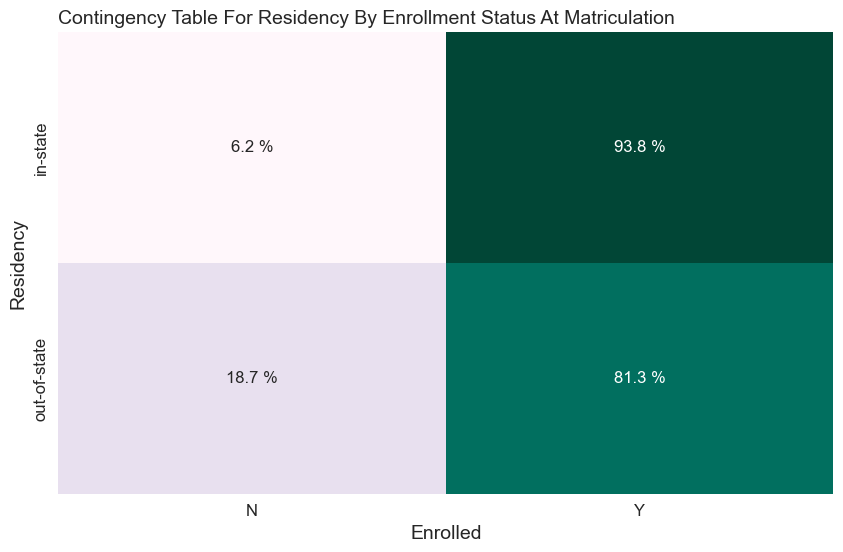

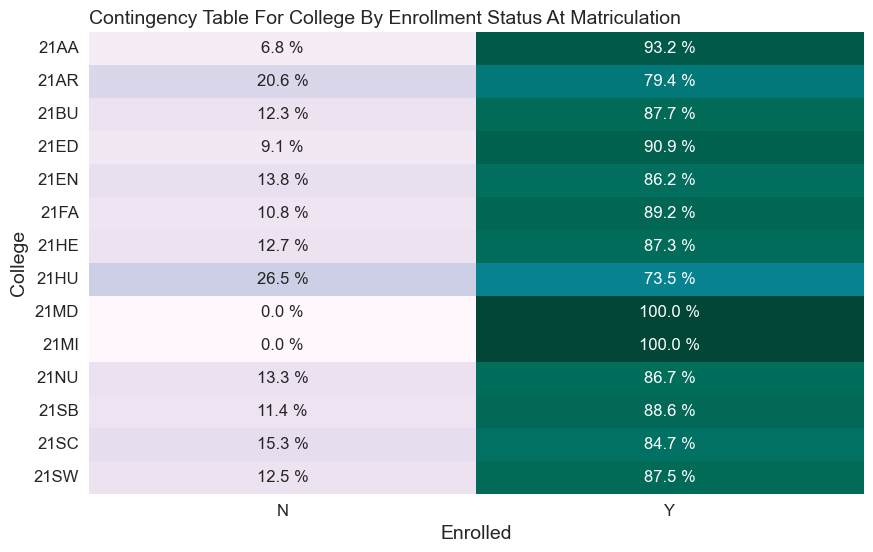

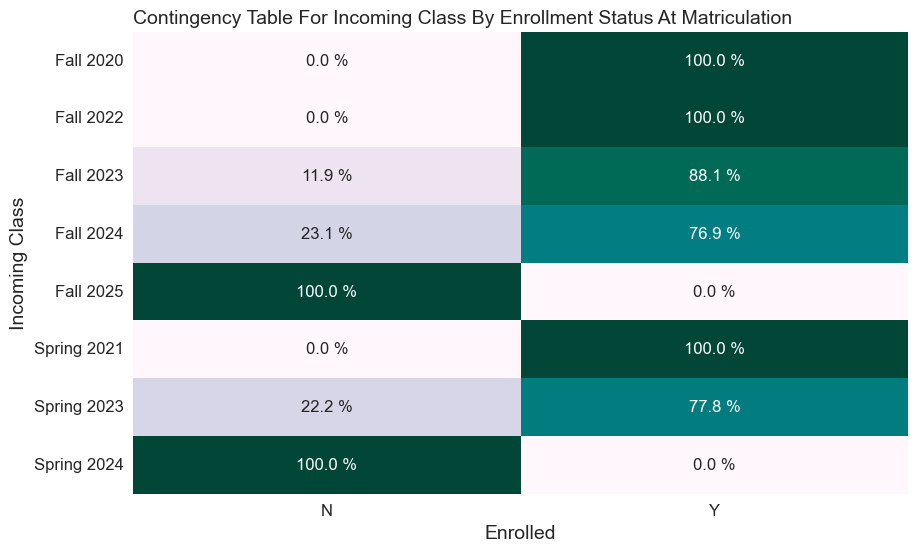

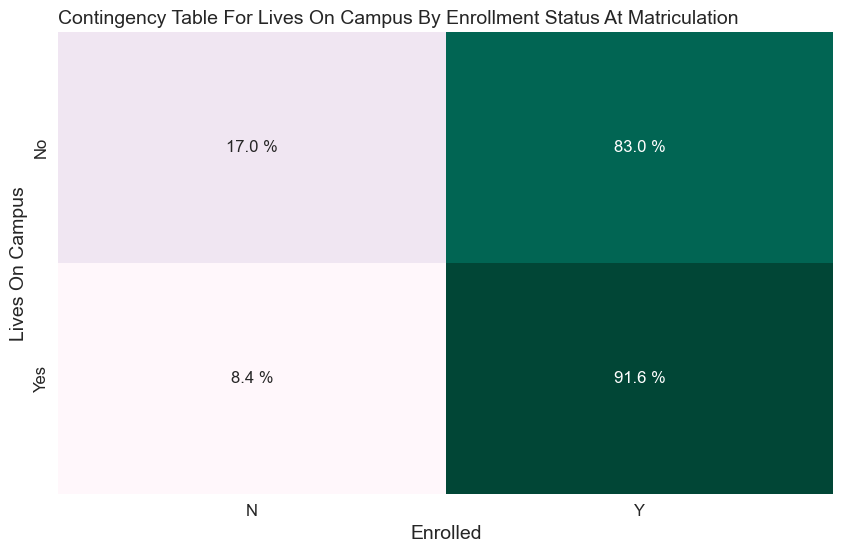

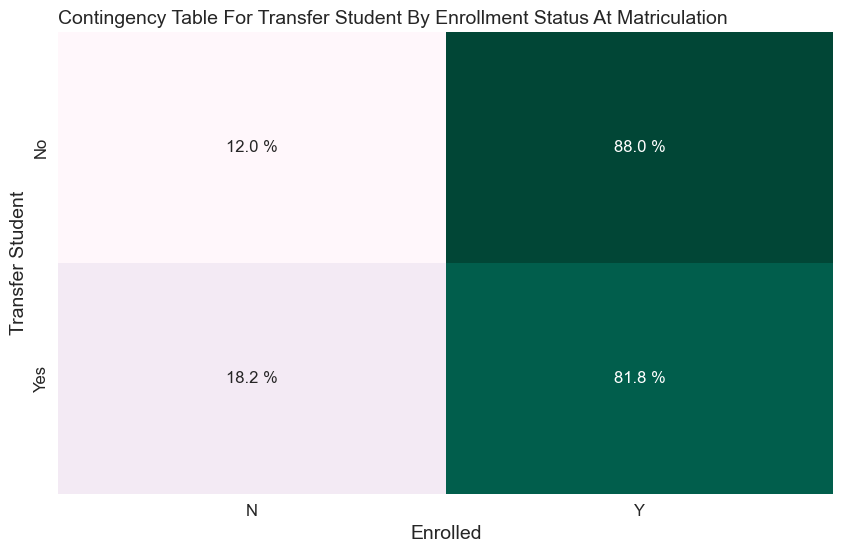

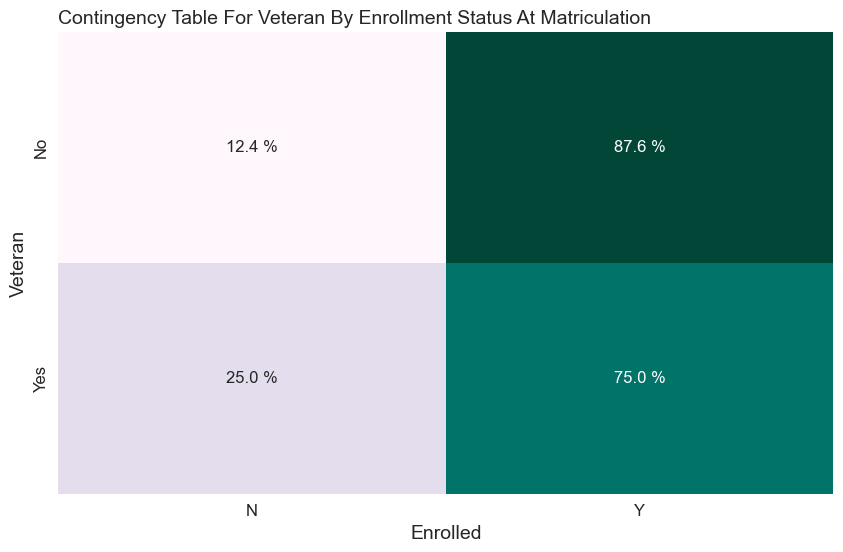

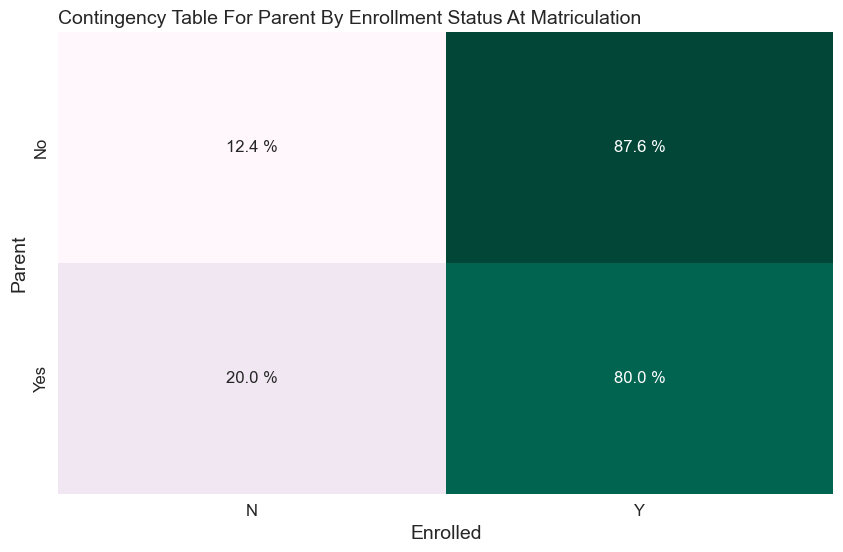

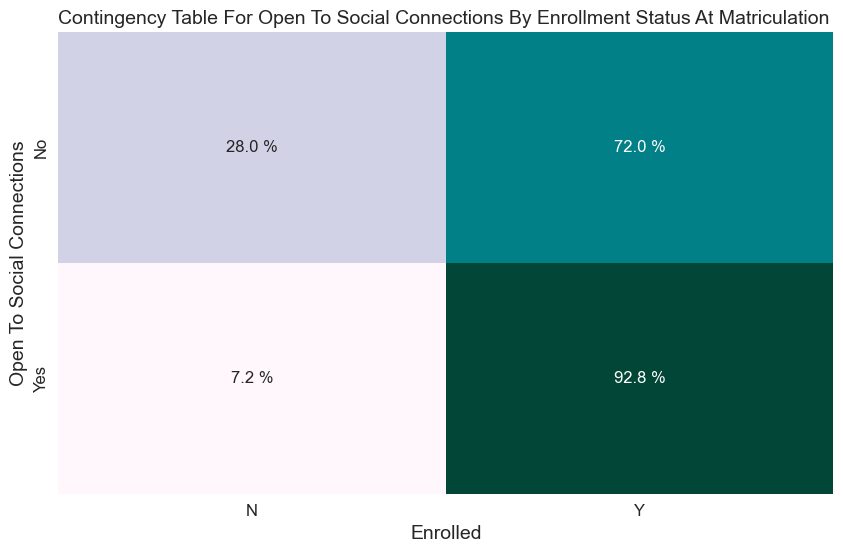

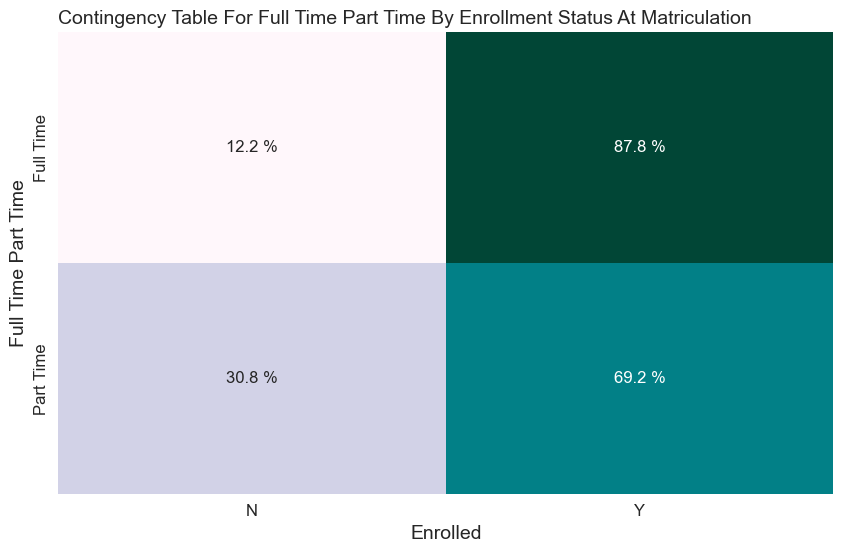

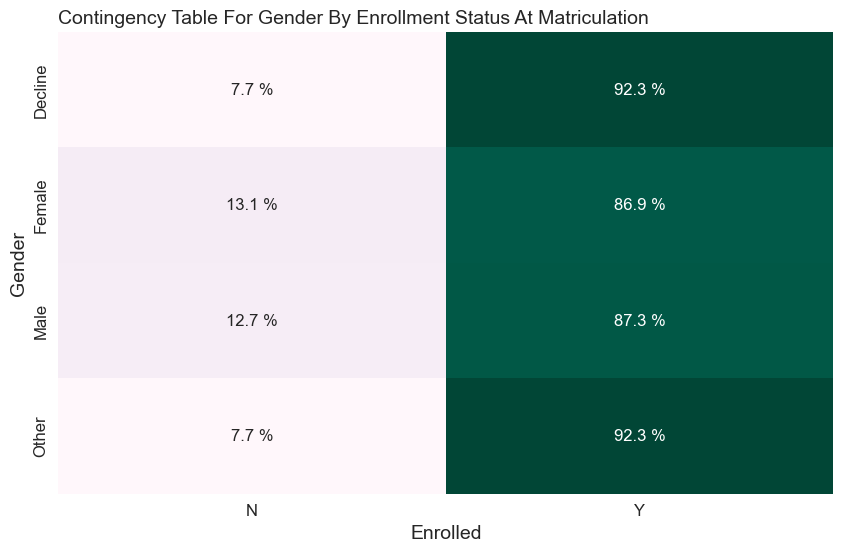

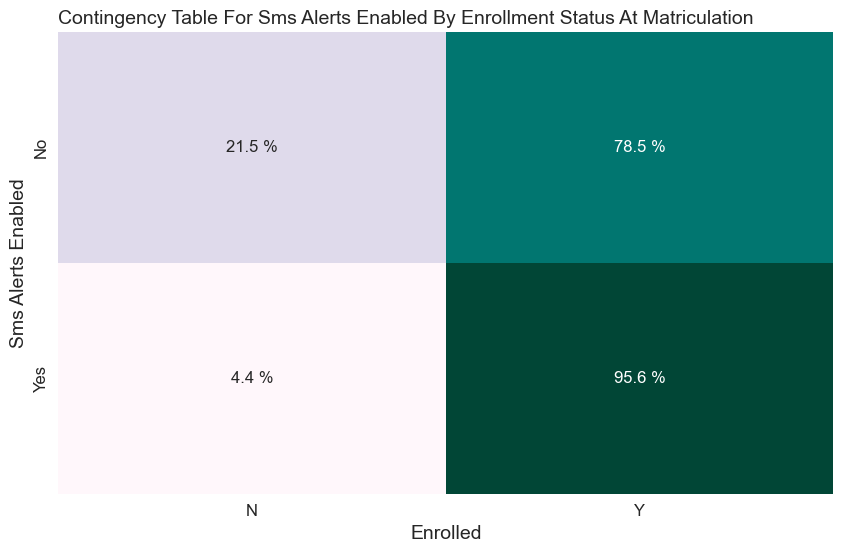

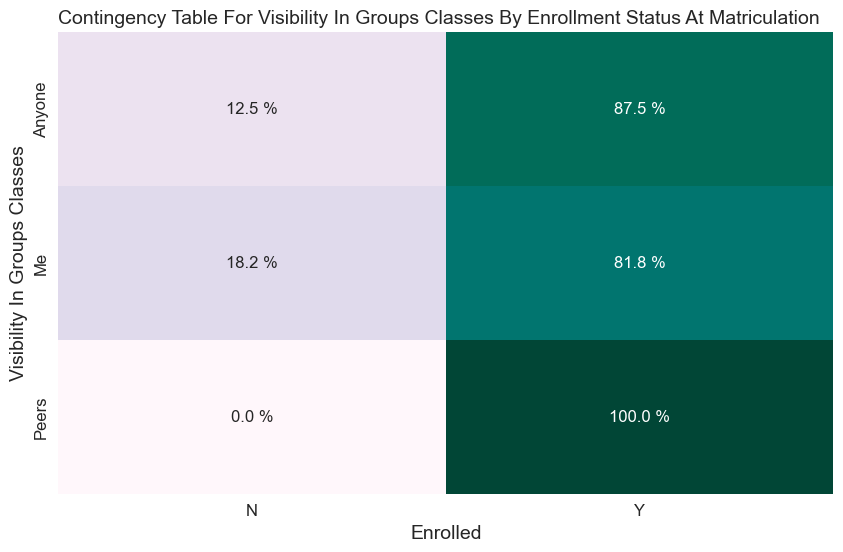

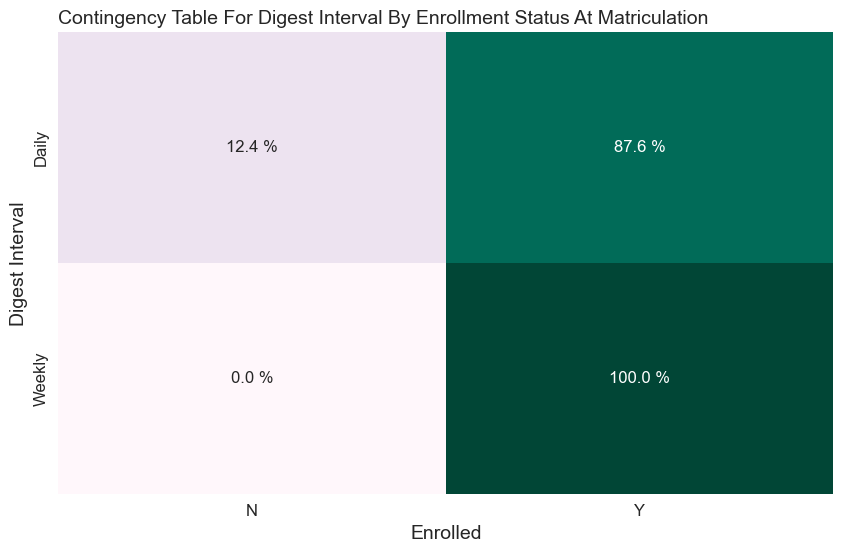

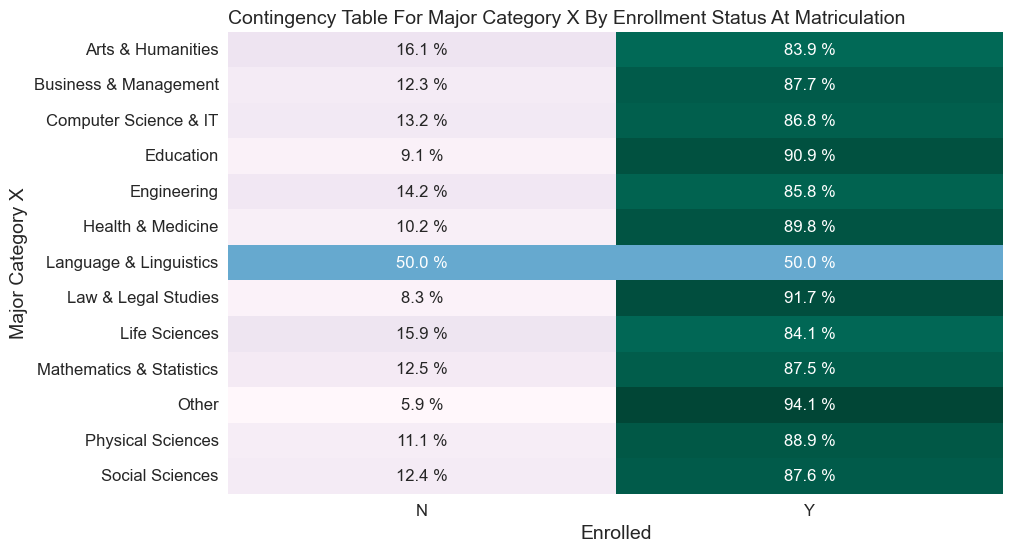

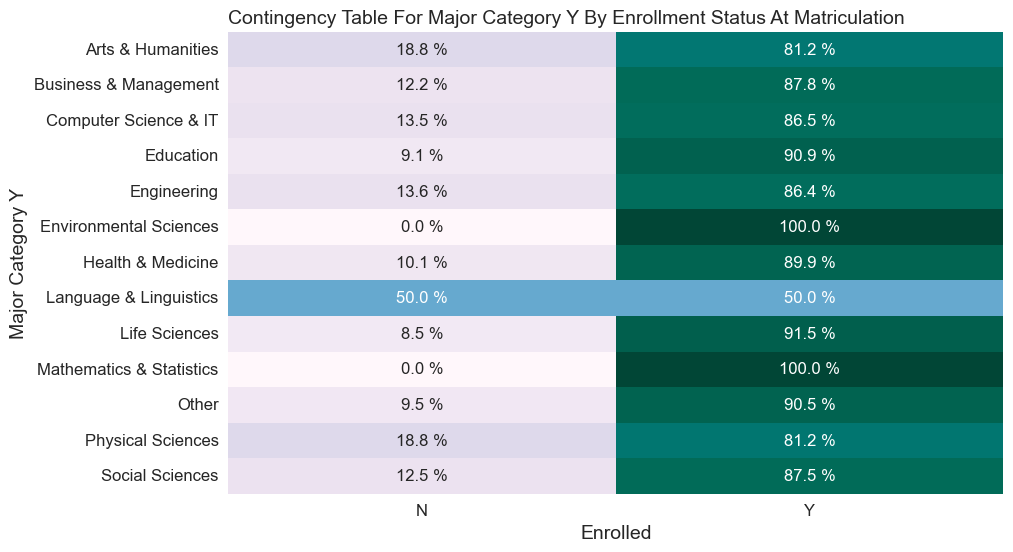

In [21]:
# Plot contingency tables for categorical variables if the column contains at least 2 unique values
for col in categorical_cols:
    if df[col].nunique() > 1:
        contingency_table = pd.crosstab(index=df[col], columns=df['enrolled'], normalize='index') * 100
        plt.figure(figsize=(10, 6))
        ax = sns.heatmap(contingency_table, annot=True, fmt=".1f", cmap='PuBuGn', cbar=False, annot_kws={"size": 12})
        for t in ax.texts: t.set_text(t.get_text() + " %")
        # Format the title as title case and replace underscores with spaces
        plt.title(f'Contingency Table for {col} by Enrollment Status at Matriculation'.title().replace('_', ' '))
        plt.xlabel('Enrolled')
        # Format y label as title case and replace underscores with spaces
        plt.ylabel(f'{col}'.title().replace('_', ' '))
        plt.show()


### Count plots

In [22]:
# Define a custom color palette for 'enrolled' = Y, N
custom_palette = {'Y': 'lightseagreen', 'N': 'orange'}

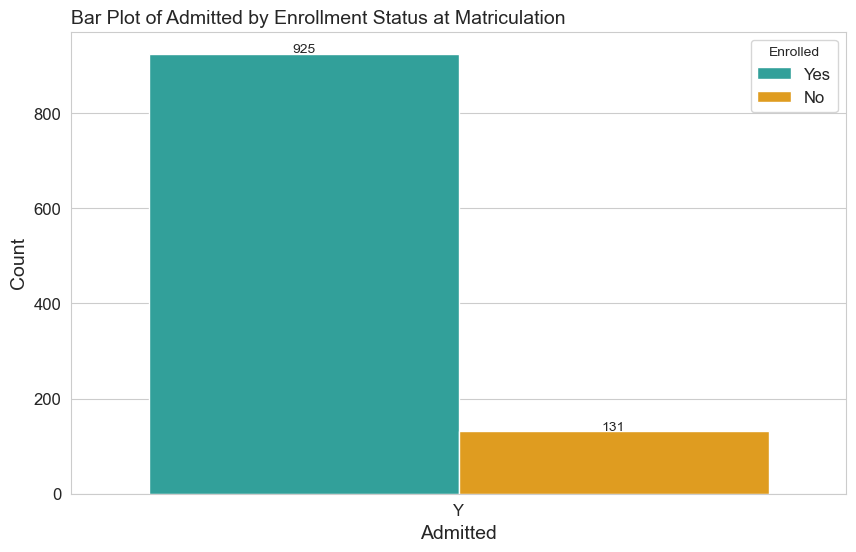

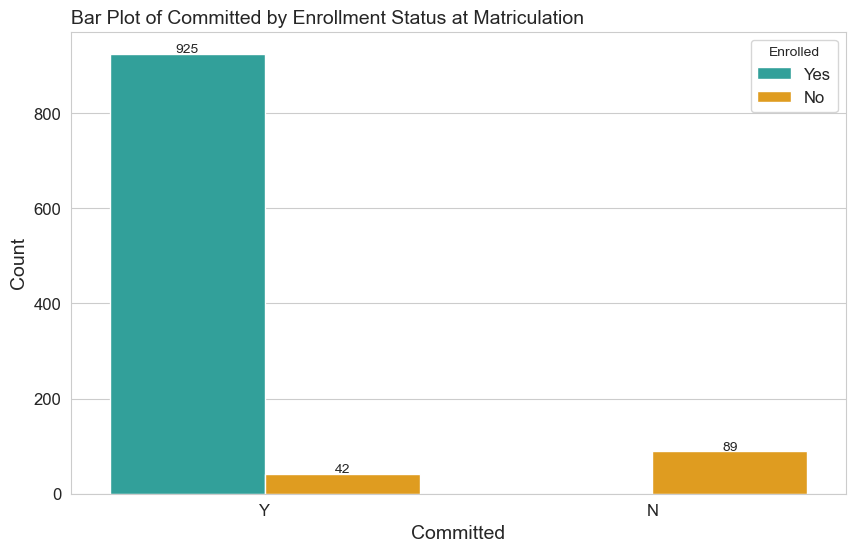

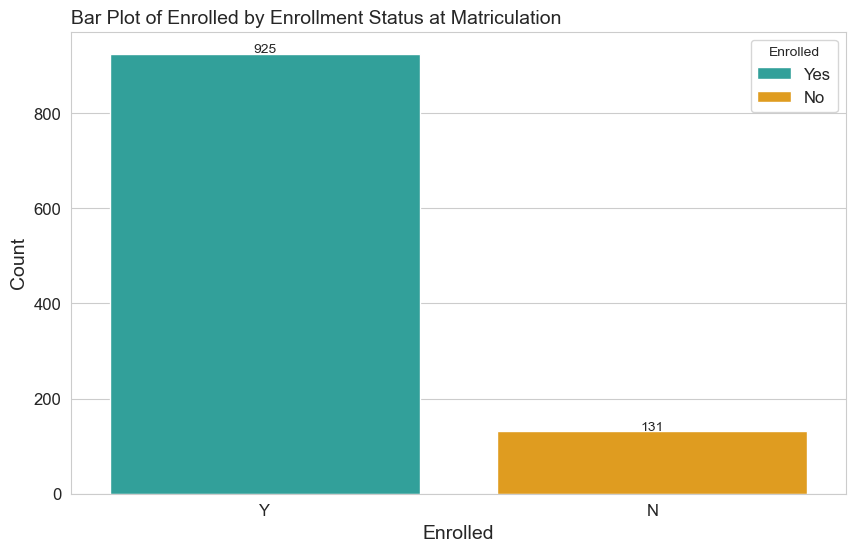

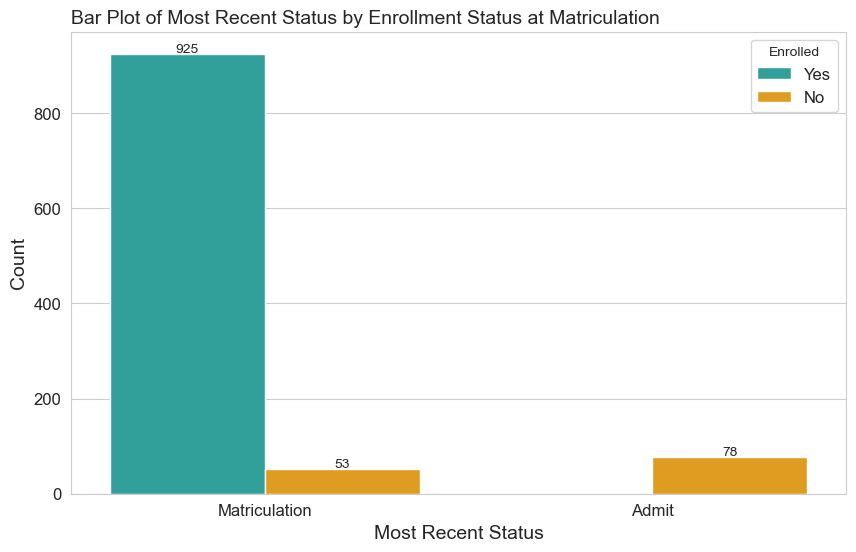

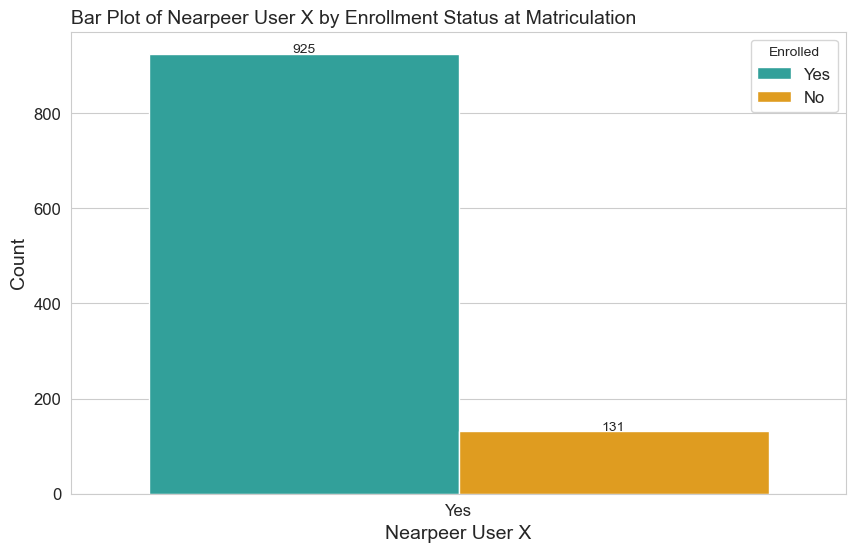

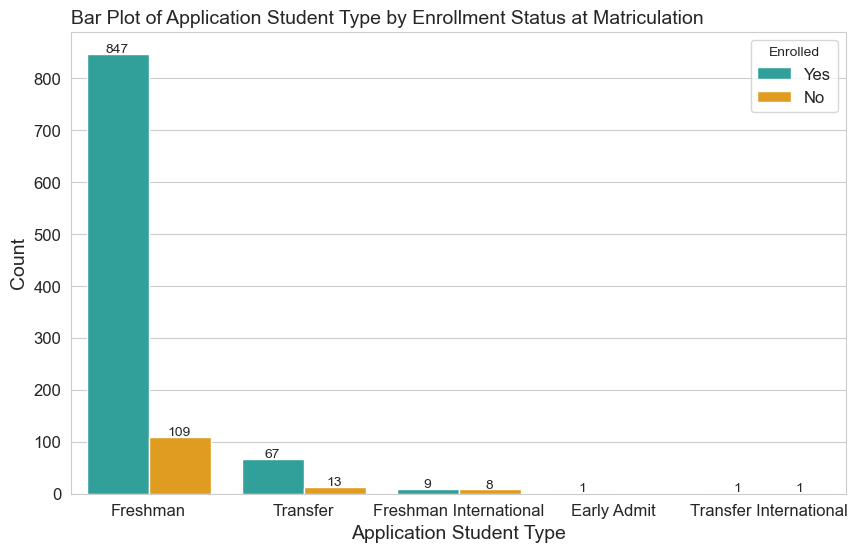

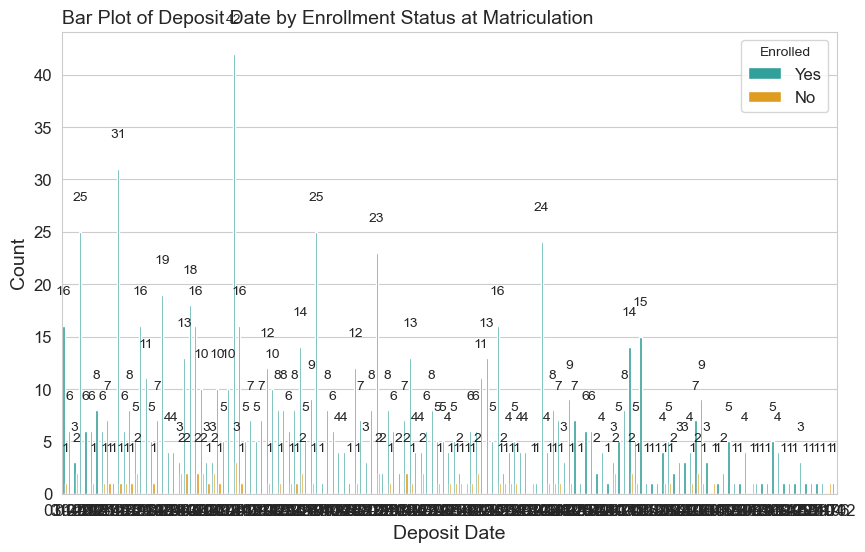

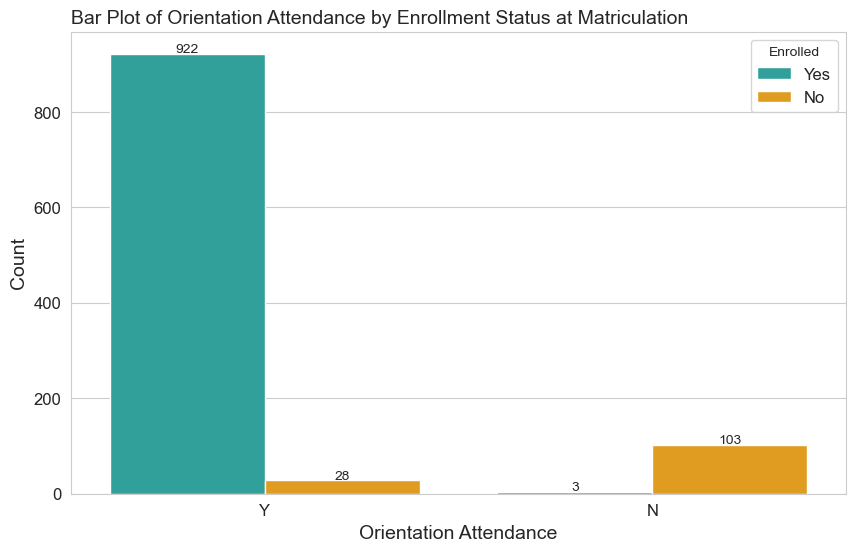

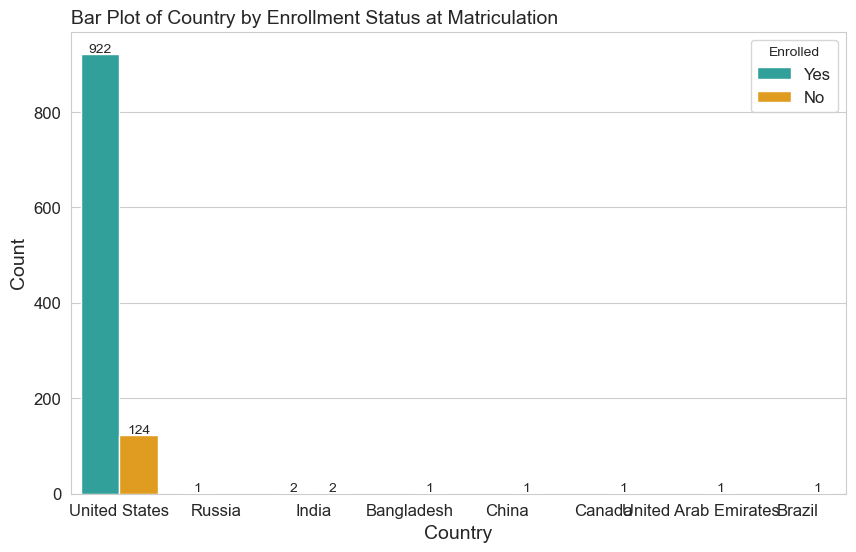

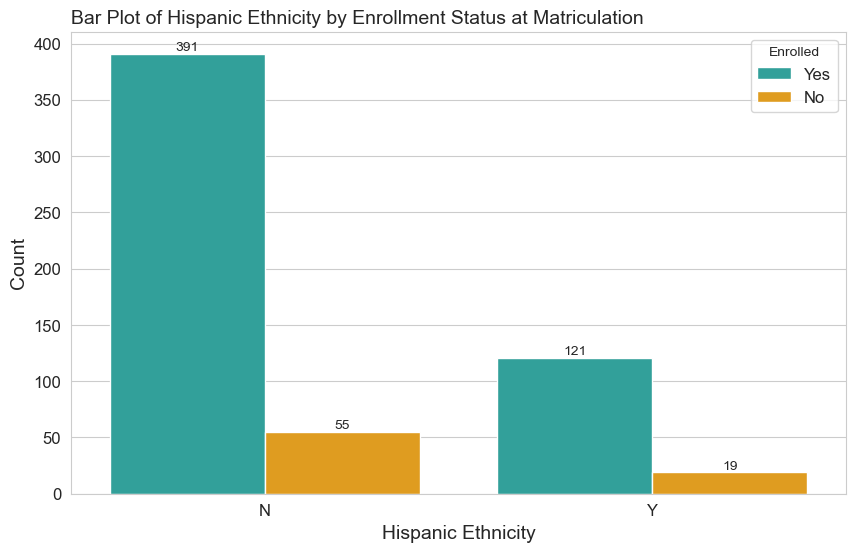

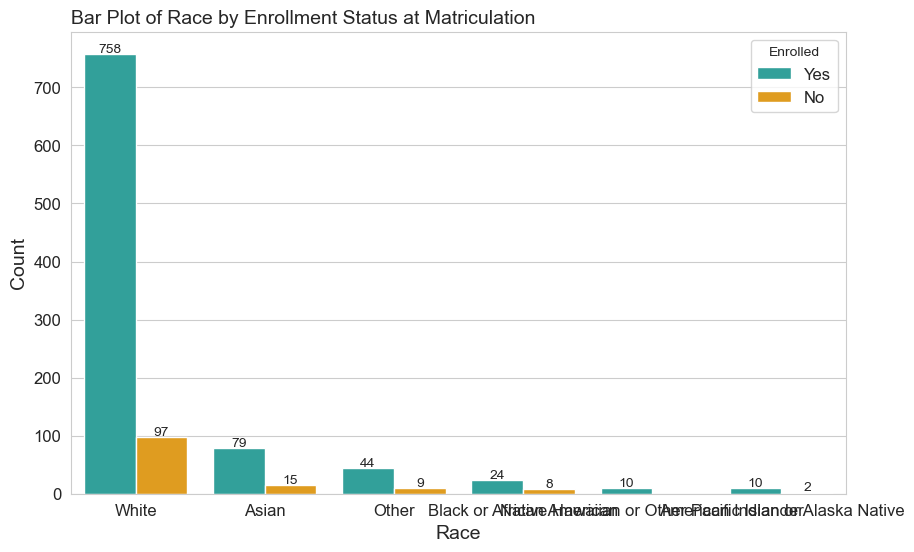

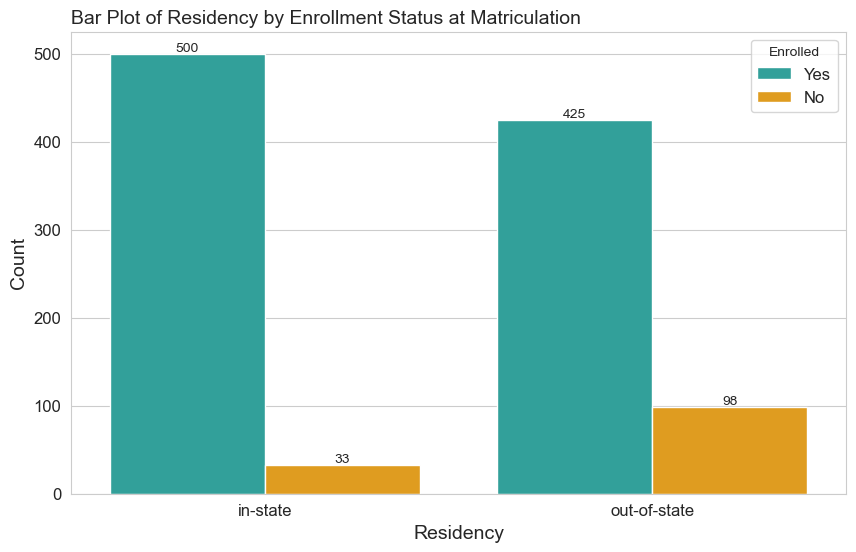

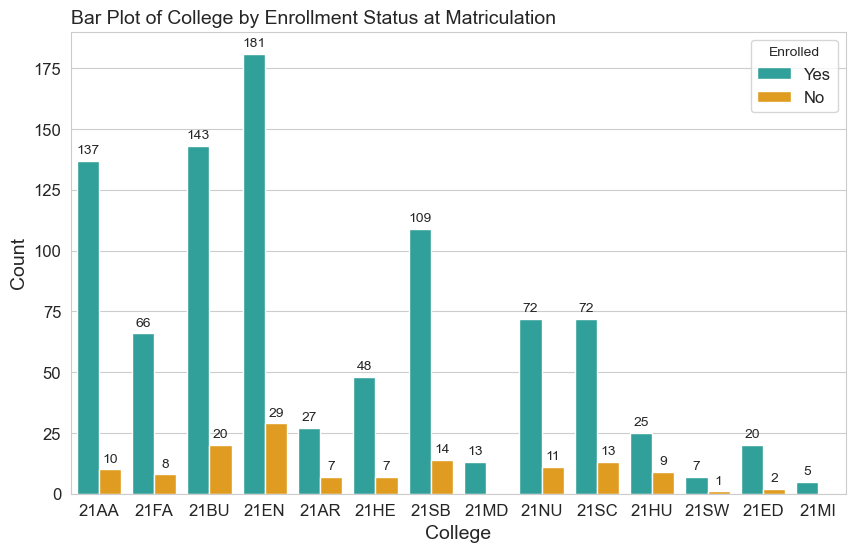

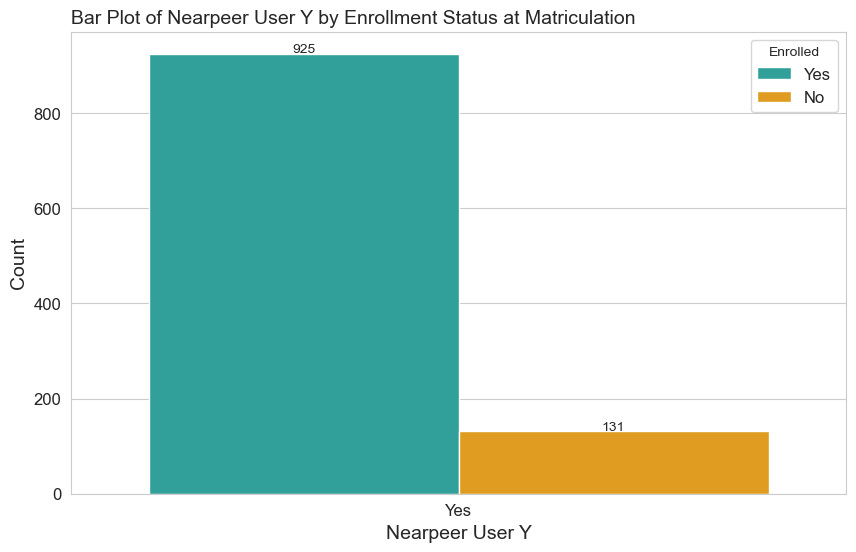

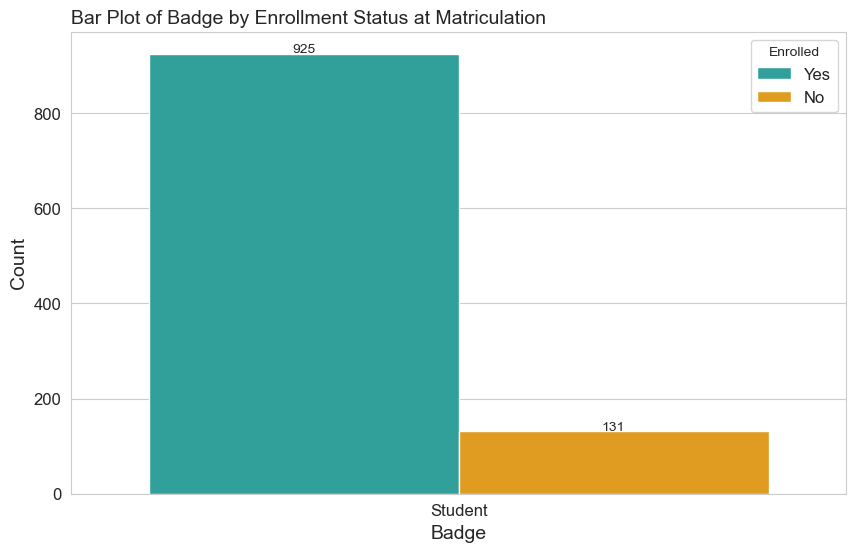

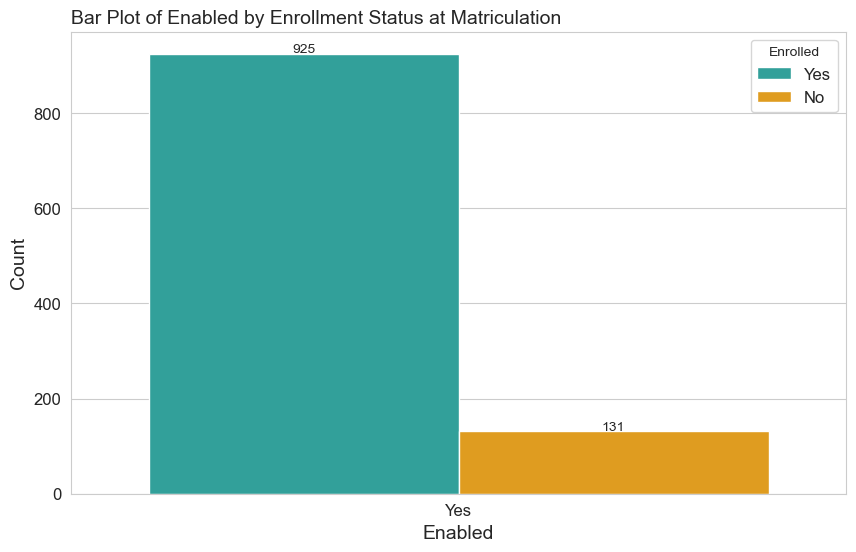

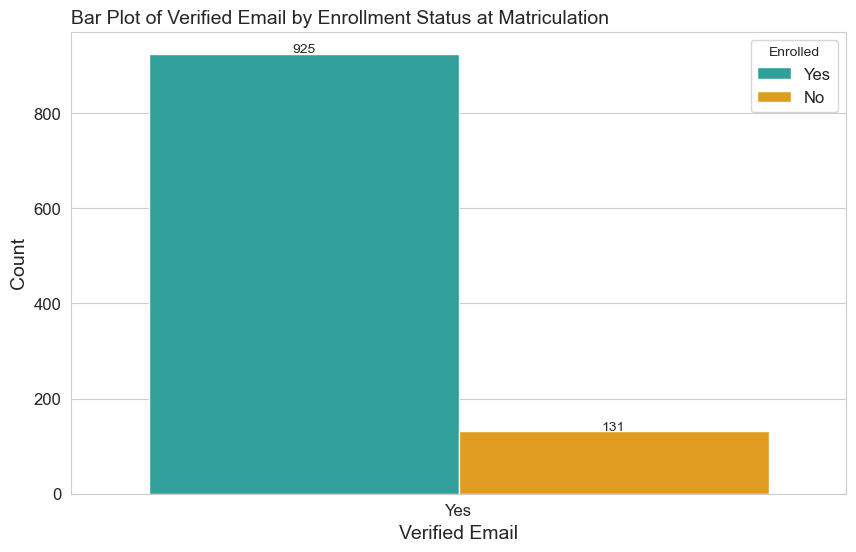

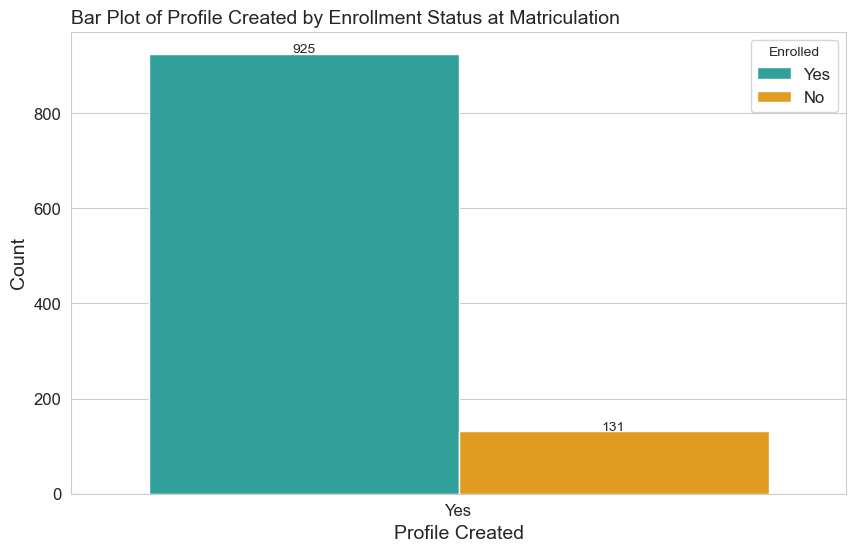

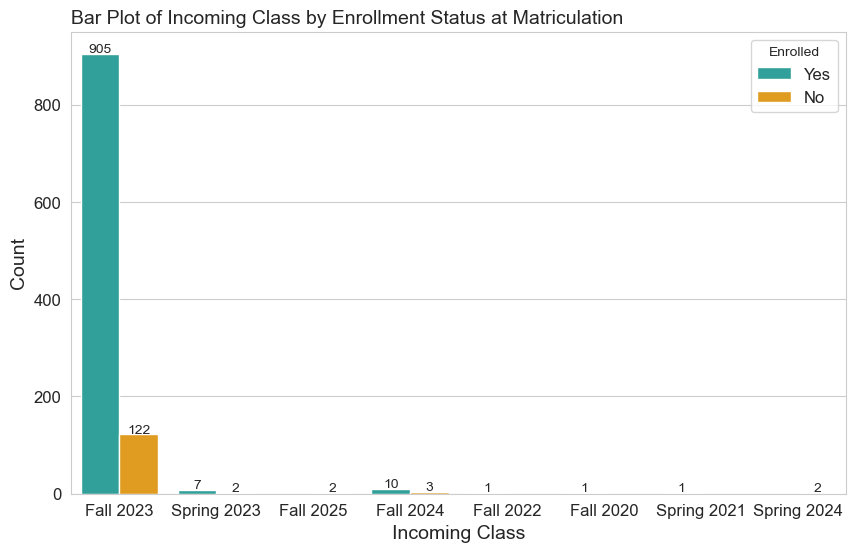

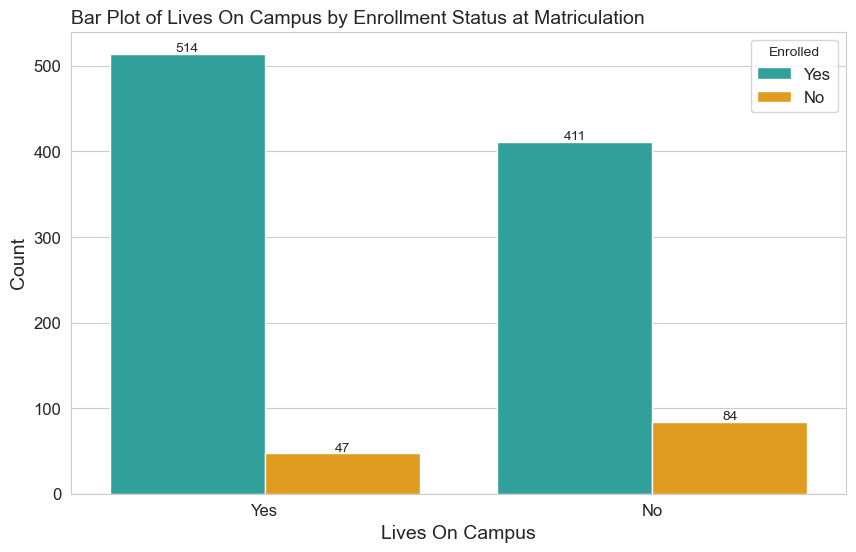

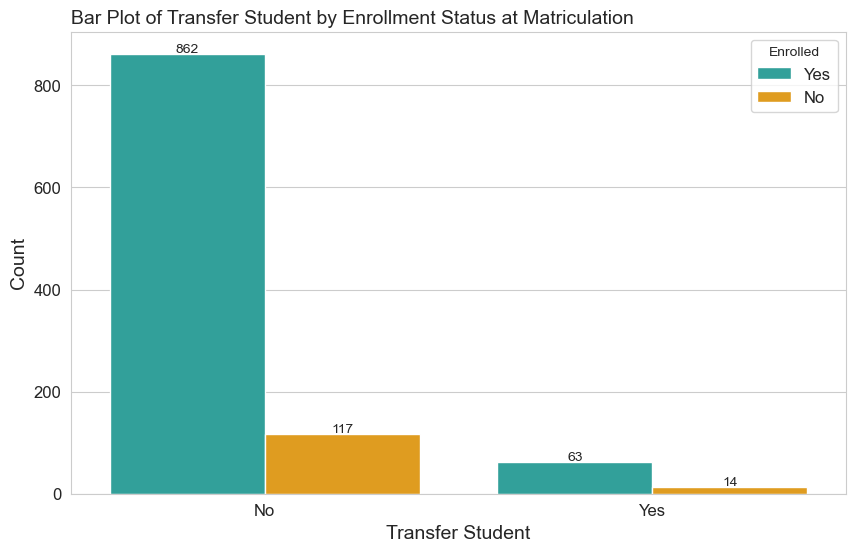

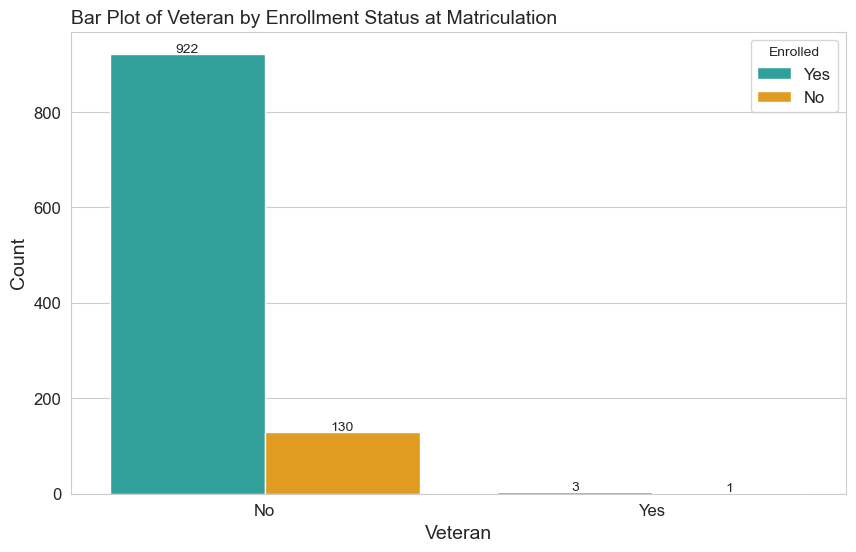

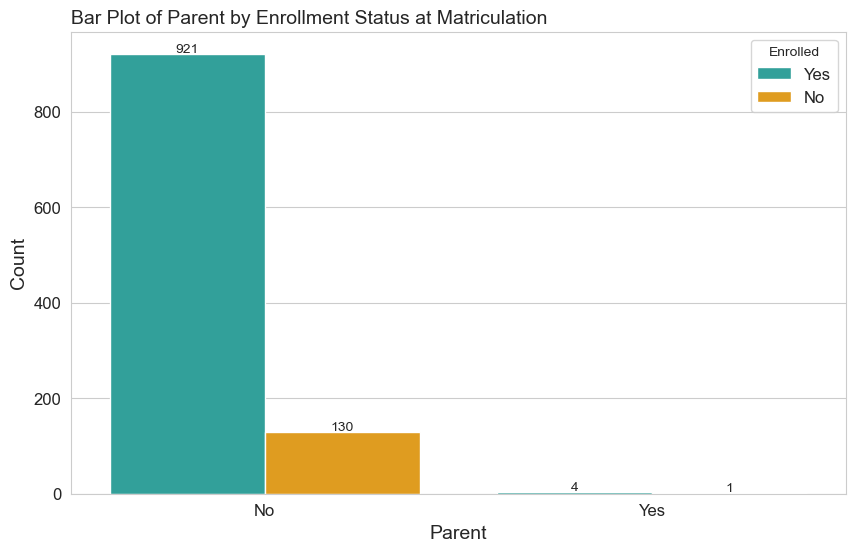

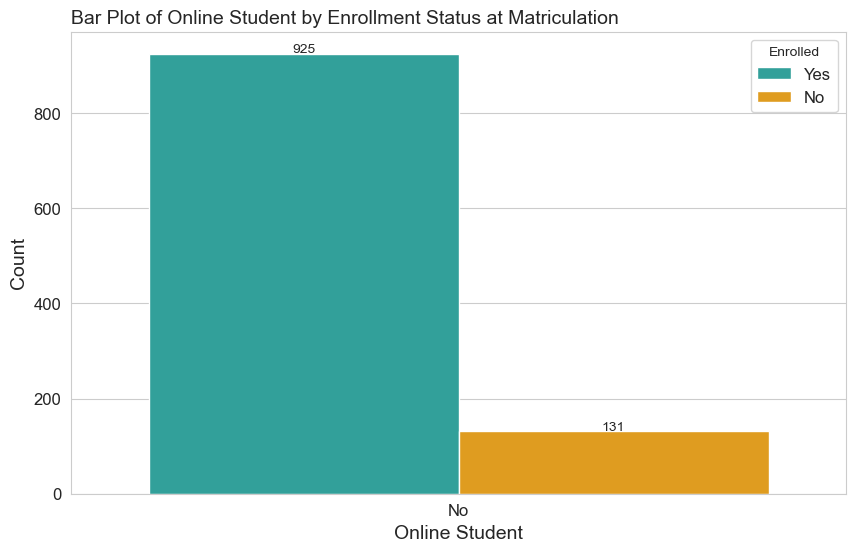

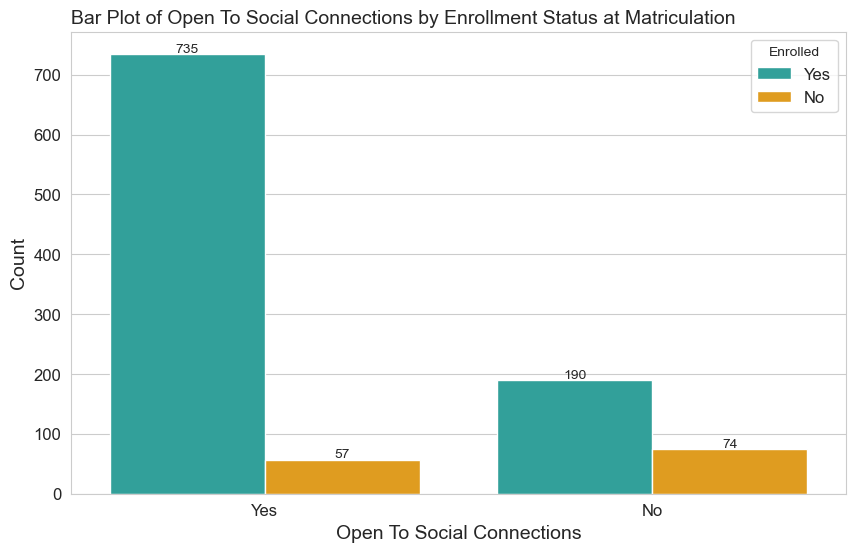

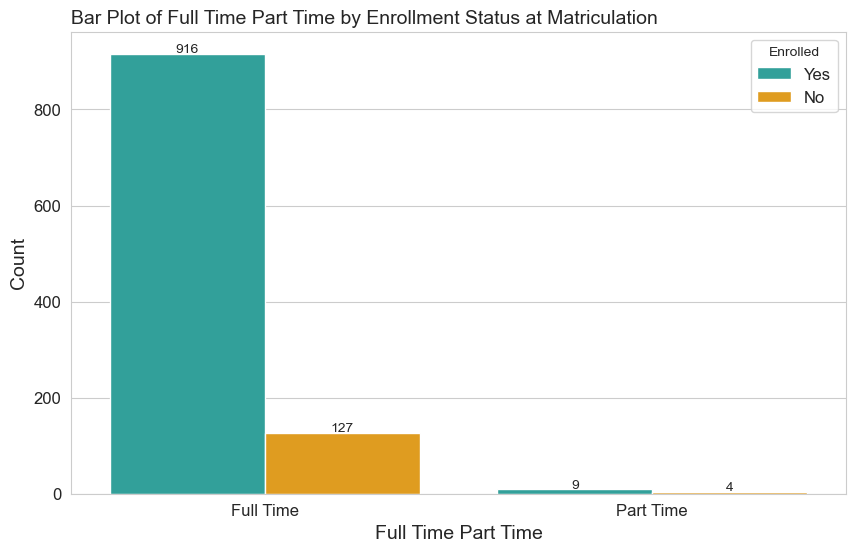

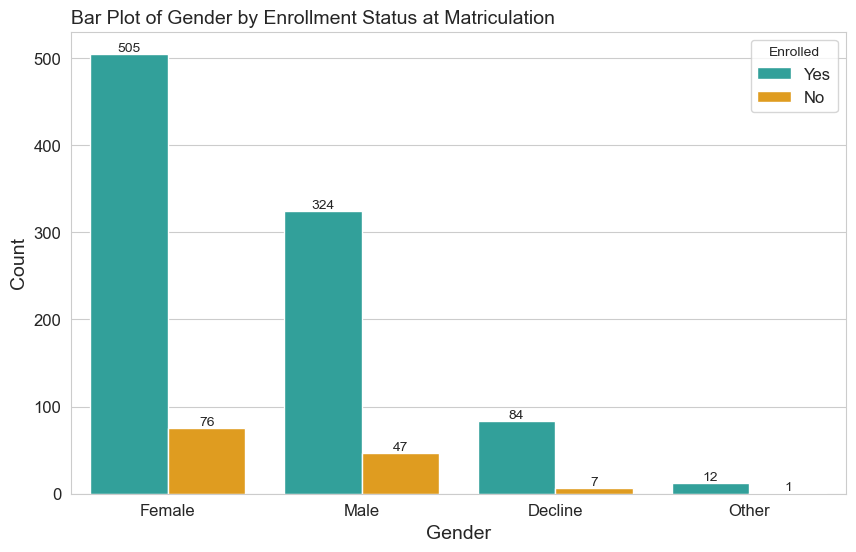

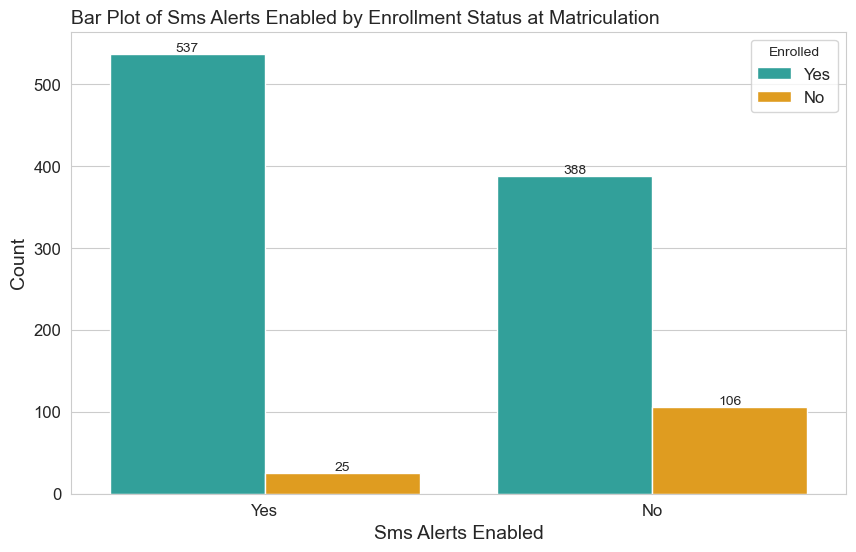

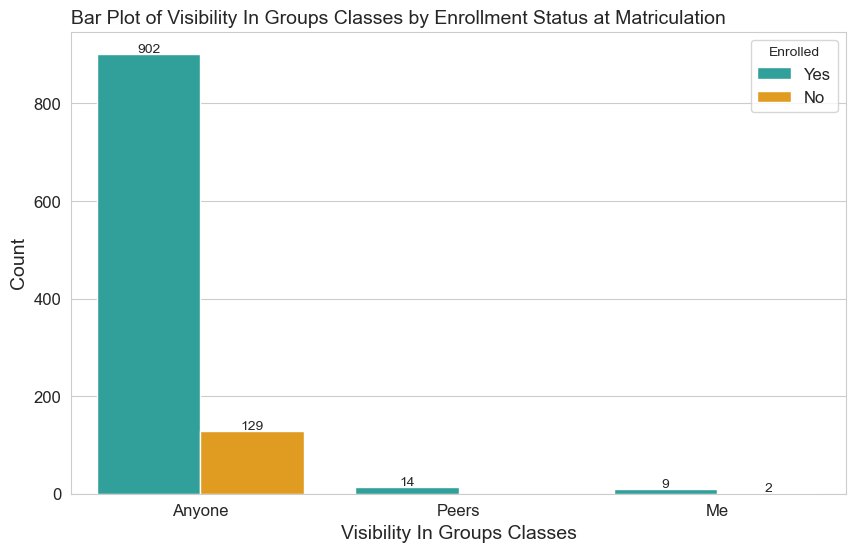

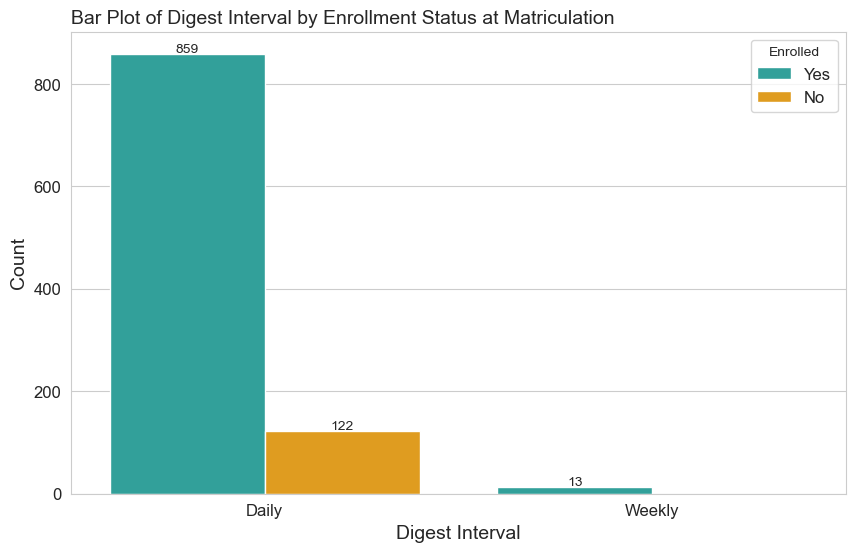

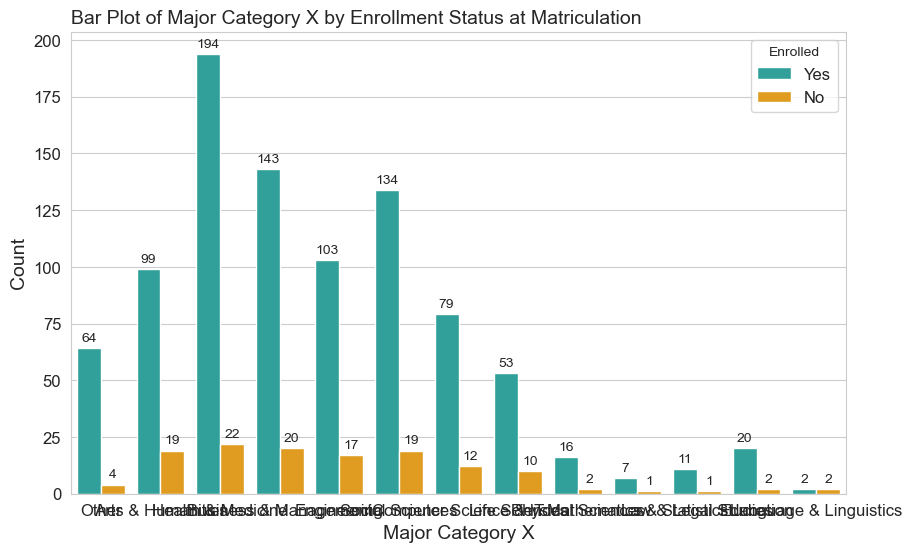

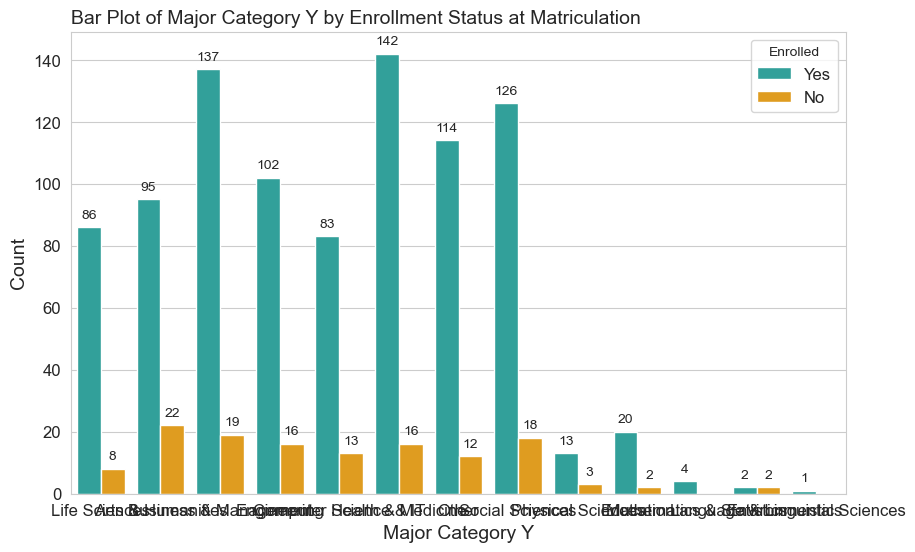

In [67]:
# For each categorical column, create a count plot of the column by enrollment status
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='enrolled', palette=custom_palette)
    plt.title(f'Bar Plot of {col} by Enrollment')
    # format the title as title case and replace underscores with spaces
    plt.title(f'Bar Plot of {col.replace("_", " ").title()} by Enrollment Status at Matriculation')
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    # Format the x-axis label with title case and replace underscores with spaces
    plt.xlabel(col.replace("_", " ").title())
    # Add data labels as integers (unless the count is 0 or null)
    for p in plt.gca().patches:
        height = p.get_height()
        if np.isnan(height):
            height = 0
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, int(height) if height > 0 else '', ha='center')
    plt.legend(title='Enrolled', labels=['Yes', 'No'])
    plt.show()

In [24]:
# # For each categorical column, create a count plot by most_recent_status
# for col in categorical_cols:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=df, x=col, hue='most_recent_status')
#     plt.title(f'Count Plot of {col} by Most Recent Status')
#     plt.xticks(rotation=45)
#     plt.show()

### Correlations

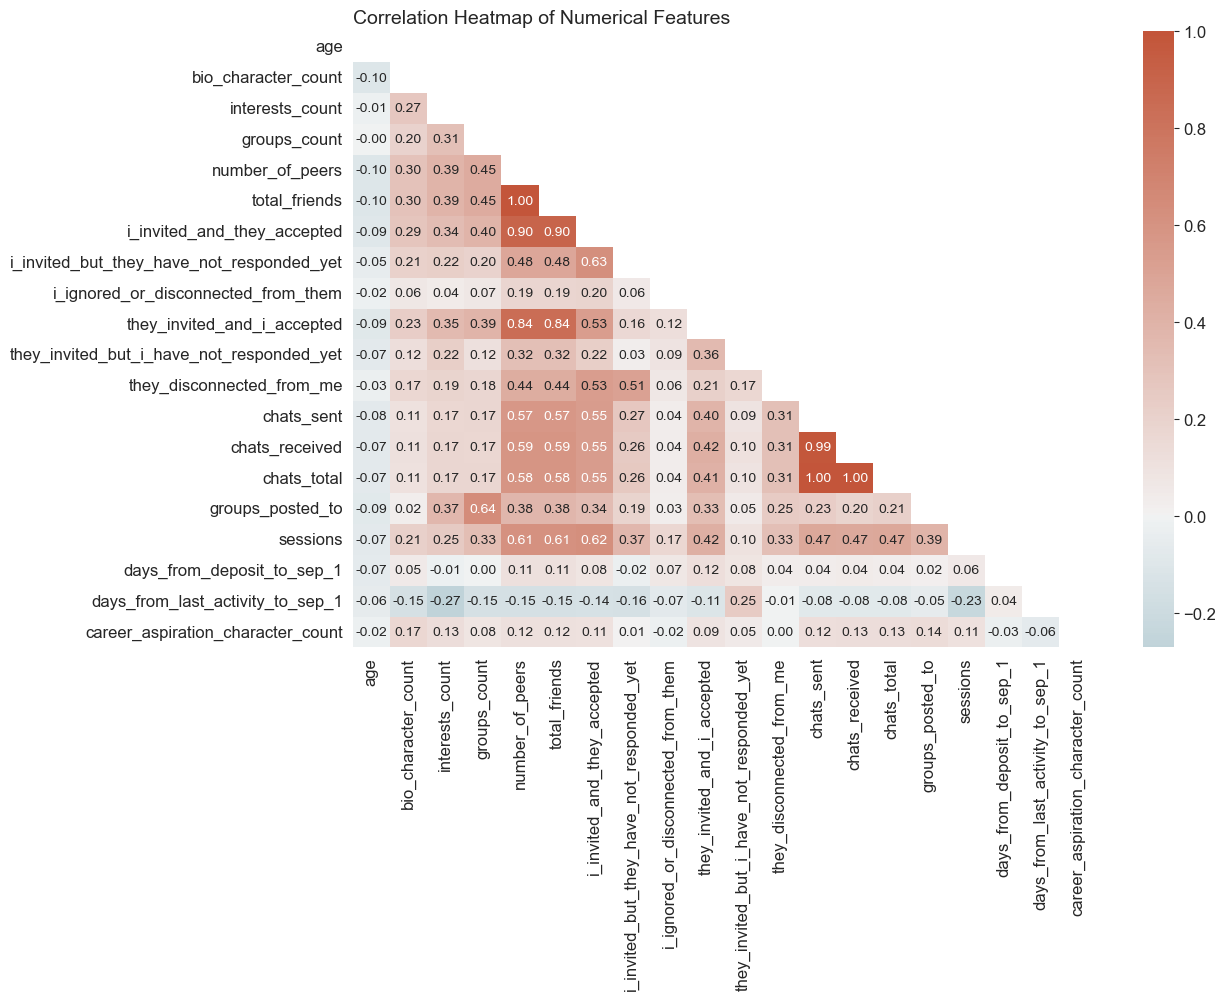

In [77]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns.tolist()

# Drop some columns from numerical_cols
exclude_cols = ['graduating_class', 'roux_class_record_id', 'user_id', 'bio_[deleted_for_privacy]', 'invitations', 'enrolled_num', 'enrolled']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Create a correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
sns.set_style('white')
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', mask=mask, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=90, ha='center', va='top', fontsize=12)
plt.yticks(rotation=0, ha='right', va='center', fontsize=12)
plt.show()
sns.set_style('whitegrid')

In [78]:
# Show the highly correlated pairs of features (correlation > 0.7 or < -0.7)
correlation_pairs = correlation_matrix.stack()
correlation_pairs = correlation_pairs.reset_index()
correlation_pairs.columns = ['feature1', 'feature2', 'correlation']
correlation_pairs['correlation_type'] = correlation_pairs['correlation'].apply(
    lambda x: 'strong positive' if x > 0 else 'strong negative'
)
correlation_pairs = correlation_pairs.apply(
    lambda row: pd.Series(sorted([row['feature1'], row['feature2']]), index=['feature1', 'feature2']) if row['feature1'] > row['feature2'] else row,
    axis=1
)
correlation_pairs = correlation_pairs[((correlation_pairs['correlation'].abs() > 0.7) | 
                                      (correlation_pairs['correlation'] < -0.7)) &
                                      (correlation_pairs['feature1'] != correlation_pairs['feature2'])]
correlation_pairs = correlation_pairs.drop_duplicates(subset=['feature1', 'feature2', 'correlation'])
correlation_pairs.sort_values(by='correlation', ascending=False).reset_index(drop=True)

correlation correlation_type                     feature1  \
0     1.000000  strong positive              number_of_peers   
1     0.996743  strong positive                   chats_sent   
2     0.996368  strong positive               chats_received   
3     0.986255  strong positive               chats_received   
4     0.903658  strong positive  i_invited_and_they_accepted   
5     0.903658  strong positive  i_invited_and_they_accepted   
6     0.841454  strong positive              number_of_peers   
7     0.841454  strong positive  they_invited_and_i_accepted   

                      feature2  
0                total_friends  
1                  chats_total  
2                  chats_total  
3                   chats_sent  
4              number_of_peers  
5                total_friends  
6  they_invited_and_i_accepted  
7                total_friends

In [27]:
# Show the moderately correlated pairs of features (0.7 > correlation > 0.5 or -0.7 < correlation < -0.5)
moderately_correlated_pairs = correlation_matrix.stack()
moderately_correlated_pairs = moderately_correlated_pairs.reset_index()
moderately_correlated_pairs.columns = ['feature1', 'feature2', 'correlation']
moderately_correlated_pairs['correlation_type'] = moderately_correlated_pairs['correlation'].apply(
    lambda x: 'moderate positive' if x > 0 else 'moderate negative'
)
moderately_correlated_pairs = moderately_correlated_pairs.apply(
    lambda row: pd.Series(sorted([row['feature1'], row['feature2']]), index=['feature1', 'feature2']) if row['feature1'] > row['feature2'] else row,
    axis=1
)
moderately_correlated_pairs = moderately_correlated_pairs[((moderately_correlated_pairs['correlation'].abs() > 0.5) &
                                        (moderately_correlated_pairs['correlation'].abs() < 0.7)) &
                                        (moderately_correlated_pairs['feature1'] != moderately_correlated_pairs['feature2'])]
moderately_correlated_pairs = moderately_correlated_pairs.drop_duplicates(subset=['feature1', 'feature2', 'correlation'])
moderately_correlated_pairs.sort_values(by='correlation', ascending=False).reset_index(drop=True)

correlation   correlation_type                                   feature1  \
0      0.641038  moderate positive                               groups_count   
1      0.631524  moderate positive                i_invited_and_they_accepted   
2      0.623412  moderate positive                i_invited_and_they_accepted   
3      0.610198  moderate positive                            number_of_peers   
4      0.610198  moderate positive                                   sessions   
5      0.589524  moderate positive                             chats_received   
6      0.589524  moderate positive                             chats_received   
7      0.583832  moderate positive                                chats_total   
8      0.583832  moderate positive                                chats_total   
9      0.574532  moderate positive                                 chats_sent   
10     0.574532  moderate positive                                 chats_sent   
11     0.548082  moderate positive                                chats_total   
12     0.546244  moderate positive                             chats_received   
13     0.546152  moderate positive                                 chats_sent   
14     0.529010  moderate positive                i_invited_and_they_accepted   
15     0.528988  moderate positive                i_invited_and_they_accepted   
16     0.509616  moderate positive  i_invited_but_they_have_not_responded_yet   

                                     feature2  
0                            groups_posted_to  
1   i_invited_but_they_have_not_responded_yet  
2                                    sessions  
3                                    sessions  
4                               total_friends  
5                             number_of_peers  
6                               total_friends  
7                             number_of_peers  
8                               total_friends  
9                             number_of_peers  
10                              total_friends  
11                i_invited_and_they_accepted  
12                i_invited_and_they_accepted  
13                i_invited_and_they_accepted  
14                  they_disconnected_from_me  
15                they_invited_and_i_accepted  
16                  they_disconnected_from_me

### Pairplot

In [28]:
# # Pairplot of Numerical Features
# sns.pairplot(df[numerical_cols + ['enrolled']], hue='enrolled', diag_kind='hist', palette=custom_palette)
# plt.show()

### Boxplots

In [29]:
numerical_cols

['age',
 'bio_character_count',
 'interests_count',
 'groups_count',
 'number_of_peers',
 'total_friends',
 'i_invited_and_they_accepted',
 'i_invited_but_they_have_not_responded_yet',
 'i_ignored_or_disconnected_from_them',
 'they_invited_and_i_accepted',
 'they_invited_but_i_have_not_responded_yet',
 'they_disconnected_from_me',
 'chats_sent',
 'chats_received',
 'chats_total',
 'groups_posted_to',
 'sessions',
 'days_from_deposit_to_sep_1',
 'days_from_last_activity_to_sep_1',
 'career_aspiration_character_count']

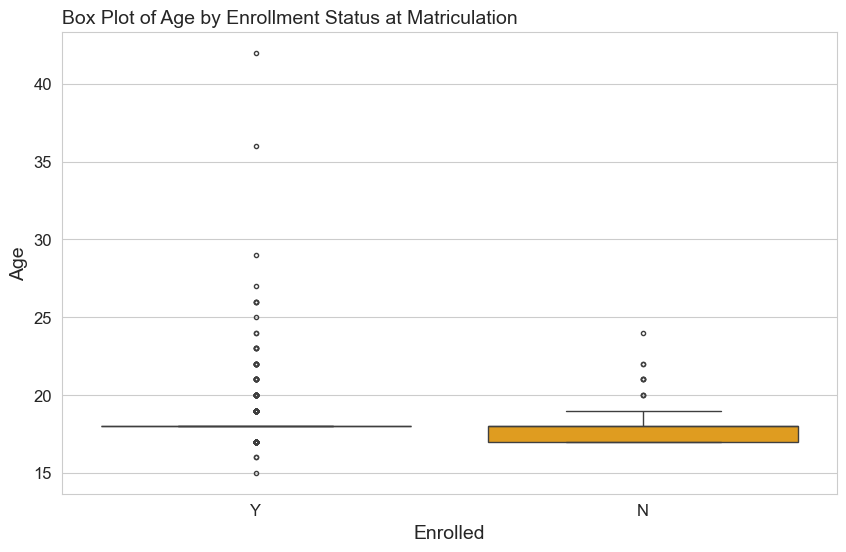

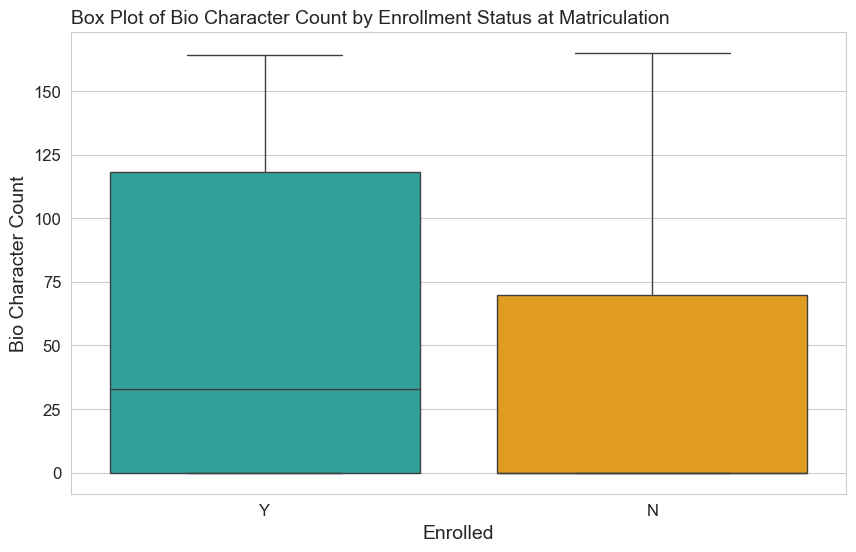

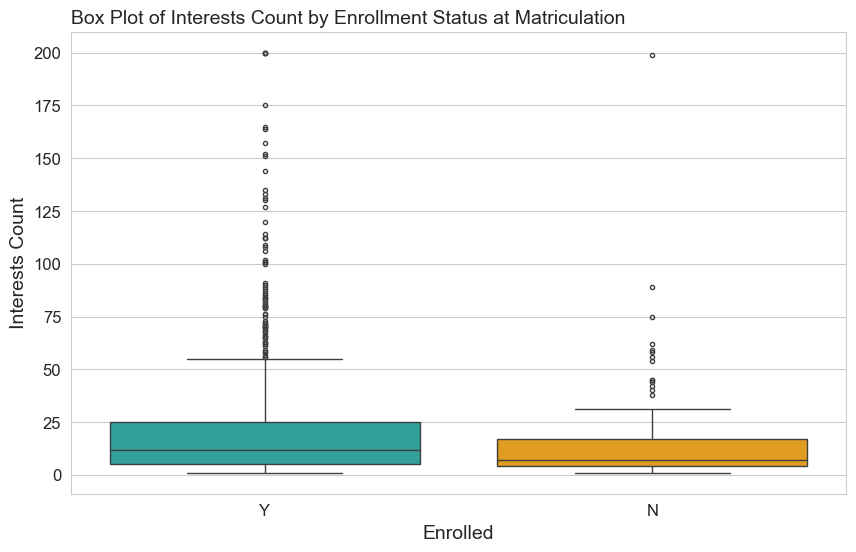

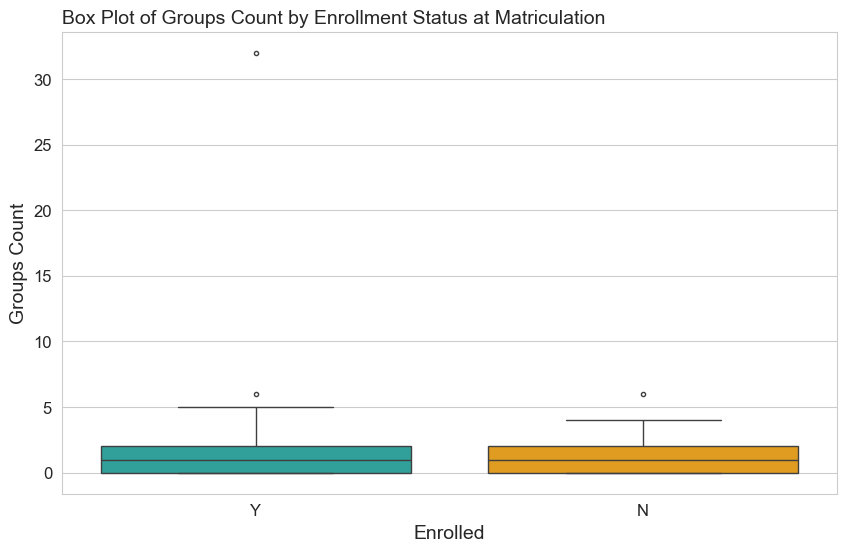

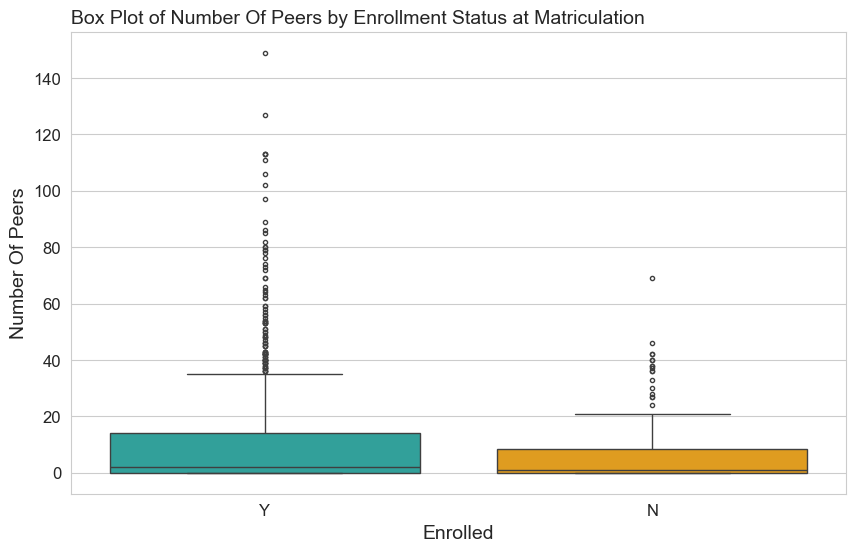

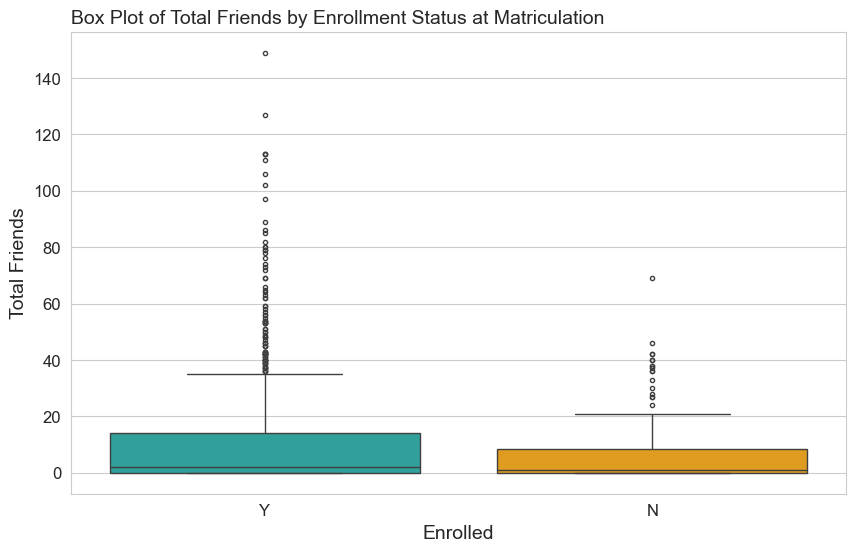

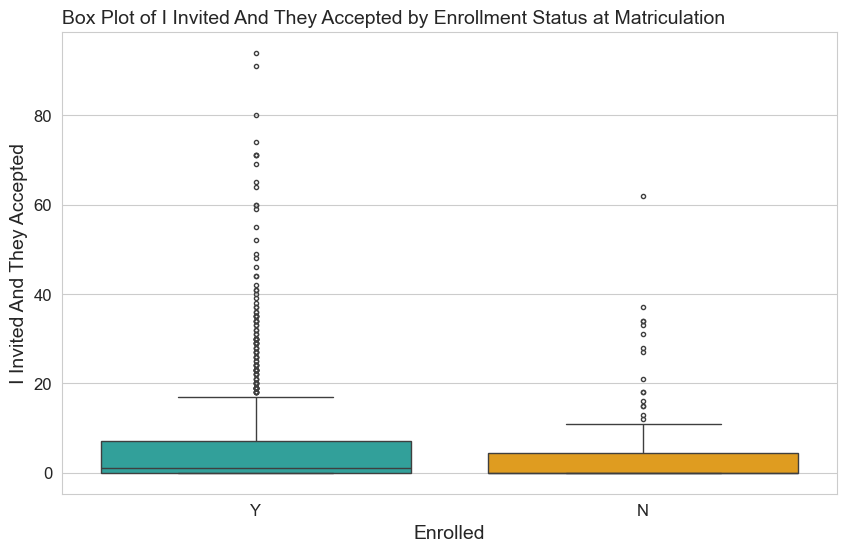

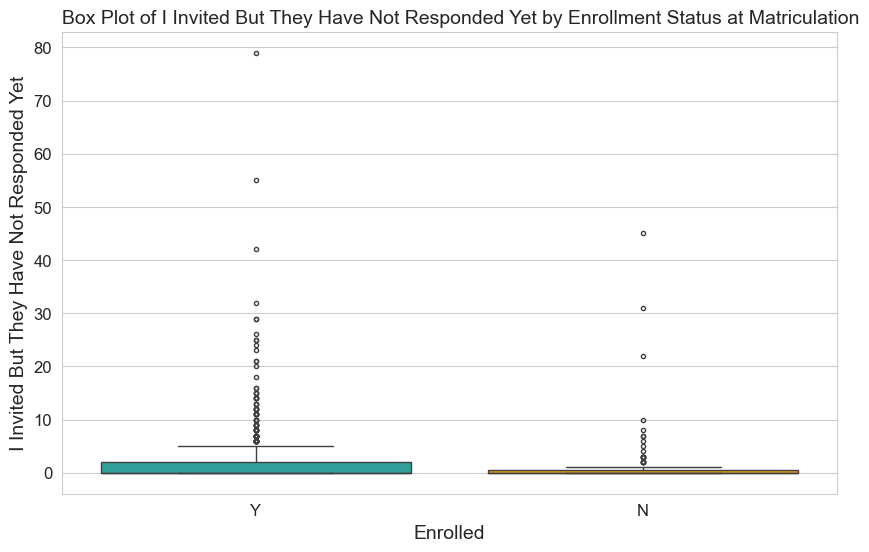

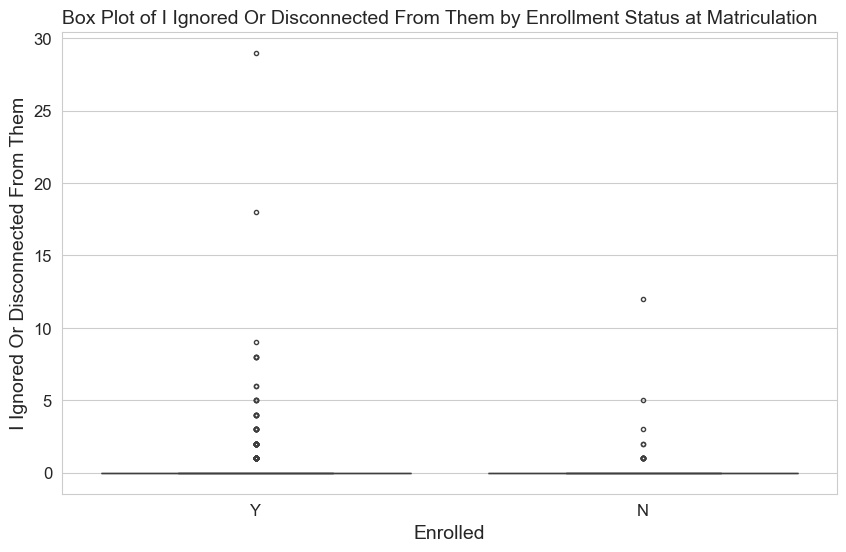

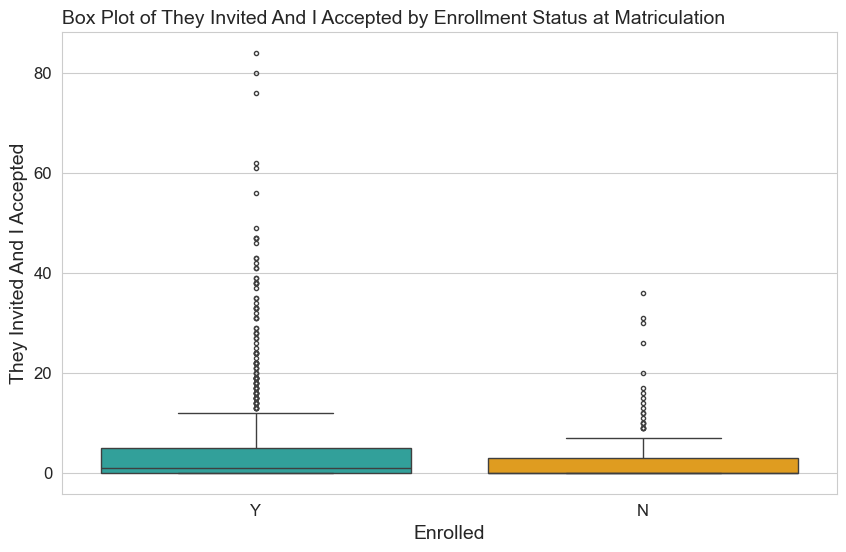

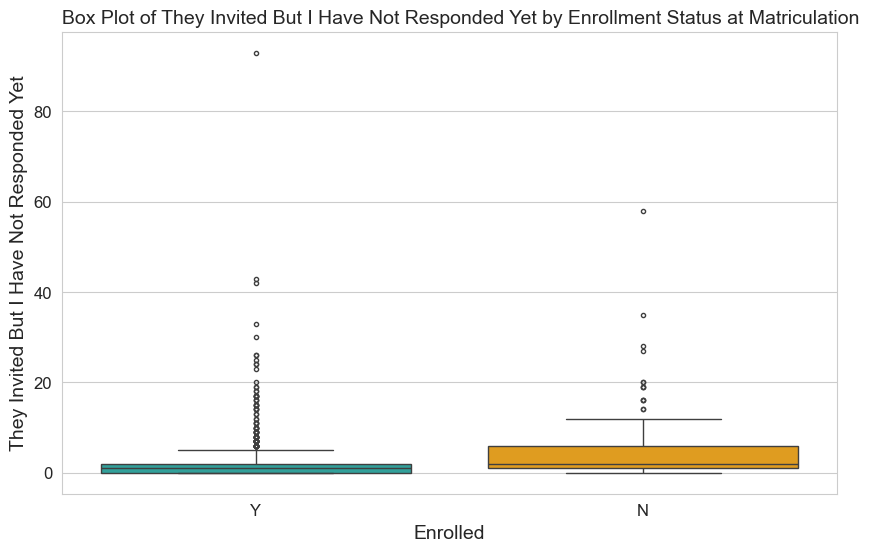

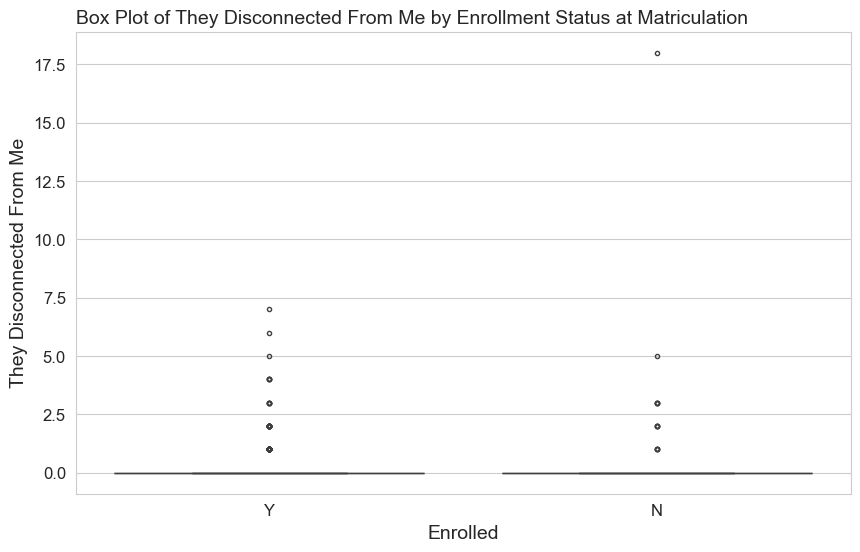

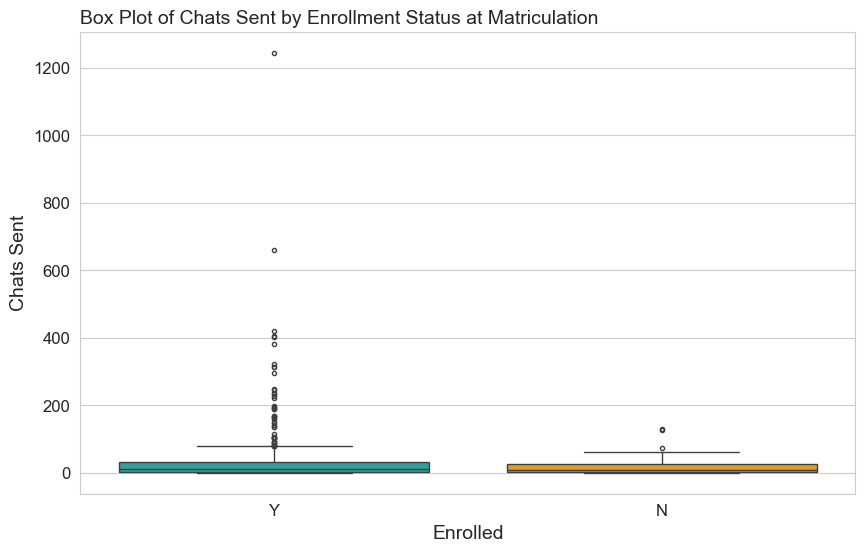

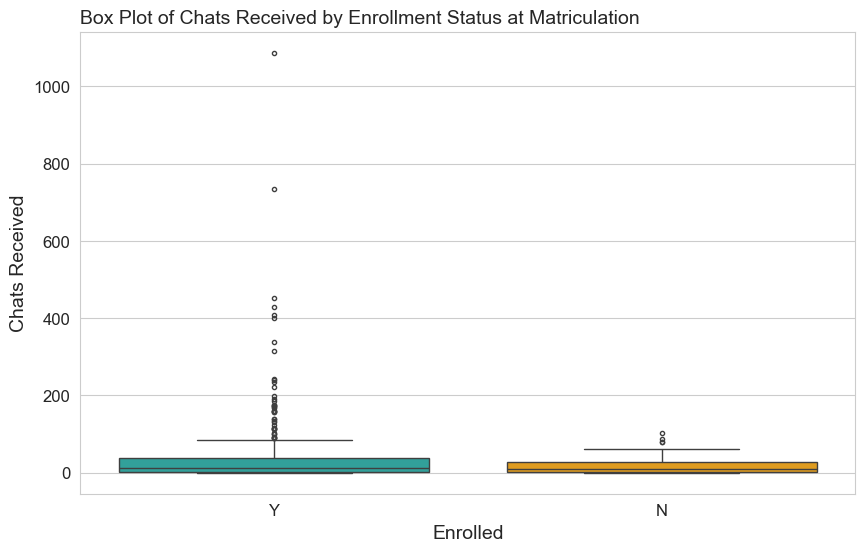

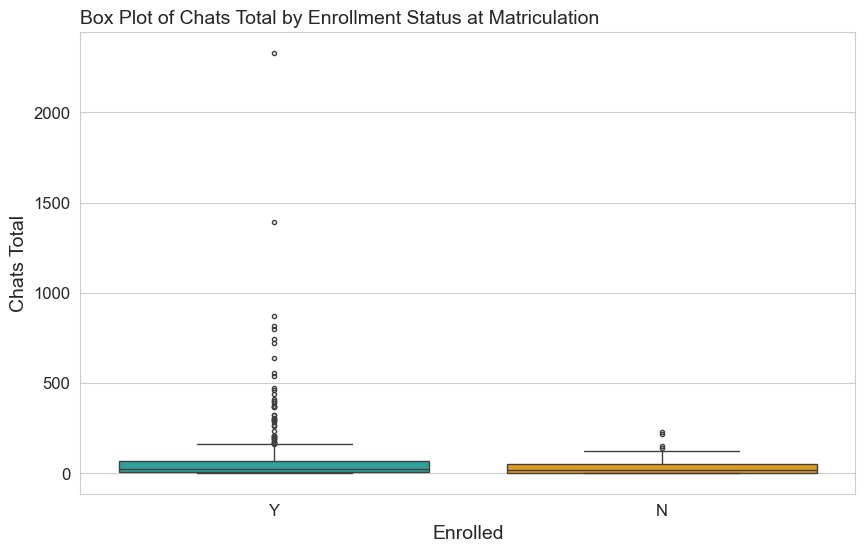

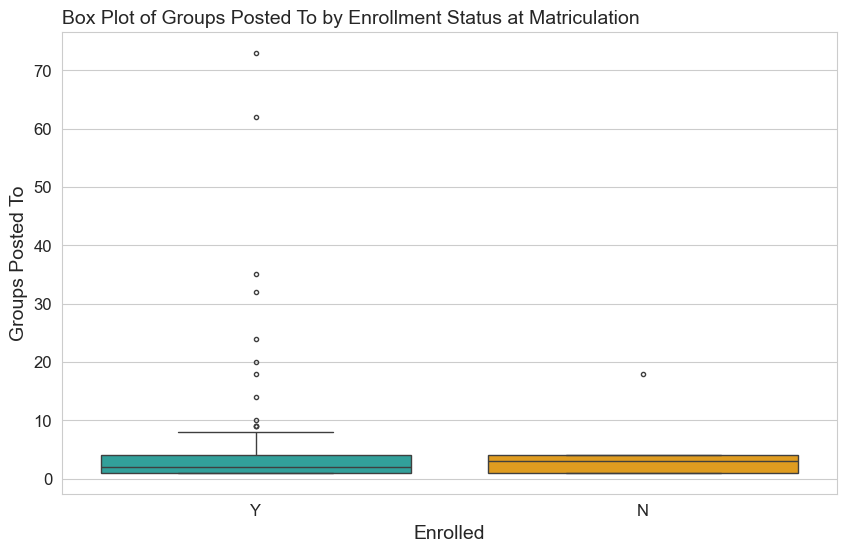

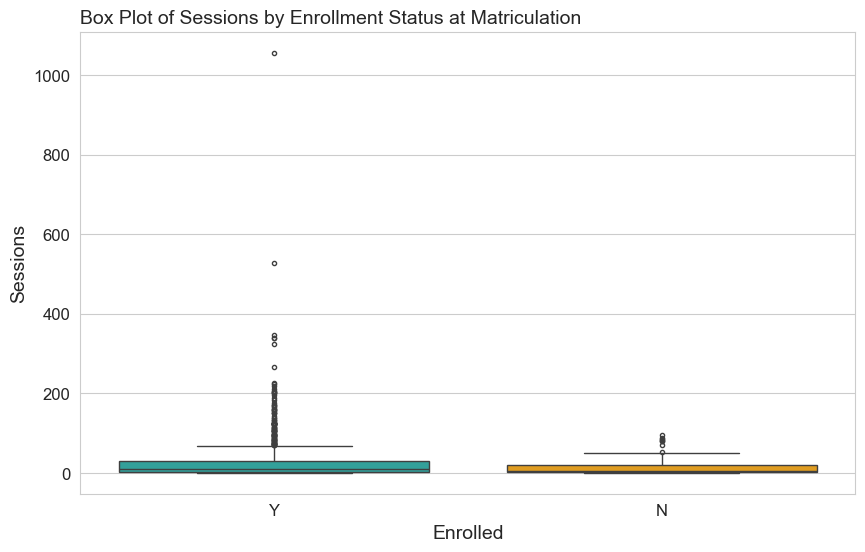

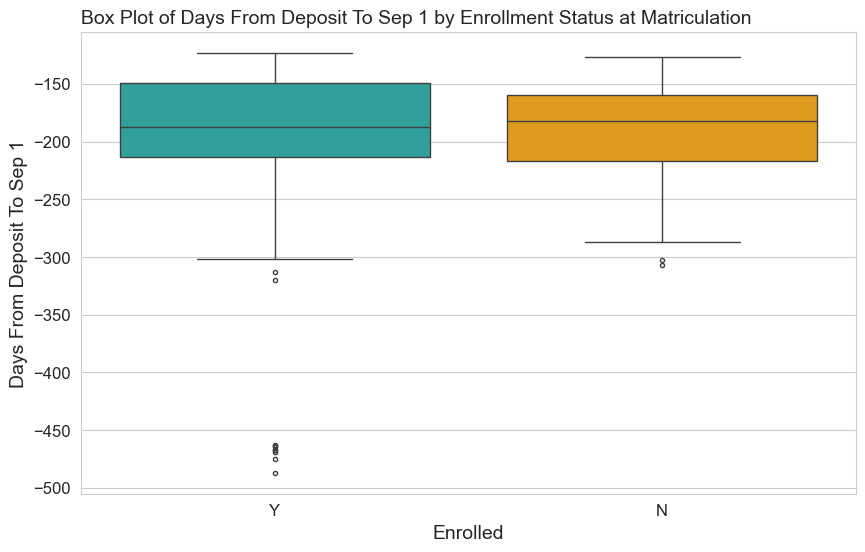

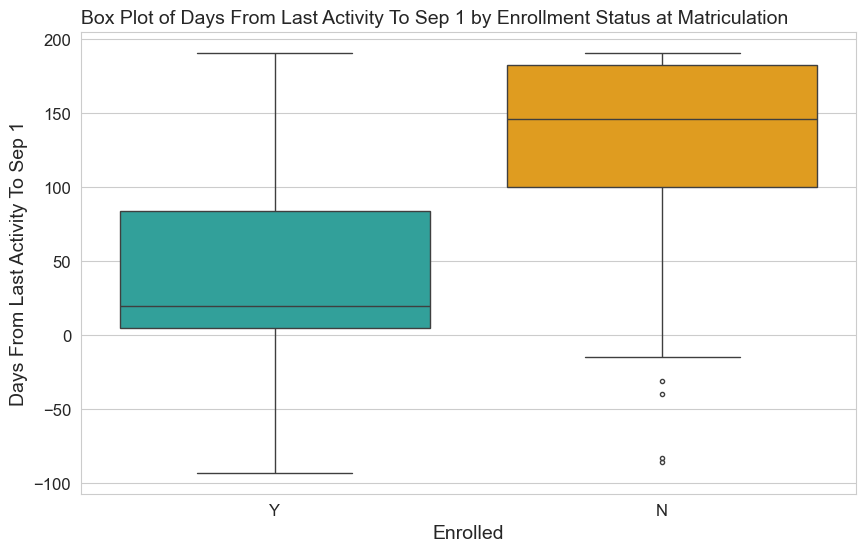

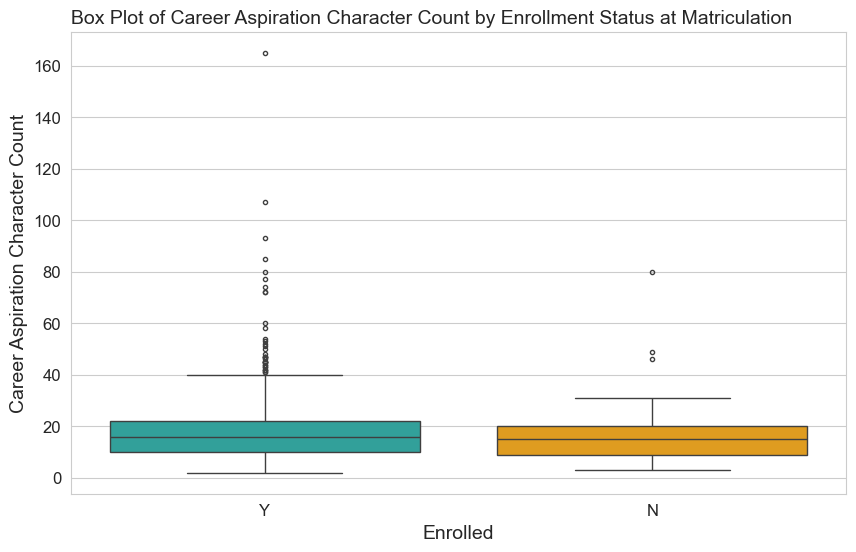

In [30]:
# Plot boxplots by 'enrolled' for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='enrolled', y=col, fliersize=3, hue='enrolled', palette=custom_palette)
    plt.title(f'Box Plot of {col.replace("_", " ").title()} by Enrollment Status at Matriculation')
    plt.ylabel(col.replace("_", " ").title())
    plt.xlabel('Enrolled')
    plt.show()

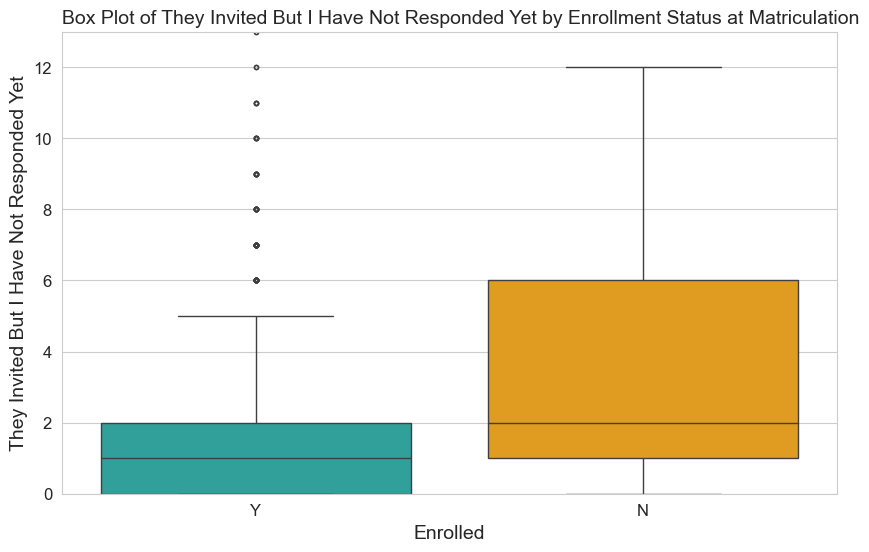

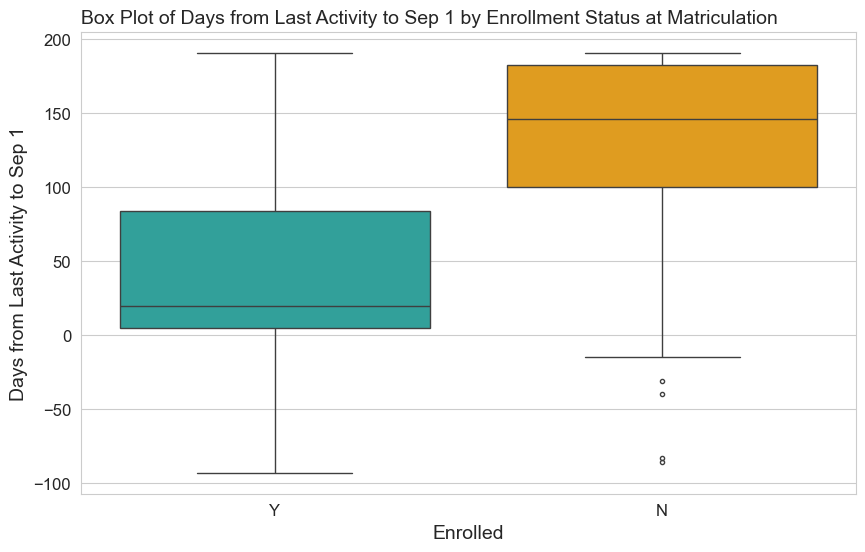

In [31]:
# Box plot of 'they_invited_but_i_have_not_responded_yet' by 'enrolled'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='enrolled', y='they_invited_but_i_have_not_responded_yet', fliersize=3, hue='enrolled', palette=custom_palette)
plt.title('Box Plot of They Invited But I Have Not Responded Yet by Enrollment Status at Matriculation')
plt.ylabel('They Invited But I Have Not Responded Yet')
plt.xlabel('Enrolled')
plt.ylim(0, 13)
plt.show()

# Box plot of 'days_from_last_activity_to_sep_1' by 'enrolled'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='enrolled', y='days_from_last_activity_to_sep_1', fliersize=3, hue='enrolled', palette=custom_palette)
plt.title('Box Plot of Days from Last Activity to Sep 1 by Enrollment Status at Matriculation')
plt.ylabel('Days from Last Activity to Sep 1')
plt.xlabel('Enrolled')
plt.show()


### T-tests
Tells you if there is a significant difference between the mean values of each group.

In [32]:
from scipy.stats import ttest_ind

# Convert Int64 columns to float64 to ensure compatibility with statistical tests
for col in numerical_cols:
    df[col] = df[col].astype('float64')

# Perform the t-tests
ttest_results = pd.DataFrame(columns=['feature', 't_statistic', 'p_value'])

for col in numerical_cols:
    enrolled_values = df[df['enrolled'] == 'Y'][col].dropna()
    not_enrolled_values = df[df['enrolled'] == 'N'][col].dropna()
    if len(enrolled_values) > 1 and len(not_enrolled_values) > 1:
        t_statistic, p_value = ttest_ind(enrolled_values, not_enrolled_values)
        result_df = pd.DataFrame([[col, t_statistic, p_value]], columns=['feature', 't_statistic', 'p_value'])
        ttest_results = pd.concat([ttest_results, result_df], ignore_index=True)

# Sort and display results
ttest_results.sort_values(by='p_value', ascending=True, inplace=True)
ttest_results.reset_index(drop=True, inplace=True)
ttest_results

# List the features with p-values less than 0.05
significant_features = ttest_results[ttest_results['p_value'] < 0.05]
significant_features

C:\Users\dyork\AppData\Local\Temp\ipykernel_46052\3750830403.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ttest_results = pd.concat([ttest_results, result_df], ignore_index=True)


feature  t_statistic       p_value
0           days_from_last_activity_to_sep_1   -15.360427  3.340942e-48
1  they_invited_but_i_have_not_responded_yet    -5.062841  4.872480e-07
2                        bio_character_count     3.593045  3.419323e-04
3                  they_disconnected_from_me    -2.568047  1.036419e-02
4                            interests_count     2.446534  1.458625e-02
5                                   sessions     2.427942  1.536140e-02
6                            number_of_peers     2.018330  4.380981e-02
7                              total_friends     2.018330  4.380981e-02

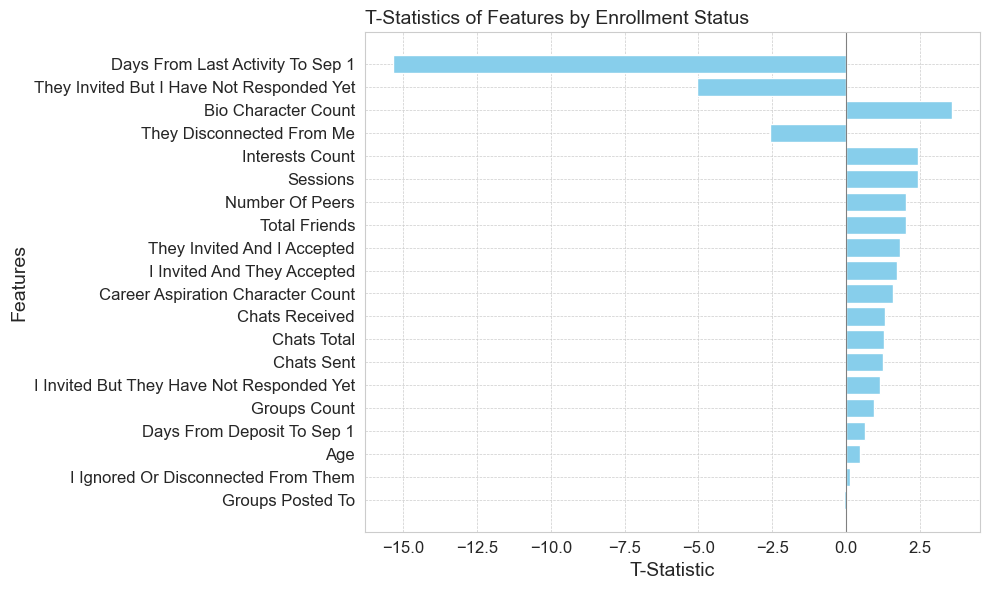

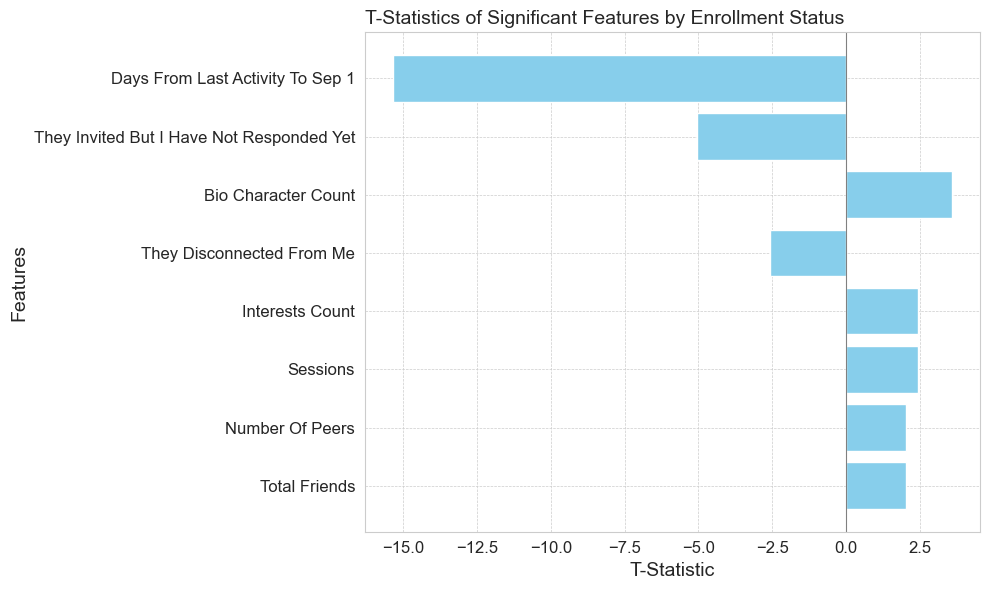

In [75]:
plt.figure(figsize=(10, 6))
plt.barh(ttest_results['feature'][::-1], ttest_results['t_statistic'][::-1], color='skyblue')
plt.ylabel('Features')
plt.xlabel('T-Statistic')
plt.title('T-Statistics of Features by Enrollment Status')
plt.yticks(ticks=range(len(ttest_results['feature'])), labels=ttest_results['feature'][::-1].str.replace('_', ' ').str.title())
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Include only the significant features and replot the above
plt.figure(figsize=(10, 6))
plt.barh(significant_features['feature'][::-1], significant_features['t_statistic'][::-1], color='skyblue')
plt.ylabel('Features')
plt.xlabel('T-Statistic')
plt.title('T-Statistics of Significant Features by Enrollment Status')
plt.yticks(ticks=range(len(significant_features['feature'])), labels=significant_features['feature'][::-1].str.replace('_', ' ').str.title())
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Histograms by enrollment

C:\Users\dyork\AppData\Local\Temp\ipykernel_46052\55773687.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = hist.get_legend().legendHandles, ['Enrolled', 'Not Enrolled']


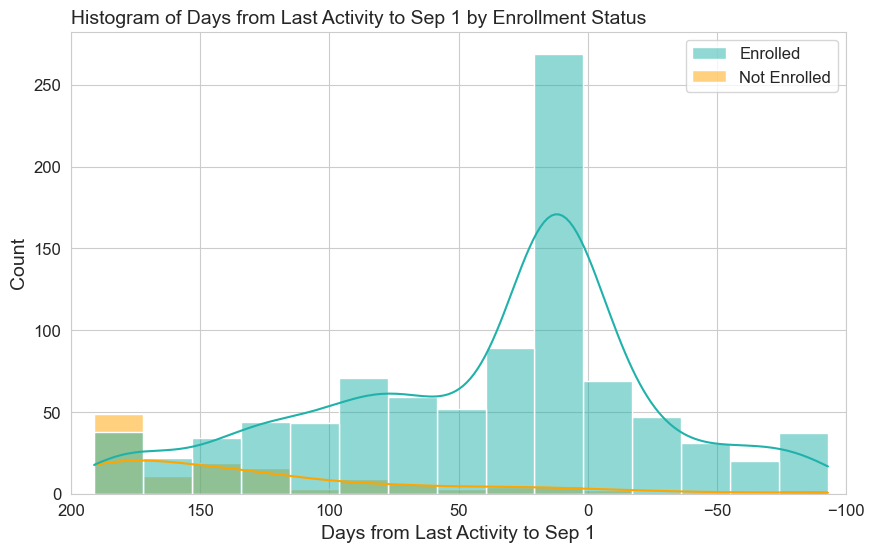

In [34]:
# Plot of histogram of 'days_from_last_activity_to_sep_1' by 'enrolled'
plt.figure(figsize=(10, 6))
hist = sns.histplot(data=df, x='days_from_last_activity_to_sep_1', hue='enrolled', kde=True, palette=custom_palette)
plt.title('Histogram of Days from Last Activity to Sep 1 by Enrollment Status')
plt.xlabel('Days from Last Activity to Sep 1')
plt.xlim(200, -100)
handles, labels = hist.get_legend().legendHandles, ['Enrolled', 'Not Enrolled']
plt.legend(handles=handles, labels=labels)
plt.show()

### Visuals showing 3 (or 4) dimensions and/or our directly related to our hypotheses

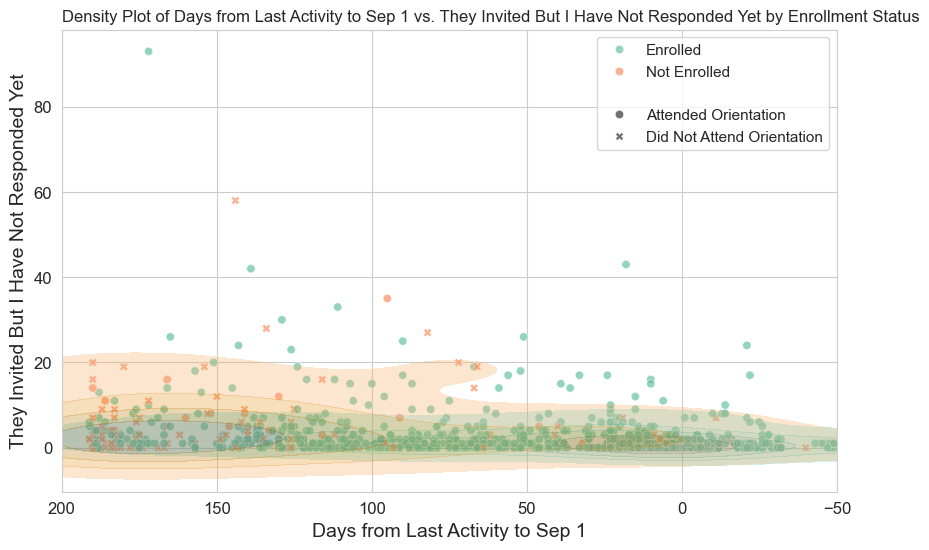

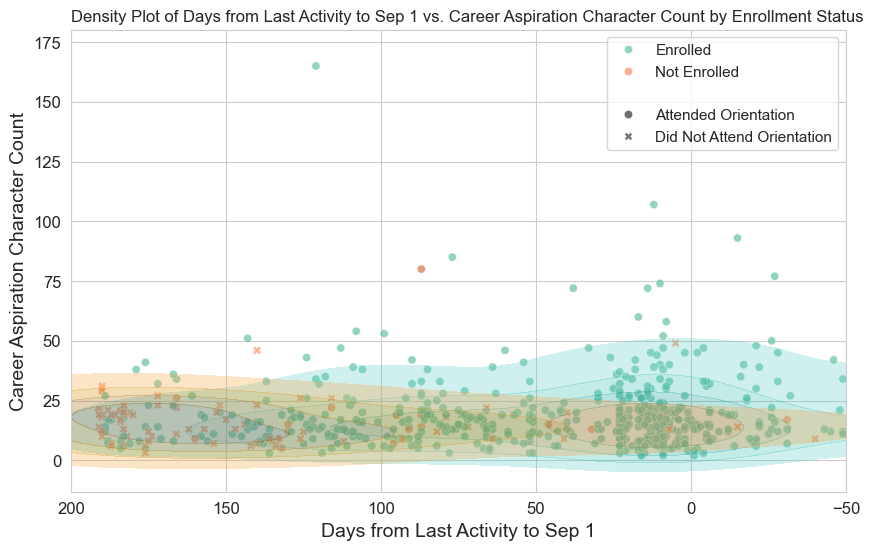

In [35]:
# Showing a negative association with one variable
plt.figure(figsize=(10, 6))
var = 'they_invited_but_i_have_not_responded_yet'
scatter = sns.scatterplot(data=df, x='days_from_last_activity_to_sep_1', y=var, hue='enrolled', alpha=0.7, style='orientation_attendance')
sns.kdeplot(data=df[df['enrolled'] == 'Y'], x='days_from_last_activity_to_sep_1', y=var, 
            fill=True, levels=5, color='lightseagreen', thresh=0.1, alpha=0.3, linestyles='-', label='Enrolled')
sns.kdeplot(data=df[df['enrolled'] == 'N'], x='days_from_last_activity_to_sep_1', y=var, 
            fill=True, levels=5, color='orange', thresh=0.1, alpha=0.3, linestyles='-', label='Not Enrolled')
plt.title(f'Density Plot of Days from Last Activity to Sep 1 vs. {var} by Enrollment Status')
plt.title(f'Density Plot of Days from Last Activity to Sep 1 vs. {var.replace("_", " ").title()} by Enrollment Status', size=12)
plt.xlim(200, -50)
plt.xlabel('Days from Last Activity to Sep 1')
plt.ylabel(var)
plt.ylabel(var.replace("_", " ").title())
handles, labels = scatter.get_legend_handles_labels()
new_labels = ['Enrolled', 'Not Enrolled', '', 'Attended Orientation', 'Did Not Attend Orientation']
plt.legend(handles=handles[1:], labels=new_labels, loc='upper right', fontsize=11)
plt.show()

# Showing a positive association with another variable
plt.figure(figsize=(10, 6))
var = 'career_aspiration_character_count'
scatter = sns.scatterplot(data=df, x='days_from_last_activity_to_sep_1', y=var, hue='enrolled', alpha=0.7, style='orientation_attendance')
sns.kdeplot(data=df[df['enrolled'] == 'Y'], x='days_from_last_activity_to_sep_1', y=var, 
            fill=True, levels=5, color='lightseagreen', thresh=0.1, alpha=0.3, linestyles='-', label='Enrolled')
sns.kdeplot(data=df[df['enrolled'] == 'N'], x='days_from_last_activity_to_sep_1', y=var, 
            fill=True, levels=5, color='orange', thresh=0.1, alpha=0.3, linestyles='-', label='Not Enrolled')
plt.title(f'Density Plot of Days from Last Activity to Sep 1 vs. {var} by Enrollment Status')
plt.title(f'Density Plot of Days from Last Activity to Sep 1 vs. {var.replace("_", " ").title()} by Enrollment Status', size=12)
plt.xlim(200, -50)
plt.xlabel('Days from Last Activity to Sep 1')
plt.ylabel(var)
plt.ylabel(var.replace("_", " ").title())
handles, labels = scatter.get_legend_handles_labels()
new_labels = ['Enrolled', 'Not Enrolled', '', 'Attended Orientation', 'Did Not Attend Orientation']
plt.legend(handles=handles[1:], labels=new_labels, loc='upper right', fontsize=11)
plt.show()


<Figure size 1200x800 with 0 Axes>

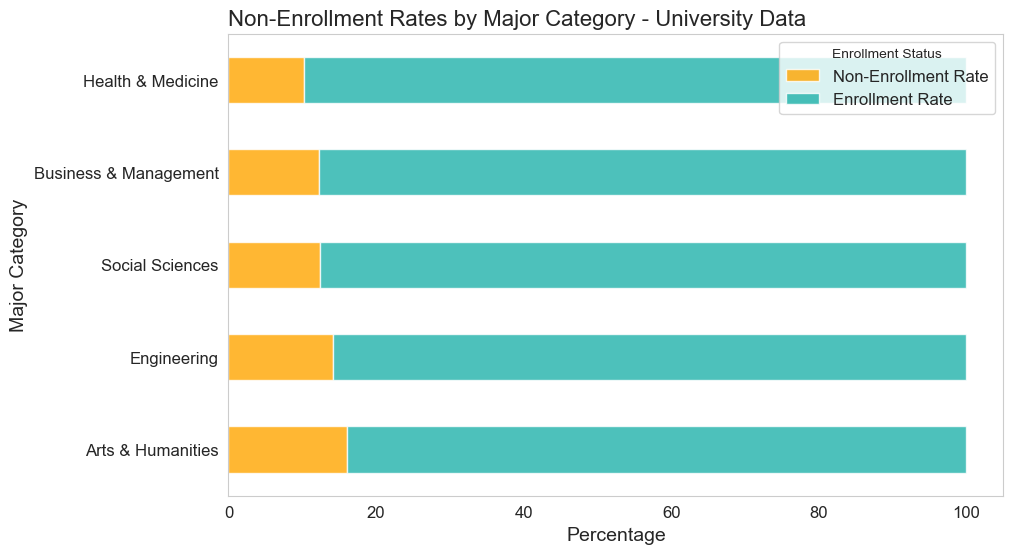

<Figure size 1200x800 with 0 Axes>

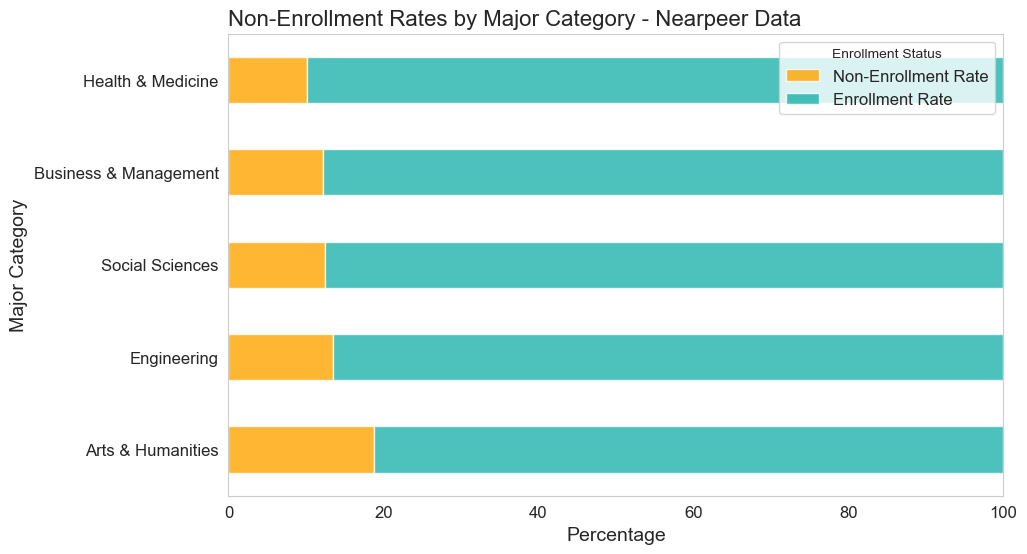

In [36]:
# To address the hypothesis about majors...


# Calculate enrollment rates by major for university data
enrollment_by_major = df.groupby(['major_category_x', 'enrolled']).size().unstack().fillna(0)
enrollment_by_major['Total'] = enrollment_by_major.sum(axis=1)
enrollment_by_major['Enrollment Rate'] = enrollment_by_major['Y'] / enrollment_by_major['Total'] * 100
enrollment_by_major['Non-Enrollment Rate'] = enrollment_by_major['N'] / enrollment_by_major['Total'] * 100

# Remove 'Other' category
enrollment_by_major = enrollment_by_major.drop('Other')

# Remove any other major categories with less than 150 students
enrollment_by_major = enrollment_by_major[enrollment_by_major['Total'] >= 100]

# Plot the data
plt.figure(figsize=(12, 8))
ax = enrollment_by_major[['Non-Enrollment Rate', 'Enrollment Rate']].sort_values(by='Non-Enrollment Rate', ascending=False).plot(kind='barh', stacked=True, color=['orange', 'lightseagreen'], alpha=0.8)
plt.title('Non-Enrollment Rates by Major Category - University Data', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Major Category', size=14)
plt.legend(title='Enrollment Status', loc='upper right')
plt.grid(False)
plt.show()

# Calculate enrollment rates by major for Nearpeer data
enrollment_by_major = df.groupby(['major_category_y', 'enrolled']).size().unstack().fillna(0)
enrollment_by_major['Total'] = enrollment_by_major.sum(axis=1)
enrollment_by_major['Enrollment Rate'] = enrollment_by_major['Y'] / enrollment_by_major['Total'] * 100
enrollment_by_major['Non-Enrollment Rate'] = enrollment_by_major['N'] / enrollment_by_major['Total'] * 100

# Remove 'Other' category
enrollment_by_major = enrollment_by_major.drop('Other')

# Remove any other major categories with less than 100 students
enrollment_by_major = enrollment_by_major[enrollment_by_major['Total'] >= 100]

# Plot the data
plt.figure(figsize=(12, 8))
ax = enrollment_by_major[['Non-Enrollment Rate', 'Enrollment Rate']].sort_values(by='Non-Enrollment Rate', ascending=False).plot(kind='barh', stacked=True, color=['orange', 'lightseagreen'], alpha=0.8)

plt.title('Non-Enrollment Rates by Major Category - Nearpeer Data', size=16)
plt.xlim(0, 100)
plt.xlabel('Percentage', size=14)
plt.ylabel('Major Category', size=14)
plt.legend(title='Enrollment Status', loc='upper right')
plt.grid(False)
plt.show()


C:\Users\dyork\AppData\Local\Temp\ipykernel_46052\883149815.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='Proportion', y='Status_and_Connection', palette=['lightseagreen', 'darkcyan', 'orange', 'salmon'], alpha=0.8)


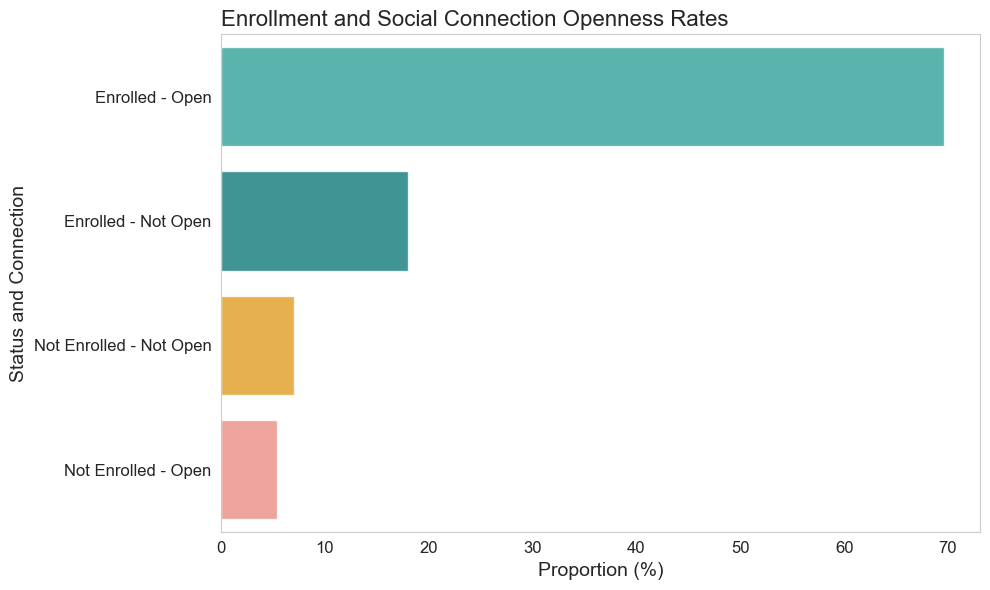

In [37]:
# Create a combined column for enrollment status and social connection openness
df['Status_and_Connection'] = df.apply(lambda x: f"{'Enrolled' if x['enrolled'] == 'Y' else 'Not Enrolled'} - {'Open' if x['open_to_social_connections'] == 'Yes' else 'Not Open'}", axis=1)

# Calculate proportions of each combination of enrollment status and social connection openness
plot_data = df['Status_and_Connection'].value_counts(normalize=True).reset_index()
plot_data.columns = ['Status_and_Connection', 'Proportion']
plot_data['Proportion'] *= 100  # Convert to percentage

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Proportion', y='Status_and_Connection', palette=['lightseagreen', 'darkcyan', 'orange', 'salmon'], alpha=0.8)

# Customize the plot
plt.title('Enrollment and Social Connection Openness Rates', size=16)
plt.xlabel('Proportion (%)', size=14)
plt.ylabel('Status and Connection', size=14)
plt.grid(False)
plt.tight_layout()
plt.show()


## Text mining
Goal: to find the top 'interests' of students who enrolled in the program as well as those who did not.

c:\Users\dyork\AppData\Local\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\dyork\AppData\Local\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\dyork\AppData\Local\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


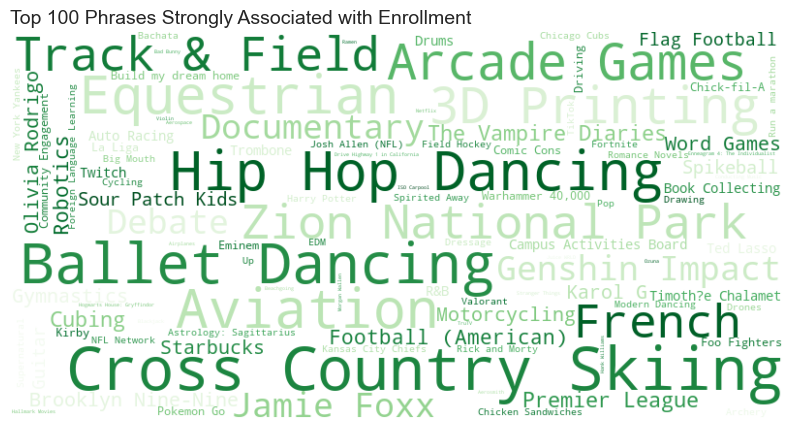

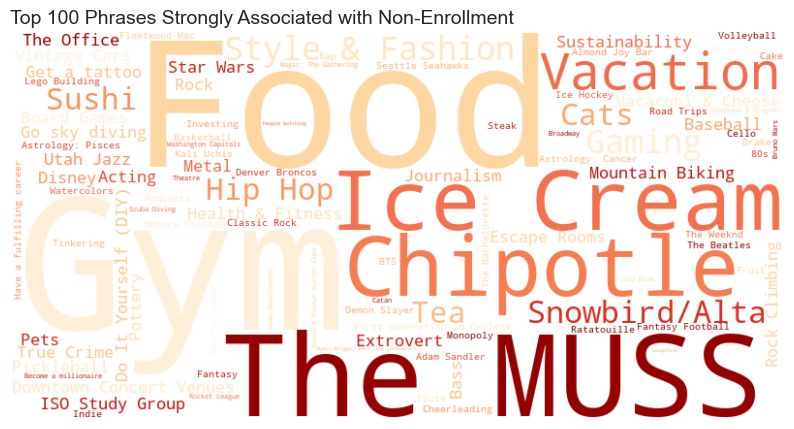

C:\Users\dyork\AppData\Local\Temp\ipykernel_46052\2416936507.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='phrase', x='association_with_non_enrollment', data=top_phrases_non_enrollment, palette='Oranges_r')


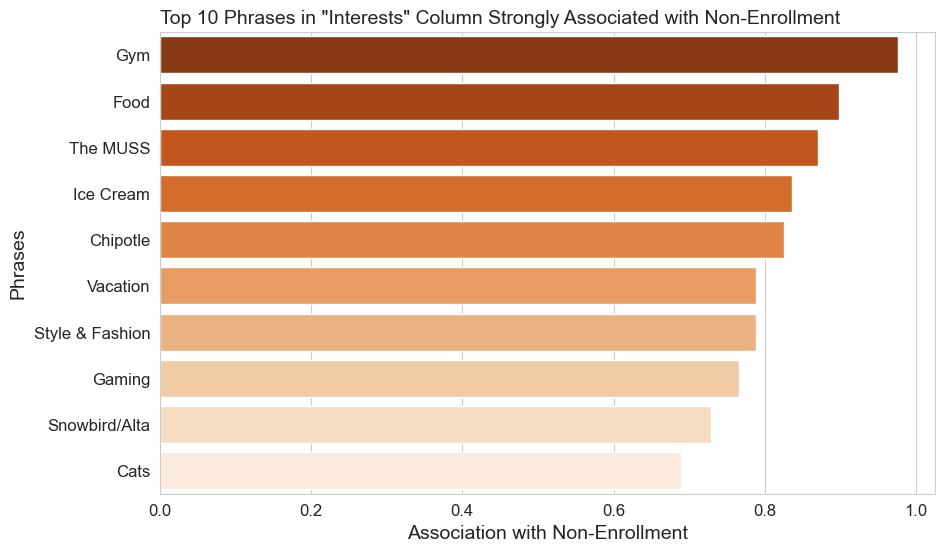

C:\Users\dyork\AppData\Local\Temp\ipykernel_46052\2416936507.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='phrase', x='association_with_non_enrollment', data=top_phrases_enrollment, palette='Greens_r')


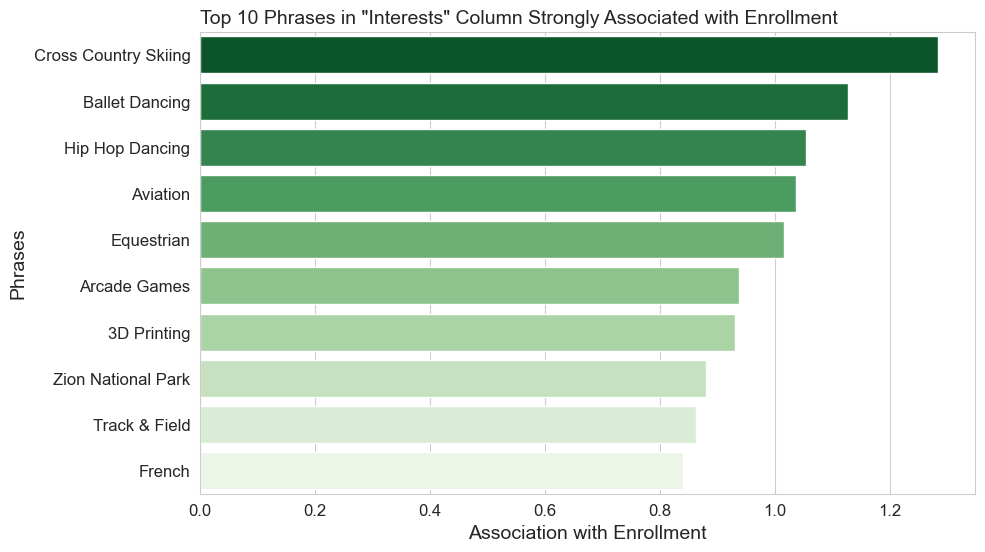

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Pre-process interests to treat comma-separated values as single tokens
df['interests_processed'] = df['interests'].apply(lambda x: x.split(', '))

# Combine interests and create target variable
interests = df['interests_processed']
target = (df['enrolled'] == 'Y').astype(int)

# Vectorize the interests
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(interests)

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, target)

# Get the words and their corresponding coefficients
words = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create a DataFrame to display words and their association with non-enrollment
word_assoc_df = pd.DataFrame({'phrase': words, 'association_with_non_enrollment': coefficients})
word_assoc_df = word_assoc_df.sort_values(by='association_with_non_enrollment', ascending=False)

# Extract the top 100 phrases most strongly associated with non-enrollment and enrollment
top_100_phrases_non_enrollment = word_assoc_df.head(100)
top_100_phrases_enrollment = word_assoc_df.tail(100).sort_values(by='association_with_non_enrollment', ascending=True)

# Reverse the order of top 100 phrases associated with enrollment and reindex
top_100_phrases_enrollment = top_100_phrases_enrollment.iloc[::-1].reset_index(drop=True)

# Use these top 100 phrases for the word clouds
phrases_dict_enrollment = dict(zip(top_100_phrases_enrollment['phrase'], top_100_phrases_enrollment['association_with_non_enrollment'].abs()))
phrases_dict_non_enrollment = dict(zip(top_100_phrases_non_enrollment['phrase'], top_100_phrases_non_enrollment['association_with_non_enrollment']))

# Generate the word clouds
wordcloud_enrollment = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(phrases_dict_enrollment)
wordcloud_non_enrollment = WordCloud(width=800, height=400, background_color='white', colormap='OrRd').generate_from_frequencies(phrases_dict_non_enrollment)

# Plot the word clouds
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_enrollment, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Phrases Strongly Associated with Enrollment')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_non_enrollment, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Phrases Strongly Associated with Non-Enrollment')
plt.show()

# Extract the top 10 phrases for the bar plots
top_phrases_non_enrollment = top_100_phrases_non_enrollment.head(10)
top_phrases_enrollment = top_100_phrases_enrollment.tail(10).sort_values(by='association_with_non_enrollment', ascending=True)

# Plot top 10 phrases most strongly associated with non-enrollment
plt.figure(figsize=(10, 6))
sns.barplot(y='phrase', x='association_with_non_enrollment', data=top_phrases_non_enrollment, palette='Oranges_r')
plt.title('Top 10 Phrases in "Interests" Column Strongly Associated with Non-Enrollment')
plt.ylabel('Phrases')
plt.xlabel('Association with Non-Enrollment')
plt.show()

# Plot top 10 phrases most strongly associated with enrollment (using absolute values)
top_phrases_enrollment['association_with_non_enrollment'] = top_phrases_enrollment['association_with_non_enrollment'].abs()

plt.figure(figsize=(10, 6))
sns.barplot(y='phrase', x='association_with_non_enrollment', data=top_phrases_enrollment, palette='Greens_r')
plt.title('Top 10 Phrases in "Interests" Column Strongly Associated with Enrollment')
plt.ylabel('Phrases')
plt.xlabel('Association with Enrollment')
plt.show()


## Modeling
### Data pre-processing 

In [39]:
# Split the data into test and train sets
from sklearn.model_selection import train_test_split

# Drop the 'enrolled' column
X = df.drop('enrolled', axis=1)
y = df['enrolled']

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Check the shape of the train and test sets
print(f'With a test size of {test_size}:\n')
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is: {y_test.shape}')

With a test size of 0.2:

The shape of X_train is: (844, 67)
The shape of X_test is: (212, 67)
The shape of y_train is: (844,)
The shape of y_test is: (212,)


In [40]:
# Assess missing values in the training set
missing_values = X_train.isnull().mean() * 100
missing_values.sort_values(ascending=False, inplace=True)
for column_name, percentage in missing_values.items():
    print(f'{column_name}: {percentage:0.4}%')

bio_[deleted_for_privacy]: 100.0%
first_invitation_date: 99.53%
invitations: 99.53%
groups_posted_to: 86.26%
passions: 73.46%
chats_total: 55.21%
chats_received: 55.21%
chats_sent: 55.21%
last_group_message: 49.17%
hispanic_ethnicity: 44.67%
career_aspiration_character_count: 37.8%
profile_completed_date: 27.49%
groups: 27.13%
last_invitation_date: 15.17%
graduating_class: 14.45%
digest_interval: 5.924%
sessions: 5.569%
days_from_deposit_to_sep_1: 5.569%
deposit_date: 5.569%
total_friends: 0.0%
last_activity_date: 0.0%
visibility_in_groups_classes: 0.0%
roux_class_record_id: 0.0%
they_invited_and_i_accepted: 0.0%
i_invited_and_they_accepted: 0.0%
i_invited_but_they_have_not_responded_yet: 0.0%
i_ignored_or_disconnected_from_them: 0.0%
gender: 0.0%
they_invited_but_i_have_not_responded_yet: 0.0%
they_disconnected_from_me: 0.0%
days_from_last_activity_to_sep_1: 0.0%
major_category_x: 0.0%
major_category_y: 0.0%
major_categories_match: 0.0%
Status_and_Connection: 0.0%
sms_alerts_enabled: 

In [41]:
# Drop columns with more than 70% missing values
columns_to_drop = missing_values[missing_values > 70].index
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Assess missing values in the training set
missing_values = X_train.isnull().mean() * 100
missing_values.sort_values(ascending=False, inplace=True)
for column_name, percentage in missing_values.items():
    print(f'{column_name}: {percentage:0.4}%')

chats_total: 55.21%
chats_sent: 55.21%
chats_received: 55.21%
last_group_message: 49.17%
hispanic_ethnicity: 44.67%
career_aspiration_character_count: 37.8%
profile_completed_date: 27.49%
groups: 27.13%
last_invitation_date: 15.17%
graduating_class: 14.45%
digest_interval: 5.924%
days_from_deposit_to_sep_1: 5.569%
sessions: 5.569%
deposit_date: 5.569%
total_friends: 0.0%
visibility_in_groups_classes: 0.0%
last_activity_date: 0.0%
sms_alerts_enabled: 0.0%
gender: 0.0%
roux_class_record_id: 0.0%
they_invited_but_i_have_not_responded_yet: 0.0%
i_invited_and_they_accepted: 0.0%
i_invited_but_they_have_not_responded_yet: 0.0%
i_ignored_or_disconnected_from_them: 0.0%
they_invited_and_i_accepted: 0.0%
open_to_social_connections: 0.0%
they_disconnected_from_me: 0.0%
days_from_last_activity_to_sep_1: 0.0%
major_category_x: 0.0%
major_category_y: 0.0%
major_categories_match: 0.0%
Status_and_Connection: 0.0%
full_time_part_time: 0.0%
parent: 0.0%
online_student: 0.0%
admitted: 0.0%
committed: 0.

#### Dropping columns

In [42]:
# Drop columns because the are not useful for the model and they have many missing values
X_train = X_train.drop(columns=['groups', 'graduating_class', 'roux_class_record_id', 'interests', 'incoming_class', 'committed', 'college', 'interests_processed'])
X_test = X_test.drop(columns=['groups', 'graduating_class', 'roux_class_record_id', 'interests', 'incoming_class', 'committed', 'college', 'interests_processed'])

# Drop 'orientation_attendance' because it explains MOST of the variance in the target variable
# X_train = X_train.drop(columns='orientation_attendance')
# X_test = X_test.drop(columns='orientation_attendance')

# Drop profile_completed_date and last_invitation_date because there are too many missing values
X_train = X_train.drop(columns=['profile_completed_date', 'last_invitation_date'])
X_test = X_test.drop(columns=['profile_completed_date', 'last_invitation_date'])

# Drop 'last_group_message' because there are too many missing values
X_train = X_train.drop(columns='last_group_message')
X_test = X_test.drop(columns='last_group_message')

# Drop 'hispanic_ethnicity' because there are too many missing values
X_train = X_train.drop(columns='hispanic_ethnicity')
X_test = X_test.drop(columns='hispanic_ethnicity')

# Drop 'deposit_date' because it has been replaced by 'days_from_deposit_to_sep_1'
X_train = X_train.drop(columns='deposit_date')
X_test = X_test.drop(columns='deposit_date')

# Drop 'last_activity_date' because we don't know when the data was pulled
X_train = X_train.drop(columns='last_activity_date')
X_test = X_test.drop(columns='last_activity_date')

# Drop 'country' because new values appeared in the test data that were not present in the train data
X_train = X_train.drop(columns='country')
X_test = X_test.drop(columns='country')

#### Imputing columns

In [43]:
# Fill missing values in chats_total, chats_received and chats_sent with 0
X_train['chats_total'] = X_train['chats_total'].fillna(0)
X_train['chats_received'] = X_train['chats_received'].fillna(0)
X_train['chats_sent'] = X_train['chats_sent'].fillna(0)
X_test['chats_total'] = X_test['chats_total'].fillna(0)
X_test['chats_received'] = X_test['chats_received'].fillna(0)
X_test['chats_sent'] = X_test['chats_sent'].fillna(0)

# Fill missing values in 'bio_character_count' with 0
X_train['bio_character_count'] = X_train['bio_character_count'].fillna(0)
X_test['bio_character_count'] = X_test['bio_character_count'].fillna(0)

# Fill missing values in 'sessions' with 0
X_train['sessions'] = X_train['sessions'].fillna(0)
X_test['sessions'] = X_test['sessions'].fillna(0)

# Fill missing values in 'career_aspiration_character_count' with 0
X_train['career_aspiration_character_count'] = X_train['career_aspiration_character_count'].fillna(0)
X_test['career_aspiration_character_count'] = X_test['career_aspiration_character_count'].fillna(0)

# Fill missing values in 'days_from_deposit_to_sep_1' with the median
X_train['days_from_deposit_to_sep_1'] = X_train['days_from_deposit_to_sep_1'].fillna(X_train['days_from_deposit_to_sep_1'].median())
X_test['days_from_deposit_to_sep_1'] = X_test['days_from_deposit_to_sep_1'].fillna(X_train['days_from_deposit_to_sep_1'].median())

# Fill in missing values in 'digest_interval' with the mode
X_train['digest_interval'] = X_train['digest_interval'].fillna(X_train['digest_interval'].mode()[0])
X_test['digest_interval'] = X_test['digest_interval'].fillna(X_train['digest_interval'].mode()[0])

In [44]:
# Assess missing values in the training set
missing_values = X_train.isnull().mean() * 100
missing_values.sort_values(ascending=False, inplace=True)
for column_name, percentage in missing_values.items():
    print(f'{column_name}: {percentage:0.4}%')

admitted: 0.0%
they_disconnected_from_me: 0.0%
sms_alerts_enabled: 0.0%
visibility_in_groups_classes: 0.0%
digest_interval: 0.0%
total_friends: 0.0%
i_invited_and_they_accepted: 0.0%
i_invited_but_they_have_not_responded_yet: 0.0%
i_ignored_or_disconnected_from_them: 0.0%
they_invited_and_i_accepted: 0.0%
they_invited_but_i_have_not_responded_yet: 0.0%
chats_sent: 0.0%
full_time_part_time: 0.0%
chats_received: 0.0%
chats_total: 0.0%
sessions: 0.0%
days_from_deposit_to_sep_1: 0.0%
days_from_last_activity_to_sep_1: 0.0%
major_category_x: 0.0%
major_category_y: 0.0%
major_categories_match: 0.0%
career_aspiration_character_count: 0.0%
gender: 0.0%
open_to_social_connections: 0.0%
most_recent_status: 0.0%
verified_email: 0.0%
nearpeer_user_x: 0.0%
user_id: 0.0%
application_student_type: 0.0%
orientation_attendance: 0.0%
race: 0.0%
residency: 0.0%
nearpeer_user_y: 0.0%
badge: 0.0%
enabled: 0.0%
profile_created: 0.0%
online_student: 0.0%
age: 0.0%
bio_character_count: 0.0%
interests_count: 0.

In [45]:
for col in X_train.columns:
    if any(isinstance(i, list) for i in X_train[col]):
        print(f"Column {col} contains lists or unhashable types.")

In [46]:
# Drop columns with only one unique value
columns_to_drop = X_train.columns[X_train.nunique() == 1]
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# The shape of the training and test sets
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is: {X_test.shape}\n')

# Assess missing values in the training set
missing_values = X_train.isnull().mean() * 100
missing_values.sort_values(ascending=False, inplace=True)
for column_name, percentage in missing_values.items():
    print(f'{column_name}: {percentage:0.4}%')

The shape of X_train is: (844, 39)
The shape of X_test is: (212, 39)

most_recent_status: 0.0%
chats_received: 0.0%
i_invited_and_they_accepted: 0.0%
i_invited_but_they_have_not_responded_yet: 0.0%
i_ignored_or_disconnected_from_them: 0.0%
they_invited_and_i_accepted: 0.0%
they_invited_but_i_have_not_responded_yet: 0.0%
they_disconnected_from_me: 0.0%
chats_sent: 0.0%
chats_total: 0.0%
digest_interval: 0.0%
sessions: 0.0%
days_from_deposit_to_sep_1: 0.0%
days_from_last_activity_to_sep_1: 0.0%
major_category_x: 0.0%
major_category_y: 0.0%
major_categories_match: 0.0%
career_aspiration_character_count: 0.0%
total_friends: 0.0%
visibility_in_groups_classes: 0.0%
user_id: 0.0%
groups_count: 0.0%
application_student_type: 0.0%
orientation_attendance: 0.0%
race: 0.0%
residency: 0.0%
age: 0.0%
bio_character_count: 0.0%
interests_count: 0.0%
number_of_peers: 0.0%
sms_alerts_enabled: 0.0%
lives_on_campus: 0.0%
transfer_student: 0.0%
veteran: 0.0%
parent: 0.0%
open_to_social_connections: 0.0%
fu

In [47]:
# Find all columns with binary values
binary_columns = [col for col in X_train.columns if X_train[col].nunique() == 2]
binary_columns

['most_recent_status',
 'orientation_attendance',
 'residency',
 'lives_on_campus',
 'transfer_student',
 'veteran',
 'parent',
 'open_to_social_connections',
 'full_time_part_time',
 'sms_alerts_enabled',
 'digest_interval',
 'major_categories_match']

In [48]:
# Find all non-binary categorical columns
non_binary_categorical_columns = [col for col in X_train.select_dtypes(include='object').columns if col not in binary_columns]
non_binary_categorical_columns

['application_student_type',
 'race',
 'gender',
 'visibility_in_groups_classes',
 'major_category_x',
 'major_category_y',
 'Status_and_Connection']

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for binary categorical features
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.where(X == 'Y', 1, 0)

# Define binary and non-binary categorical features
binary_features = [
    'most_recent_status',
    'orientation_attendance',
    'residency',
    'lives_on_campus',
    'transfer_student',
    'veteran',
    'parent',
    'open_to_social_connections',
    'full_time_part_time',
    'sms_alerts_enabled',
    'digest_interval',
    'major_categories_match'
]

non_binary_features = [
    'application_student_type',
    'race',
    'gender',
    'visibility_in_groups_classes',
    'major_category_x',
    'major_category_y'
]

# Define numerical features
numerical_features = [
    'age',
    'bio_character_count',
    'interests_count',
    'groups_count',
    'number_of_peers',
    'total_friends',
    'i_invited_and_they_accepted',
    'i_invited_but_they_have_not_responded_yet',
    'i_ignored_or_disconnected_from_them',
    'they_invited_and_i_accepted',
    'they_invited_but_i_have_not_responded_yet',
    'they_disconnected_from_me',
    'chats_sent',
    'chats_received',
    'chats_total',
    'sessions',
    'days_from_deposit_to_sep_1',
    'days_from_last_activity_to_sep_1',
    'career_aspiration_character_count'
]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('bin', BinaryEncoder(), binary_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_binary_features)
    ])

# Full preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform training data
X_train_processed = pipeline.fit_transform(X_train)

# Transform test data
X_test_processed = pipeline.transform(X_test)

# Get the names of the columns after encoding
binary_feature_names = binary_features
non_binary_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(non_binary_features)
all_feature_names = numerical_features + binary_feature_names + non_binary_feature_names.tolist()

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Logistic Regression
For predicting enrollment and for feature selection.
Logistic regression is a type of regression analysis used for predicting the outcome of a categorical dependent variable based on one or more predictor variables. It is used to model the probability of a certain class or event existing (enrolled or not enrolled). To address potential overfitting to the training data, we will use L1 regularization (Lasso) to select the most important features after first creating a baseline logistic regression model.

c:\Users\dyork\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Baseline Logistic Regression Performance:
Accuracy: 0.9575471698113207
Precision: 0.9728260869565217
Recall: 0.9781420765027322
F1 Score: 0.9754768392370572
ROC-AUC: 0.9247220651969097
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.97      0.98      0.98       183

    accuracy                           0.96       212
   macro avg       0.91      0.90      0.91       212
weighted avg       0.96      0.96      0.96       212

Baseline Logistic Regression Model Summary

Intercept: -1.4191000023851768
Accuracy: 0.9575471698113207
Precision: 0.9728260869565217
Recall: 0.9781420765027322
F1 Score: 0.9754768392370572
ROC-AUC: 0.9247220651969097
Coefficients:
orientation_attendance: 56.34350386486761
application_student_type_Freshman International: 33.80614614139808
gender_Other: 23.34126801144279
race_Native Hawaiian or Other Pacific Islander: 19.26622233626862
application_student_type_Transfer: -17.9775471153

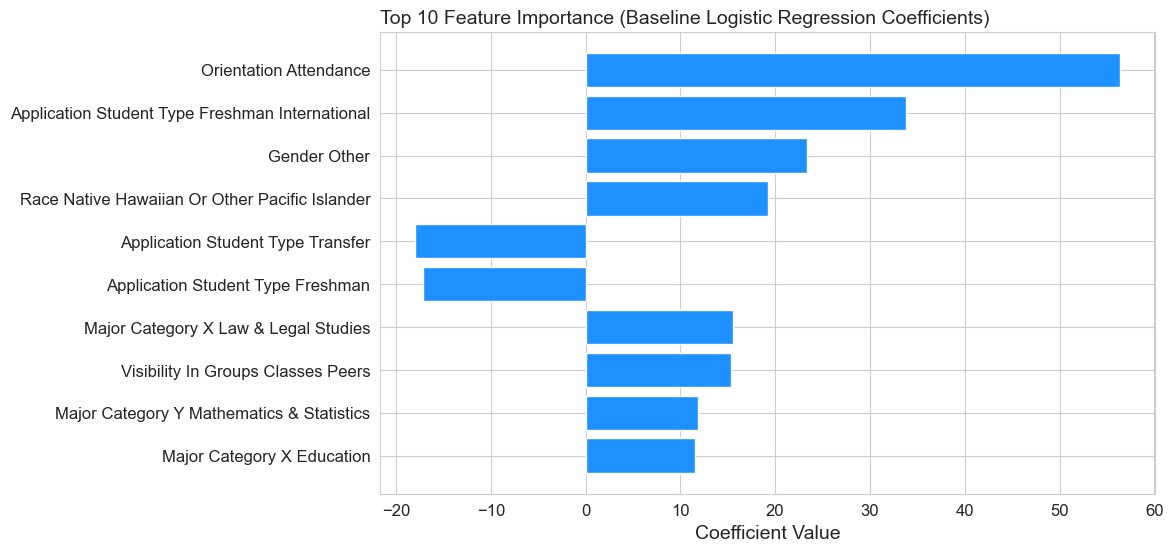

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the baseline logistic regression model
baseline_log_reg = LogisticRegression(penalty='none', max_iter=1000)
baseline_log_reg.fit(X_train_processed, y_train_encoded)

# Make predictions with the baseline logistic regression model
y_pred_baseline = baseline_log_reg.predict(X_test_processed)
y_pred_proba_baseline = baseline_log_reg.predict_proba(X_test_processed)[:, 1]

# Evaluate the baseline logistic regression model
baseline_accuracy = accuracy_score(y_test_encoded, y_pred_baseline)
baseline_precision = precision_score(y_test_encoded, y_pred_baseline)
baseline_recall = recall_score(y_test_encoded, y_pred_baseline)
baseline_f1 = f1_score(y_test_encoded, y_pred_baseline)
baseline_roc_auc = roc_auc_score(y_test_encoded, y_pred_proba_baseline)

print("Baseline Logistic Regression Performance:")
print(f"Accuracy: {baseline_accuracy}")
print(f"Precision: {baseline_precision}")
print(f"Recall: {baseline_recall}")
print(f"F1 Score: {baseline_f1}")
print(f"ROC-AUC: {baseline_roc_auc}")
print(classification_report(y_test_encoded, y_pred_baseline))

# Print the model summary
baseline_coefficients = baseline_log_reg.coef_[0]

def print_baseline_log_reg_summary(model, feature_names, coefficients):
    print(f'Intercept: {model.intercept_[0]}')
    print(f'Accuracy: {baseline_accuracy}')
    print(f'Precision: {baseline_precision}')
    print(f'Recall: {baseline_recall}')
    print(f'F1 Score: {baseline_f1}')
    print(f'ROC-AUC: {baseline_roc_auc}')
    coefficients_sorted = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)
    print('Coefficients:')
    for coef, feature in coefficients_sorted:
        print(f'{feature}: {coef}')

print('Baseline Logistic Regression Model Summary\n')
print_baseline_log_reg_summary(baseline_log_reg, all_feature_names, baseline_coefficients)

# Plotting feature importance for Baseline Logistic Regression (Top 10 features)
top_10_baseline_features = sorted(zip(baseline_coefficients, all_feature_names), key=lambda x: abs(x[0]), reverse=True)[:10]
plt.figure(figsize=(10, 6))
plt.barh([x[1] for x in top_10_baseline_features], [x[0] for x in top_10_baseline_features], color='dodgerblue')
plt.xlabel('Coefficient Value')
plt.yticks([x[1] for x in top_10_baseline_features], [x[1].replace('_', ' ').title() for x in top_10_baseline_features])
plt.title('Top 10 Feature Importance (Baseline Logistic Regression Coefficients)')
plt.gca().invert_yaxis()
plt.show()


#### L1 regularization (Lasso)


L1-Regularized Logistic Regression Performance:
Accuracy: 0.9716981132075472
Precision: 0.9732620320855615
Recall: 0.994535519125683
F1 Score: 0.9837837837837837
ROC-AUC: 0.9576031656302997
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.97      0.99      0.98       183

    accuracy                           0.97       212
   macro avg       0.97      0.91      0.94       212
weighted avg       0.97      0.97      0.97       212

Logistic Regression Model Summary

Intercept: -1.4657485250179951
Accuracy: 0.9716981132075472
Precision: 0.9732620320855615
Recall: 0.994535519125683
F1 Score: 0.9837837837837837
ROC-AUC: 0.9576031656302997
Number of Non-Zero Coefficients: 27
Coefficients:
orientation_attendance: 6.6879872842838175
application_student_type_Freshman International: 1.8596088252843446
race_American Indian or Alaska Native: -1.4749903012043164
major_category_y_Arts & Humanities: -1.203480789307385


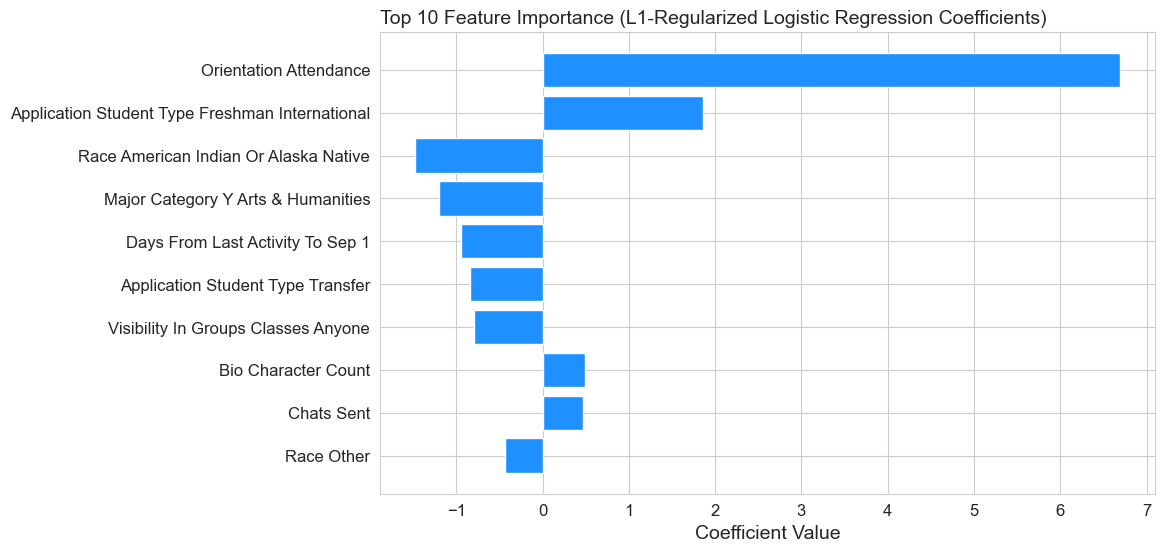

In [51]:
# Create and train L1-regularized logistic regression model
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
log_reg_l1.fit(X_train_processed, y_train_encoded)

# Make predictions with L1-regularized model
y_pred_l1 = log_reg_l1.predict(X_test_processed)
y_pred_proba_l1 = log_reg_l1.predict_proba(X_test_processed)[:, 1]

# Evaluate the L1-regularized model
l1_accuracy = accuracy_score(y_test_encoded, y_pred_l1)
l1_precision = precision_score(y_test_encoded, y_pred_l1)
l1_recall = recall_score(y_test_encoded, y_pred_l1)
l1_f1 = f1_score(y_test_encoded, y_pred_l1)
l1_roc_auc = roc_auc_score(y_test_encoded, y_pred_proba_l1)

print("L1-Regularized Logistic Regression Performance:")
print(f"Accuracy: {l1_accuracy}")
print(f"Precision: {l1_precision}")
print(f"Recall: {l1_recall}")
print(f"F1 Score: {l1_f1}")
print(f"ROC-AUC: {l1_roc_auc}")
print(classification_report(y_test_encoded, y_pred_l1))

# Print the model summary
coefficients = log_reg_l1.coef_[0]
non_zero_coefficients = sum(coefficients != 0)

def print_log_reg_summary(model, feature_names, coefficients):
    print(f'Intercept: {model.intercept_[0]}')
    print(f'Accuracy: {l1_accuracy}')
    print(f'Precision: {l1_precision}')
    print(f'Recall: {l1_recall}')
    print(f'F1 Score: {l1_f1}')
    print(f'ROC-AUC: {l1_roc_auc}')
    print(f'Number of Non-Zero Coefficients: {non_zero_coefficients}')
    coefficients_sorted = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)
    print('Coefficients:')
    for coef, feature in coefficients_sorted:
        print(f'{feature}: {coef}')

print('Logistic Regression Model Summary\n')
print_log_reg_summary(log_reg_l1, all_feature_names, coefficients)

# Plotting feature importance for L1-Regularized Logistic Regression (Top 10 features)
top_10_features = sorted(zip(coefficients, all_feature_names), key=lambda x: abs(x[0]), reverse=True)[:10]
plt.figure(figsize=(10, 6))
plt.barh([x[1] for x in top_10_features], [x[0] for x in top_10_features], color='dodgerblue')
plt.xlabel('Coefficient Value')
plt.yticks([x[1] for x in top_10_features], [x[1].replace('_', ' ').title() for x in top_10_features])
plt.title('Top 10 Feature Importance (L1-Regularized Logistic Regression Coefficients)')
plt.gca().invert_yaxis()
plt.show()


### Random Forest Classification Model
For predicting enrollment. Features include all columns in the test set except for the target variable. The goal 

Random Forest Performance:
Accuracy: 0.9764150943396226
Precision: 0.973404255319149
Recall: 1.0
F1 Score: 0.986522911051213
ROC-AUC: 0.9700395703787451
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.97      1.00      0.99       183

    accuracy                           0.98       212
   macro avg       0.99      0.91      0.95       212
weighted avg       0.98      0.98      0.98       212

Random Forest Model Summary

Accuracy: 0.9764150943396226
Precision: 0.973404255319149
Recall: 1.0
F1 Score: 0.986522911051213
ROC-AUC: 0.9700395703787451
Feature Importances:
orientation_attendance: 0.3828938612231599
days_from_last_activity_to_sep_1: 0.12834274174527738
days_from_deposit_to_sep_1: 0.06406586165313
they_invited_but_i_have_not_responded_yet: 0.03792574895342409
interests_count: 0.03262306115029266
sessions: 0.02860620329049727
career_aspiration_character_count: 0.022555712391213133
age: 0.021039988

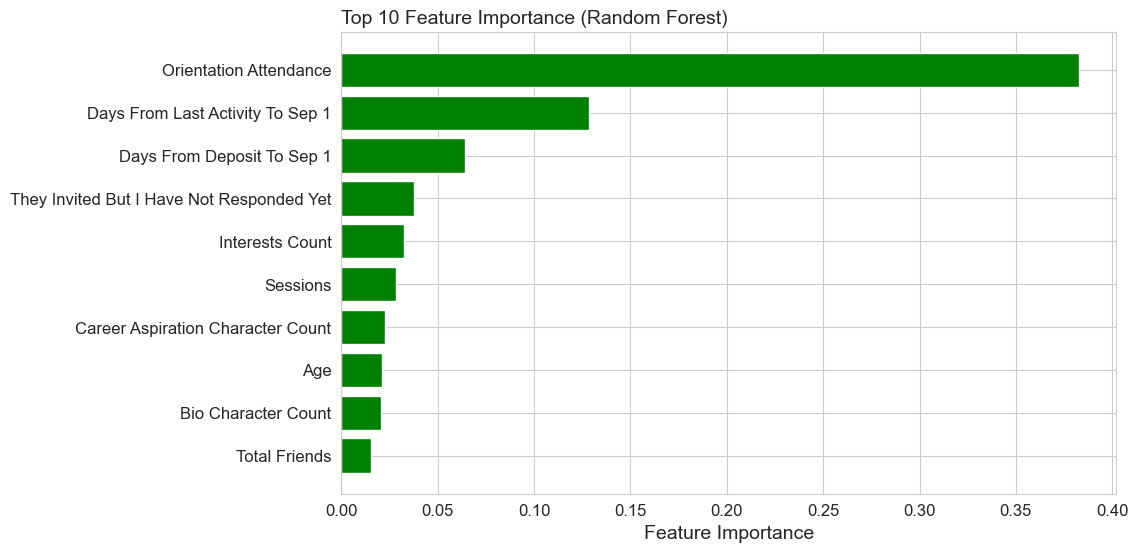

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train_encoded)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test_processed)
y_pred_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test_encoded, y_pred_rf)
rf_precision = precision_score(y_test_encoded, y_pred_rf)
rf_recall = recall_score(y_test_encoded, y_pred_rf)
rf_f1 = f1_score(y_test_encoded, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test_encoded, y_pred_proba_rf)

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"ROC-AUC: {rf_roc_auc}")
print(classification_report(y_test_encoded, y_pred_rf))

# Print the model summary
feature_importances = rf_model.feature_importances_

def print_rf_summary(model, feature_names, importances):
    print(f'Accuracy: {rf_accuracy}')
    print(f'Precision: {rf_precision}')
    print(f'Recall: {rf_recall}')
    print(f'F1 Score: {rf_f1}')
    print(f'ROC-AUC: {rf_roc_auc}')
    importances_sorted = sorted(zip(importances, feature_names), key=lambda x: abs(x[0]), reverse=True)
    print('Feature Importances:')
    for importance, feature in importances_sorted[:10]:  # Top 10 features
        print(f'{feature}: {importance}')

print('Random Forest Model Summary\n')
print_rf_summary(rf_model, all_feature_names, feature_importances)

# Plotting feature importance for Random Forest (Top 10 features)
top_10_rf_features = sorted(zip(feature_importances, all_feature_names), key=lambda x: abs(x[0]), reverse=True)[:10]
plt.figure(figsize=(10, 6))
plt.barh([x[1] for x in top_10_rf_features], [x[0] for x in top_10_rf_features], color='g')
plt.xlabel('Feature Importance')
plt.yticks([x[1] for x in top_10_rf_features], [x[1].replace('_', ' ').title() for x in top_10_rf_features])
plt.title('Top 10 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


#### Comparing scaled data vs. unscaled data for Random Forest

In [53]:
# Create a pipeline for Random Forest without scaling
rf_model_no_scaling = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_no_scaling.fit(X_train_processed, y_train_encoded)

# Predictions and evaluation without scaling
y_pred_rf_no_scaling = rf_model_no_scaling.predict(X_test_processed)
y_pred_proba_rf_no_scaling = rf_model_no_scaling.predict_proba(X_test_processed)[:, 1]
print("Random Forest Performance without Scaling:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_rf_no_scaling)}")
print(f"Precision: {precision_score(y_test_encoded, y_pred_rf_no_scaling)}")
print(f"Recall: {recall_score(y_test_encoded, y_pred_rf_no_scaling)}")
print(f"F1 Score: {f1_score(y_test_encoded, y_pred_rf_no_scaling)}")
print(f"ROC-AUC: {roc_auc_score(y_test_encoded, y_pred_proba_rf_no_scaling)}")
print(classification_report(y_test_encoded, y_pred_rf_no_scaling))

# Create a pipeline for Random Forest with scaling
pipeline_rf_scaling = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline_rf_scaling.fit(X_train_processed, y_train_encoded)

# Predictions and evaluation with scaling
y_pred_rf_scaling = pipeline_rf_scaling.predict(X_test_processed)
y_pred_proba_rf_scaling = pipeline_rf_scaling.predict_proba(X_test_processed)[:, 1]
print("\nRandom Forest Performance with Scaling:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_rf_scaling)}")
print(f"Precision: {precision_score(y_test_encoded, y_pred_rf_scaling)}")
print(f"Recall: {recall_score(y_test_encoded, y_pred_rf_scaling)}")
print(f"F1 Score: {f1_score(y_test_encoded, y_pred_rf_scaling)}")
print(f"ROC-AUC: {roc_auc_score(y_test_encoded, y_pred_proba_rf_scaling)}")
print(classification_report(y_test_encoded, y_pred_rf_scaling))

# Results: exact same performance with and without scaling


Random Forest Performance without Scaling:
Accuracy: 0.9764150943396226
Precision: 0.973404255319149
Recall: 1.0
F1 Score: 0.986522911051213
ROC-AUC: 0.9700395703787451
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.97      1.00      0.99       183

    accuracy                           0.98       212
   macro avg       0.99      0.91      0.95       212
weighted avg       0.98      0.98      0.98       212


Random Forest Performance with Scaling:
Accuracy: 0.9764150943396226
Precision: 0.973404255319149
Recall: 1.0
F1 Score: 0.986522911051213
ROC-AUC: 0.9700395703787451
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.97      1.00      0.99       183

    accuracy                           0.98       212
   macro avg       0.99      0.91      0.95       212
weighted avg       0.98      0.98      0.98       212



### Model evaluation, comparison, and summary

In [54]:
print("Comparison Summary:")

# 1. Performance Metrics
print("1. Performance Metrics:")
print(f"Baseline Logistic Regression - Accuracy: {baseline_accuracy}, Precision: {baseline_precision}, Recall: {baseline_recall}, F1 Score: {baseline_f1}, ROC-AUC: {baseline_roc_auc}")
print(f"L1-Regularized Logistic Regression - Accuracy: {l1_accuracy}, Precision: {l1_precision}, Recall: {l1_recall}, F1 Score: {l1_f1}, ROC-AUC: {l1_roc_auc}")
print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}, ROC-AUC: {rf_roc_auc}")

# 2. Feature Importance
print("\n2. Feature Importance:")
print("Baseline Logistic Regression Feature Importance (Top 5):")
baseline_coefficients = baseline_log_reg.coef_[0]
baseline_feature_importance = sorted(zip(baseline_coefficients, all_feature_names), key=lambda x: abs(x[0]), reverse=True)
for coef, feature in baseline_feature_importance[:5]:  # Top 5 features
    print(f"{feature}: {coef}")

print("\nL1-Regularized Logistic Regression Feature Importance (Top 5):")
l1_feature_importance = sorted(zip(coefficients, all_feature_names), key=lambda x: abs(x[0]), reverse=True)
for coef, feature in l1_feature_importance[:5]:  # Top 5 features
    print(f"{feature}: {coef}")

print("\nRandom Forest Feature Importance (Top 5):")
rf_feature_importance = sorted(zip(feature_importances, all_feature_names), key=lambda x: abs(x[0]), reverse=True)
for importance, feature in rf_feature_importance[:5]:  # Top 5 features
    print(f"{feature}: {importance}")

# 3. Interpretability
print("\n3. Interpretability:")
print("Baseline Logistic Regression is more interpretable with linear relationships.")
print("L1-Regularized Logistic Regression also provides interpretability while performing feature selection.")
print("Random Forest is less interpretable but can capture complex patterns.")

# 4. Handling of Data
print("\n4. Handling of Data:")
print("Baseline Logistic Regression assumes linear relationships and is sensitive to multicollinearity.")
print("L1-Regularized Logistic Regression handles linear relationships while mitigating multicollinearity through regularization.")
print("Random Forest handles non-linear relationships, missing values, and is robust to outliers.")

# 5. Type of Problems
print("\n5. Type of Problems:")
print("Baseline Logistic Regression is suitable for problems with expected linear relationships and where interpretability is crucial.")
print("L1-Regularized Logistic Regression is suitable for problems with expected linear relationships and where feature selection and interpretability are crucial.")
print("Random Forest is suitable for complex problems with non-linear relationships and interactions.")

# 6. Model Complexity and Training Time
print("\n6. Model Complexity and Training Time:")
print("Baseline Logistic Regression is generally faster to train and less computationally intensive.")
print("L1-Regularized Logistic Regression is also fast to train but slightly more computationally intensive due to regularization.")
print("Random Forest can be more computationally intensive and slower to train.")


Comparison Summary:
1. Performance Metrics:
Baseline Logistic Regression - Accuracy: 0.9575471698113207, Precision: 0.9728260869565217, Recall: 0.9781420765027322, F1 Score: 0.9754768392370572, ROC-AUC: 0.9247220651969097
L1-Regularized Logistic Regression - Accuracy: 0.9716981132075472, Precision: 0.9732620320855615, Recall: 0.994535519125683, F1 Score: 0.9837837837837837, ROC-AUC: 0.9576031656302997
Random Forest - Accuracy: 0.9764150943396226, Precision: 0.973404255319149, Recall: 1.0, F1 Score: 0.986522911051213, ROC-AUC: 0.9700395703787451

2. Feature Importance:
Baseline Logistic Regression Feature Importance (Top 5):
orientation_attendance: 56.34350386486761
application_student_type_Freshman International: 33.80614614139808
gender_Other: 23.34126801144279
race_Native Hawaiian or Other Pacific Islander: 19.26622233626862
application_student_type_Transfer: -17.977547115362572

L1-Regularized Logistic Regression Feature Importance (Top 5):
orientation_attendance: 6.6879872842838175

The ROC curve is a graphical representation of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test. The area under the curve (AUC) is a measure of how well a parameter can distinguish between two diagnostic groups (enrolled and not enrolled). A perfect model has an AUC of 1, while a model that is no better than random guessing has an AUC of 0.5. Using the ROC curve, we can choose a cutpoint that balances sensitivity (the proportion of true positives that are correctly identified) and specificity (the proportion of true negatives that are correctly identified).

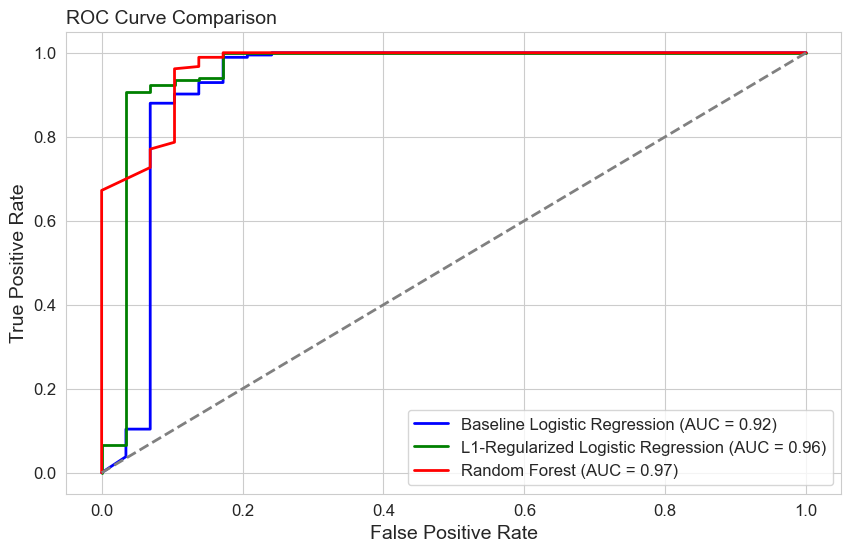

Optimal Cutoff for Baseline Logistic Regression: FPR = 0.0690, TPR = 0.8798
Optimal Cutoff for L1-Regularized Logistic Regression: FPR = 0.0345, TPR = 0.9071
Optimal Cutoff for Random Forest: FPR = 0.1034, TPR = 0.9617


In [85]:
# Plot ROC Curves for all models
fpr_baseline, tpr_baseline, _ = roc_curve(y_test_encoded, y_pred_proba_baseline)
fpr_l1, tpr_l1, _ = roc_curve(y_test_encoded, y_pred_proba_l1)
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, rf_model.predict_proba(X_test_processed)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2, label=f'Baseline Logistic Regression (AUC = {baseline_roc_auc:.2f})')
plt.plot(fpr_l1, tpr_l1, color='green', lw=2, label=f'L1-Regularized Logistic Regression (AUC = {l1_roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.grid(True)
plt.show()

def find_optimal_cutoff(fpr, tpr):
    # Calculate the distance to the top-left corner
    distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
    min_index = np.argmin(distances)  # find index of minimum distance
    return fpr[min_index], tpr[min_index]  # Return FPR and TPR at minimal distance

optimal_fpr_baseline, optimal_tpr_baseline = find_optimal_cutoff(fpr_baseline, tpr_baseline)
optimal_fpr_l1, optimal_tpr_l1 = find_optimal_cutoff(fpr_l1, tpr_l1)
optimal_fpr_rf, optimal_trpr_rf = find_optimal_cutoff(fpr_rf, tpr_rf)

print(f"Optimal Cutoff for Baseline Logistic Regression: FPR = {optimal_fpr_baseline:.4f}, TPR = {optimal_tpr_baseline:.4f}")
print(f"Optimal Cutoff for L1-Regularized Logistic Regression: FPR = {optimal_fpr_l1:.4f}, TPR = {optimal_tpr_l1:.4f}")
print(f"Optimal Cutoff for Random Forest: FPR = {optimal_fpr_rf:.4f}, TPR = {optimal_trpr_rf:.4f}")


False Positive Rates at Maximum True Positive Rate:
Baseline Logistic Regression: 0.2413793103448276
L1-Regularized Logistic Regression: 0.1724137931034483
Random Forest: 0.1724137931034483
